## Getting Started

In [1]:
import sys
sys.path.append('../bin')

from IPython.display import display
import json
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing
from tensorflow import keras

from utils import \
    UNITS, \
    anomaly_score, \
    check_std, \
    predict_intervals

from train import \
    load_datasets, \
    is_categorical, \
    create_dataset, \
    create_gb, \
    create_lr, \
    asym_loss, \
    create_mlp, \
    create_rf, \
    create_pipeline, \
    mean_absolute_percentage_error, \
    prediction_interval_coverage, \
    coverage_error, \
    evaluate_trials, \
    evaluate_cv

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-12-07 14:49:05.200584: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 14:49:05.241593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 14:49:05.242445: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 14:49:05.897535: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Failed to import duecredit due to No module named 'duecredit'


## Load Datasets

In [2]:
pipelines = [
    'gemmaker',
    'gene-oracle',
    'hemelb',
    'kinc',
    'tspg'
]

config_map = {p: json.load(open('../workflows/%s/params.json' % (p))) for p in pipelines}
data_map = {}

for p, c in config_map.items():
    process_names = c['train_inputs'].keys()
    merge_files = [arg.split(' ') for arg in c['train_merge_args']]

    data_map[p] = load_datasets(p, process_names, base_dir='../_datasets', merge_files=merge_files)

warn: no dataset found for process corrpower
warn: no dataset found for process condtest


In [3]:
for pipeline, dfs in data_map.items():
    for process_name, df in dfs.items():
        print('%16s %24s %8d' % (pipeline, process_name, len(df.index)))

        gemmaker            download_runs      774
        gemmaker               fastq_dump      769
        gemmaker              fastq_merge      768
        gemmaker                 fastqc_1      768
        gemmaker                 kallisto      768
        gemmaker             kallisto_tpm      768
     gene-oracle             phase1_split       30
     gene-oracle                phase1_fg      186
     gene-oracle                phase1_bg       31
     gene-oracle             phase1_merge       30
     gene-oracle            phase1_select       30
     gene-oracle                phase2_rf       30
          hemelb                   hemelb      320
            kinc               import_emx        8
            kinc         similarity_chunk      720
            kinc         similarity_merge       96
            kinc           similarity_mpi      436
            kinc            threshold_rmt       96
            kinc                  extract       96
            tspg             tr

In [4]:
for pipeline, dfs in data_map.items():
    for process_name, df in dfs.items():
        print(pipeline, process_name)
        print()
        display(df)
        print()

gemmaker download_runs



cpus      time  disk      memory  \
0       1  86400000   NaN  2147483648   
1       1  86400000   NaN  2147483648   
2       1  86400000   NaN  2147483648   
3       1  86400000   NaN  2147483648   
4       1  86400000   NaN  2147483648   
..    ...       ...   ...         ...   
769     1  86400000   NaN  2147483648   
770     1  86400000   NaN  2147483648   
771     1  86400000   NaN  2147483648   
772     1  86400000   NaN  2147483648   
773     1  86400000   NaN  2147483648   

                                               workdir  n_remote_run_ids  \
0    /scratch1/btsheal/work/00/25c9d236a4417187e946...                 1   
1    /scratch1/btsheal/work/00/5b1a821e42369c931fbb...                 1   
2    /scratch1/btsheal/work/00/9879a397716a7cfa92bc...                 1   
3    /scratch1/btsheal/work/00/a316fa99e136bcf132ae...                 1   
4    /scratch1/btsheal/work/01/3672996019839a56f435...                 1   
..                                                 ...               ...   
769  /scratch1/btsheal/work/fe/678d05425b2724c44bf5...                 1   
770  /scratch1/btsheal/work/fe/74e830d5e141c34fb558...                 1   
771  /scratch1/btsheal/work/fe/f255b31333673298415d...                 1   
772  /scratch1/btsheal/work/ff/5843b4f24d7848141008...                 1   
773  /scratch1/btsheal/work/ff/9c175086537e28aca27b...                 1   

      n_spots   sample_id  runtime_hr  memory_GB   disk_GB  
0     7581709   DRX088957    0.033902   0.051239  0.247263  
1    16302915  ERX2593881    0.056338   0.047989  0.359084  
2     6724793  SRX2191071    0.031161   0.049622  0.212089  
3     4677509  SRX3081243    0.014274   0.047375  0.088863  
4     4532033  SRX3060307    0.040044   0.056496  0.073603  
..        ...         ...         ...        ...       ...  
769  20359806   SRX463625    0.103458   0.056564  0.922778  
770  13313506   SRX391655    0.096676   0.047485  0.739994  
771  56624335  SRX2488350    0.068554   0.044075  1.585469  
772   6799922  SRX3189201    0.025829   0.046803  0.221583  
773  17974142  ERX1946696    0.230186   0.057644  2.119527  

[774 rows x 11 columns]


gemmaker fastq_dump



cpus      time  disk      memory  \
0       1  86400000   NaN  2147483648   
1       1  86400000   NaN  2147483648   
2       1  86400000   NaN  2147483648   
3       1  86400000   NaN  2147483648   
4       1  86400000   NaN  2147483648   
..    ...       ...   ...         ...   
764     1  86400000   NaN  2147483648   
765     1  86400000   NaN  2147483648   
766     1  86400000   NaN  2147483648   
767     1  86400000   NaN  2147483648   
768     1  86400000   NaN  2147483648   

                                               workdir   sample_id  \
0    /scratch1/btsheal/work/00/06efcdbd1bb9b95083cd...  ERX1936695   
1    /scratch1/btsheal/work/00/18a74c931c4448153c0f...  SRX3598177   
2    /scratch1/btsheal/work/00/58fbdcefa7769be60c1f...   SRX315180   
3    /scratch1/btsheal/work/00/77cfde72c0060a09575d...   SRX366974   
4    /scratch1/btsheal/work/00/8e6b6d8934e4a7cb7b90...   SRX465466   
..                                                 ...         ...   
764  /scratch1/btsheal/work/fe/62fc8f4421a003236f11...   SRX525651   
765  /scratch1/btsheal/work/fe/650712fb385ce16354c9...   SRX015136   
766  /scratch1/btsheal/work/ff/27cc089eea68bb55d803...  SRX2191105   
767  /scratch1/btsheal/work/ff/61260e880d0c3a6958f6...  SRX2980258   
768  /scratch1/btsheal/work/ff/6fd3059660c3aa15b29b...   DRX088925   

        sra_bytes  runtime_hr  memory_GB    disk_GB  
0    2.284930e+09    0.087531   0.060726  10.921843  
1    3.598747e+08    0.041874   0.042088   2.384136  
2    6.365280e+08    0.053932   0.073097   3.749883  
3    1.778210e+09    0.128929   0.084377   9.607751  
4    1.706686e+08    0.026126   0.081280   1.502061  
..            ...         ...        ...        ...  
764  1.363339e+09    0.148912   0.062107   9.470412  
765  1.930167e+07    0.003863   0.065907   0.136561  
766  7.119867e+07    0.018563   0.040882   0.670474  
767  1.241332e+08    0.021019   0.060249   0.788175  
768  2.819413e+08    0.026402   0.061443   1.845263  

[769 rows x 10 columns]


gemmaker fastq_merge



cpus      time  disk      memory  \
0       1  86400000   NaN  2147483648   
1       1  86400000   NaN  2147483648   
2       1  86400000   NaN  2147483648   
3       1  86400000   NaN  2147483648   
4       1  86400000   NaN  2147483648   
..    ...       ...   ...         ...   
763     1  86400000   NaN  2147483648   
764     1  86400000   NaN  2147483648   
765     1  86400000   NaN  2147483648   
766     1  86400000   NaN  2147483648   
767     1  86400000   NaN  2147483648   

                                               workdir  fastq_lines  \
0    /scratch1/btsheal/work/00/13b36971cfa8fa7d03de...    226317876   
1    /scratch1/btsheal/work/00/67d539a3d550abe3c6a2...    228572624   
2    /scratch1/btsheal/work/00/aa1e84f4bcd59f1e689d...    145491960   
3    /scratch1/btsheal/work/02/6314f7b148b7ff7ab9b1...      1952532   
4    /scratch1/btsheal/work/03/4592ea4e278b6c17782c...    264231264   
..                                                 ...          ...   
763  /scratch1/btsheal/work/fe/d46905e06e12a72782d0...    167948860   
764  /scratch1/btsheal/work/fe/fea367669b67d0052f34...    105369028   
765  /scratch1/btsheal/work/ff/0fc2f26dc59e98cf6f81...     29620356   
766  /scratch1/btsheal/work/ff/aab4e3d6e45c886875b6...     76433520   
767  /scratch1/btsheal/work/ff/f4dcc63903105f36cc6e...     93682064   

      sample_id  runtime_hr  memory_GB    disk_GB  
0     SRX193185    0.299620   0.008236  16.008994  
1    SRX1418407    0.170166   0.008160  12.263957  
2     DRX064462    0.237285   0.007870  10.289086  
3    SRX1397836    0.002591   0.007980   0.112068  
4     SRX384160    0.445781   0.008183  15.344880  
..          ...         ...        ...        ...  
763  SRX1734930    0.303522   0.008194  13.288712  
764   SRX528601    0.143760   0.008129   6.064889  
765   SRX352290    0.034754   0.008148   1.508173  
766  SRX2248545    0.103509   0.008209   4.994375  
767  SRX2884703    0.239522   0.008144   9.795317  

[768 rows x 10 columns]


gemmaker fastqc_1



cpus      time  disk      memory  \
0       1  86400000   NaN  2147483648   
1       1  86400000   NaN  2147483648   
2       1  86400000   NaN  2147483648   
3       1  86400000   NaN  2147483648   
4       1  86400000   NaN  2147483648   
..    ...       ...   ...         ...   
763     1  86400000   NaN  2147483648   
764     1  86400000   NaN  2147483648   
765     1  86400000   NaN  2147483648   
766     1  86400000   NaN  2147483648   
767     1  86400000   NaN  2147483648   

                                               workdir  fastq_lines  \
0    /scratch1/btsheal/work/00/3316b4771f0fb5ec6486...    694649752   
1    /scratch1/btsheal/work/00/6389ff8694e4b24787ca...    342957696   
2    /scratch1/btsheal/work/00/6b1bd3fcb09bd39b48d7...    190489640   
3    /scratch1/btsheal/work/00/7059e96985218ff26209...      9691380   
4    /scratch1/btsheal/work/01/63640f0bbb5bfcdb8a6b...      6242696   
..                                                 ...          ...   
763  /scratch1/btsheal/work/fe/39f1e1dbe23620e8a068...    153359640   
764  /scratch1/btsheal/work/fe/3e95bb08f2efd3f1e477...      5188740   
765  /scratch1/btsheal/work/ff/23edcaad5efaa3166ad5...     33682712   
766  /scratch1/btsheal/work/ff/d712390b11bdaa289cd0...    160593596   
767  /scratch1/btsheal/work/ff/f2a3f63a36c2113552cd...     14030832   

      sample_id  runtime_hr  memory_GB   disk_GB  
0    SRX1648375    1.482286   0.210278  0.005568  
1    SRX2007110    0.409539   0.245842  0.004931  
2     ERX697801    0.391053   0.225170  0.004718  
3     SRX465500    0.015762   0.183010  0.002190  
4    SRX4171005    0.023127   0.164135  0.002090  
..          ...         ...        ...       ...  
763  SRX1656426    0.154764   0.193005  0.003959  
764  SRX4171011    0.032843   0.178028  0.002090  
765   DRX060032    0.066455   0.203854  0.002133  
766  ERX2050340    0.216590   0.154800  0.002330  
767  SRX4170004    0.040544   0.187466  0.002028  

[768 rows x 10 columns]


gemmaker kallisto



cpus      time  disk       memory  \
0       6  86400000   NaN  45097156608   
1       6  86400000   NaN  45097156608   
2       6  86400000   NaN  45097156608   
3       6  86400000   NaN  45097156608   
4       6  86400000   NaN  45097156608   
..    ...       ...   ...          ...   
763     6  86400000   NaN  45097156608   
764     6  86400000   NaN  45097156608   
765     6  86400000   NaN  45097156608   
766     6  86400000   NaN  45097156608   
767     6  86400000   NaN  45097156608   

                                               workdir  fastq_lines  \
0    /scratch1/btsheal/work/00/4ae5ff9637fa7714601c...     21459248   
1    /scratch1/btsheal/work/00/8ab83ebb3e206ceec0b7...    113761792   
2    /scratch1/btsheal/work/00/d00bb7dcd52bdc57c1d0...      7465048   
3    /scratch1/btsheal/work/01/2ce13564b0ed8cec96d5...    134808952   
4    /scratch1/btsheal/work/01/383b54e8985c060e2d8f...     27773324   
..                                                 ...          ...   
763  /scratch1/btsheal/work/fe/16ce4af75fa2e1244357...      5451316   
764  /scratch1/btsheal/work/fe/864558ea813cb735487f...     66256640   
765  /scratch1/btsheal/work/fe/b4d7f73741d293b03ee5...     12659932   
766  /scratch1/btsheal/work/ff/35dc917977cf7f7624d6...     22189140   
767  /scratch1/btsheal/work/ff/584212f68350d821452f...    121125096   

     index_bytes   sample_id  runtime_hr  memory_GB   disk_GB  
0      973695034  SRX2190871    0.019545   1.671329  0.002012  
1      973695034  SRX1796766    0.064766   1.671379  0.002088  
2      973695034  SRX1397880    0.007903   1.670708  0.001602  
3      973695034  SRX1425896    0.115781   1.662964  0.002235  
4      973695034   DRX089047    0.015621   1.670883  0.001729  
..           ...         ...         ...        ...       ...  
763    973695034  SRX2190888    0.005407   1.672909  0.001884  
764    973695034  ERX1659435    0.036406   1.666668  0.002084  
765    973695034   SRX083200    0.009630   1.662075  0.001897  
766    973695034  SRX3464884    0.004984   1.673435  0.001886  
767    973695034   DRX084084    0.051728   1.664703  0.002108  

[768 rows x 11 columns]


gemmaker kallisto_tpm



cpus      time  disk      memory  \
0       1  86400000   NaN  2147483648   
1       1  86400000   NaN  2147483648   
2       1  86400000   NaN  2147483648   
3       1  86400000   NaN  2147483648   
4       1  86400000   NaN  2147483648   
..    ...       ...   ...         ...   
763     1  86400000   NaN  2147483648   
764     1  86400000   NaN  2147483648   
765     1  86400000   NaN  2147483648   
766     1  86400000   NaN  2147483648   
767     1  86400000   NaN  2147483648   

                                               workdir   sample_id  \
0    /scratch1/btsheal/work/00/96b47e6193610e06bd8f...  SRX3217056   
1    /scratch1/btsheal/work/00/e8c023783498e9fd6a99...  ERX2055378   
2    /scratch1/btsheal/work/00/f987ade813e71b529be0...  SRX2248443   
3    /scratch1/btsheal/work/01/8b345b0ea32b31c84653...  SRX1720947   
4    /scratch1/btsheal/work/01/cdd0fd2526a4e285eefd...  SRX2248302   
..                                                 ...         ...   
763  /scratch1/btsheal/work/fd/ef5c22e95bb94d88d2af...  SRX2362388   
764  /scratch1/btsheal/work/fe/56db52a35041993e455f...  SRX1734897   
765  /scratch1/btsheal/work/fe/7af72c2e7e3b1f102003...  SRX2977312   
766  /scratch1/btsheal/work/ff/4385ac07b65e9580e7c1...  SRX3081243   
767  /scratch1/btsheal/work/ff/5253a57a0935f28e543f...  SRX3460582   

     runtime_hr  memory_GB   disk_GB  
0      0.000064        0.0  0.001517  
1      0.000083        0.0  0.001618  
2      0.000051        0.0  0.001595  
3      0.000124        0.0  0.001612  
4      0.000039        0.0  0.001601  
..          ...        ...       ...  
763    0.000064        0.0  0.001591  
764    0.000056        0.0  0.001614  
765    0.000355        0.0  0.001466  
766    0.000058        0.0  0.001350  
767    0.000114        0.0  0.001618  

[768 rows x 9 columns]


gene-oracle phase1_split



hash  cpus      time  disk  memory  \
0   ce/dd1072     1  86400000   NaN     NaN   
1   86/bd8151     1  86400000   NaN     NaN   
2   e3/8d6be3     1  86400000   NaN     NaN   
3   ef/cb4e39     1  86400000   NaN     NaN   
4   eb/fdc54f     1  86400000   NaN     NaN   
5   a4/95191d     1  86400000   NaN     NaN   
6   7f/04266f     1  86400000   NaN     NaN   
7   85/5bacb2     1  86400000   NaN     NaN   
8   e1/33ad9d     1  86400000   NaN     NaN   
9   a1/7971e7     1  86400000   NaN     NaN   
10  60/93a383     1  86400000   NaN     NaN   
11  b4/927264     1  86400000   NaN     NaN   
12  ae/73667f     1  86400000   NaN     NaN   
13  51/edca1c     1  86400000   NaN     NaN   
14  e8/291b10     1  86400000   NaN     NaN   
15  0d/626fd9     1  86400000   NaN     NaN   
16  8a/e82644     1  86400000   NaN     NaN   
17  75/8fbd6e     1  86400000   NaN     NaN   
18  c3/d61704     1  86400000   NaN     NaN   
19  06/607e6e     1  86400000   NaN     NaN   
20  58/bf8574     1  86400000   NaN     NaN   
21  5e/f7fdde     1  86400000   NaN     NaN   
22  3a/498881     1  86400000   NaN     NaN   
23  78/cfc68c     1  86400000   NaN     NaN   
24  90/096b40     1  86400000   NaN     NaN   
25  55/2946ed     1  86400000   NaN     NaN   
26  1b/4b4c0e     1  86400000   NaN     NaN   
27  cd/3c65b3     1  86400000   NaN     NaN   
28  2d/168903     1  86400000   NaN     NaN   
29  ce/a962d3     1  86400000   NaN     NaN   

                                              workdir  chunks  gmt_lines  \
0   /scratch1/btsheal/work/ce/dd1072dd906ad0b6a2ed...      16        256   
1   /scratch1/btsheal/work/86/bd8151d204eba49ee5fc...      16         32   
2   /scratch1/btsheal/work/e3/8d6be3d581a2bfa0d1d8...      16       1024   
3   /scratch1/btsheal/work/ef/cb4e39abe29ae60a4989...      16         64   
4   /scratch1/btsheal/work/eb/fdc54f71b1acae800daa...      16        128   
5   /scratch1/btsheal/work/a4/95191db3eff034b7366a...      16        512   
6   /scratch1/btsheal/work/7f/04266f281897e10f73a2...       8       1024   
7   /scratch1/btsheal/work/85/5bacb2d2ae7a278724bd...       8         32   
8   /scratch1/btsheal/work/e1/33ad9d4ccb2ab4087a9a...       8        256   
9   /scratch1/btsheal/work/a1/7971e76387d739bccf98...       8         64   
10  /scratch1/btsheal/work/60/93a383444a1449c7eebc...       8        128   
11  /scratch1/btsheal/work/b4/927264aa72d7ad411475...       8        512   
12  /scratch1/btsheal/work/ae/73667f8f557c6d6eb5aa...       4       1024   
13  /scratch1/btsheal/work/51/edca1ce7394d1973e361...       4        512   
14  /scratch1/btsheal/work/e8/291b1092375210c34a20...       4        256   
15  /scratch1/btsheal/work/0d/626fd95d10e6069a162c...       4         32   
16  /scratch1/btsheal/work/8a/e82644c9fad5ef4730e2...       4         64   
17  /scratch1/btsheal/work/75/8fbd6ea4b2b6ae50f289...       4        128   
18  /scratch1/btsheal/work/c3/d6170433dc14b848312f...       1        256   
19  /scratch1/btsheal/work/06/607e6e670415a093cddb...       1       1024   
20  /scratch1/btsheal/work/58/bf8574aa11fee7150560...       1         32   
21  /scratch1/btsheal/work/5e/f7fdde32a87443222565...       1        512   
22  /scratch1/btsheal/work/3a/49888183e985521abf07...       1         64   
23  /scratch1/btsheal/work/78/cfc68ceb4285d4ca8cac...       1        128   
24  /scratch1/btsheal/work/90/096b405713db8b19e5af...       2       1024   
25  /scratch1/btsheal/work/55/2946eda5bbcc463fbdef...       2         32   
26  /scratch1/btsheal/work/1b/4b4c0eb61194822df45b...       2        256   
27  /scratch1/btsheal/work/cd/3c65b363cf7e49a9d1fa...       2        512   
28  /scratch1/btsheal/work/2d/1689037d5569dc6ed97a...       2         64   
29  /scratch1/btsheal/work/ce/a962d35155b38769d3f5...       2        128   

    runtime_hr  memory_GB   disk_GB  
0     0.000035   0.003036  0.000023  
1     0.000026   0.003799  0.000003  
2     0.000024   0.003792  0.000095  
3     0.000038   0.003059  0.000006  
4   


gene-oracle phase1_fg



hash  cpus      time  disk  memory  \
0    eb/e561f9     1  86400000   NaN     NaN   
1    35/bcc1ac     1  86400000   NaN     NaN   
2    01/9b3ed5     1  86400000   NaN     NaN   
3    4f/e6db30     1  86400000   NaN     NaN   
4    63/8a67b6     1  86400000   NaN     NaN   
..         ...   ...       ...   ...     ...   
181  de/414be4     1  86400000   NaN     NaN   
182  bb/dd2169     1  86400000   NaN     NaN   
183  82/28695c     1  86400000   NaN     NaN   
184  69/d1ef3d     1  86400000   NaN     NaN   
185  eb/6a4dbb     1  86400000   NaN     NaN   

                                               workdir  chunks  gmt_lines  \
0    /scratch1/btsheal/work/eb/e561f96527bb66b88506...      16         16   
1    /scratch1/btsheal/work/35/bcc1ac1bd8a907c295ec...      16         17   
2    /scratch1/btsheal/work/01/9b3ed5e70e0bb01730a0...      16         15   
3    /scratch1/btsheal/work/4f/e6db30e056effe978446...      16         16   
4    /scratch1/btsheal/work/63/8a67b627b187008549cf...      16         18   
..                                                 ...     ...        ...   
181  /scratch1/btsheal/work/de/414be474fc44620a0d6b...       2         63   
182  /scratch1/btsheal/work/bb/dd21699a15b4ec046002...       2        260   
183  /scratch1/btsheal/work/82/28695ce65ef74a321007...       2        252   
184  /scratch1/btsheal/work/69/d1ef3d39eaa989ba0db7...       2        504   
185  /scratch1/btsheal/work/eb/6a4dbb67c18fbec2596d...       2        520   

     gmt_genes  n_rows  n_cols model  runtime_hr  memory_GB   disk_GB  
0          202     929   19216    lr    0.040732   0.793549  0.000007  
1          228     929   19216    lr    0.042495   0.793888  0.000007  
2          211     929   19216    lr    0.040838   0.793472  0.000007  
3          218     929   19216    lr    0.039665   0.793633  0.000007  
4          213     929   19216    lr    0.039355   0.793499  0.000007  
..         ...     ...     ...   ...         ...        ...       ...  
181        903     929   19216    lr    0.139922   0.793365  0.000016  
182       3535     929   19216    lr    0.525688   0.794205  0.000052  
183       3561     929   19216    lr    0.505197   0.793770  0.000051  
184       6998     929   19216    lr    1.038163   0.793800  0.000098  
185       6975     929   19216    lr    1.048920   0.794521  0.000101  

[186 rows x 15 columns]


gene-oracle phase1_bg



hash  cpus      time  disk  memory  \
0   23/9124ce     1  86400000   NaN     NaN   
1   97/29e913     1  86400000   NaN     NaN   
2   73/11a1e9     1  86400000   NaN     NaN   
3   70/d47c45     1  86400000   NaN     NaN   
4   f6/db7351     1  86400000   NaN     NaN   
5   9c/9ea9e7     1  86400000   NaN     NaN   
6   7b/50bb79     1  86400000   NaN     NaN   
7   92/f9b02e     1  86400000   NaN     NaN   
8   cf/109e50     1  86400000   NaN     NaN   
9   76/6f02e2     1  86400000   NaN     NaN   
10  45/6da0ef     1  86400000   NaN     NaN   
11  cc/dc5b50     1  86400000   NaN     NaN   
12  b4/b81b56     1  86400000   NaN     NaN   
13  64/40a692     1  86400000   NaN     NaN   
14  84/3e901c     1  86400000   NaN     NaN   
15  4a/287ec8     1  86400000   NaN     NaN   
16  53/5f7a48     1  86400000   NaN     NaN   
17  8c/514eaf     1  86400000   NaN     NaN   
18  a9/446352     1  86400000   NaN     NaN   
19  eb/028832     1  86400000   NaN     NaN   
20  08/f2a912     1  86400000   NaN     NaN   
21  30/3ded01     1  86400000   NaN     NaN   
22  63/d2f9fd     1  86400000   NaN     NaN   
23  78/13b9d8     1  86400000   NaN     NaN   
24  0d/194f1f     1  86400000   NaN     NaN   
25  b5/b124c0     1  86400000   NaN     NaN   
26  4a/2d37ce     1  86400000   NaN     NaN   
27  6e/822910     1  86400000   NaN     NaN   
28  12/bd0d92     1  86400000   NaN     NaN   
29  fd/453de1     1  86400000   NaN     NaN   
30  fb/09e663     1  86400000   NaN     NaN   

                                              workdir  random_min  random_max  \
0   /scratch1/btsheal/work/23/9124ce702230cc90ce1f...           1          20   
1   /scratch1/btsheal/work/97/29e9137c4ae302a1402f...           1          20   
2   /scratch1/btsheal/work/73/11a1e9ca49fed630da06...           1          20   
3   /scratch1/btsheal/work/70/d47c4506bc48f188499d...           1          20   
4   /scratch1/btsheal/work/f6/db7351810c1d1c4d23e6...           1          20   
5   /scratch1/btsheal/work/9c/9ea9e794f5c90977c0b5...           1          20   
6   /scratch1/btsheal/work/7b/50bb79362f1a1ae24608...           1          20   
7   /scratch1/btsheal/work/92/f9b02e34b98f27d87940...           1          20   
8   /scratch1/btsheal/work/cf/109e50478e038af26371...           1          20   
9   /scratch1/btsheal/work/76/6f02e22c46e2ab8baa59...           1          20   
10  /scratch1/btsheal/work/45/6da0effed16b9dc69cda...           1          20   
11  /scratch1/btsheal/work/cc/dc5b50e946c1f6625b9e...           1          20   
12  /scratch1/btsheal/work/b4/b81b566679b6be97f9e2...           1          20   
13  /scratch1/btsheal/work/64/40a692d9479fac24e89d...           1          20   
14  /scratch1/btsheal/work/84/3e901ca2012a382da9aa...           1          20   
15  /scratch1/btsheal/work/4a/287ec8216af1fa1304f8...           1          20   
16  /scratch1/btsheal/work/53/5f7a48fa9f7ec9e6308b...           1          20   
17  /scratch1/btsheal/work/8c/514eafdefc3c57676c80...           1          20   
18  /scratch1/btsheal/work/a9/446352409a24c81456fa...           1          20   
19  /scratch1/btsheal/work/eb/02883220202cdbb91974...           1          20   
20  /scratch1/btsheal/work/08/f2a912fcad571d09cae2...           1          20   
21  /scratch1/btsheal/work/30/3ded01fae47cc722c3e3...           1          20   
22  /scratch1/btsheal/work/63/d2f9fd9b28f2cc3220ad...           1          20   
23  /scratch1/btsheal/work/78/13b9d8189d28f41ecbc3...           1          20   
24  /scratch1/btsheal/work/0d/194f1fae79c45543b1e8...           1          20   
25  /scratch1/btsheal/work/b5/b124c0de1f49bcae6c2f...           1          20   
26  /scratch1/btsheal/work/4a/2d37ce9faa02cb3711fc...           1          20   
27  /scratch1/btsheal/work/6e/82291068e01e4429b692...           1          20   
28  /scratch1/btsheal/work/12/bd0d92348219f8d5df68...           1          20   
29  /scratch1/btsheal/work/fd/453de17fba65362aed8b...           1         


gene-oracle phase1_merge



hash  cpus      time  disk  memory  \
0   c1/941daa     1  86400000   NaN     NaN   
1   a0/d2fbdd     1  86400000   NaN     NaN   
2   a1/c44c37     1  86400000   NaN     NaN   
3   72/c3773d     1  86400000   NaN     NaN   
4   21/386547     1  86400000   NaN     NaN   
5   fa/c4f98e     1  86400000   NaN     NaN   
6   f0/6e1756     1  86400000   NaN     NaN   
7   ca/fd8b56     1  86400000   NaN     NaN   
8   7d/497921     1  86400000   NaN     NaN   
9   50/533bea     1  86400000   NaN     NaN   
10  c3/c2eb69     1  86400000   NaN     NaN   
11  e0/10e474     1  86400000   NaN     NaN   
12  1d/1687f4     1  86400000   NaN     NaN   
13  9c/8e0620     1  86400000   NaN     NaN   
14  86/1504ee     1  86400000   NaN     NaN   
15  2b/495d33     1  86400000   NaN     NaN   
16  e2/4bfb4b     1  86400000   NaN     NaN   
17  6d/92b08a     1  86400000   NaN     NaN   
18  e3/6202d8     1  86400000   NaN     NaN   
19  e8/0d3a00     1  86400000   NaN     NaN   
20  e2/cde9c0     1  86400000   NaN     NaN   
21  fc/929ad3     1  86400000   NaN     NaN   
22  52/28b227     1  86400000   NaN     NaN   
23  52/f1af30     1  86400000   NaN     NaN   
24  1a/85624f     1  86400000   NaN     NaN   
25  ce/fdafe1     1  86400000   NaN     NaN   
26  b5/8c8700     1  86400000   NaN     NaN   
27  68/e67ef1     1  86400000   NaN     NaN   
28  79/bbcc11     1  86400000   NaN     NaN   
29  59/9a0b25     1  86400000   NaN     NaN   

                                              workdir  chunks  gmt_lines  \
0   /scratch1/btsheal/work/c1/941daadbaf65f1f324c7...      16        552   
1   /scratch1/btsheal/work/a0/d2fbdd0befb813b51e1f...      16       2792   
2   /scratch1/btsheal/work/a1/c44c3764966ba5e4a002...      16      10472   
3   /scratch1/btsheal/work/72/c3773d021cca505a39cb...      16       1512   
4   /scratch1/btsheal/work/21/3865474b83d9b6a16c28...      16       5352   
5   /scratch1/btsheal/work/fa/c4f98eb1c8ce5bfa155f...      16        872   
6   /scratch1/btsheal/work/f0/6e1756948d261cb987ce...       8      10456   
7   /scratch1/btsheal/work/ca/fd8b563bc83e9bf33e62...       8        536   
8   /scratch1/btsheal/work/7d/497921fb264b26eeaead...       8       2776   
9   /scratch1/btsheal/work/50/533bea339df0691504ec...       8       5336   
10  /scratch1/btsheal/work/c3/c2eb6998aafda3e19827...       8       1496   
11  /scratch1/btsheal/work/e0/10e474e00b19232d8a60...       8        856   
12  /scratch1/btsheal/work/1d/1687f4b1dd8c22c3020f...       4       5328   
13  /scratch1/btsheal/work/9c/8e062043abe530df72ec...       4       1488   
14  /scratch1/btsheal/work/86/1504eefa159c255f8e07...       4       2768   
15  /scratch1/btsheal/work/2b/495d330fcc3a400eda2f...       4        848   
16  /scratch1/btsheal/work/e2/4bfb4b2f2c35a7a6b59a...       4        528   
17  /scratch1/btsheal/work/6d/92b08a1b2aaa14e7bc7f...       4      10448   
18  /scratch1/btsheal/work/e3/6202d8e5667eee5763c4...       1        522   
19  /scratch1/btsheal/work/e8/0d3a00922cf598d7fff2...       1        842   
20  /scratch1/btsheal/work/e2/cde9c01277df2a7c8709...       1       1482   
21  /scratch1/btsheal/work/fc/929ad3500bee6f01a4e7...       1       2762   
22  /scratch1/btsheal/work/52/28b2276c58b0ffbd3c40...       1       5322   
23  /scratch1/btsheal/work/52/f1af304464d07a6cfad2...       1      10442   
24  /scratch1/btsheal/work/1a/85624f05e3e6d5518587...       2        844   
25  /scratch1/btsheal/work/ce/fdafe101f7ec02a83a7e...       2       2764   
26  /scratch1/btsheal/work/b5/8c87008af1ebb7ec1e9a...       2        524   
27  /scratch1/btsheal/work/68/e67ef1acd242befd4a94...       2       1484   
28  /scratch1/btsheal/work/79/bbcc110283186a2171ae...       2       5324   
29  /scratch1/btsheal/work/59/9a0b25d3a96af51d8378...       2      10444   

    runtime_hr  memory_GB   disk_GB  
0     0.000150   0.007130  0.000015  
1     0.000147   0.007286  0.000099  
2     0.000141   0.007359  0.000385  
3     0.000148   0.007172  0.000051  
4   


gene-oracle phase1_select



hash  cpus      time  disk  memory  \
0   be/16463e     1  86400000   NaN     NaN   
1   03/b0638d     1  86400000   NaN     NaN   
2   b4/fe6c53     1  86400000   NaN     NaN   
3   56/162b0e     1  86400000   NaN     NaN   
4   34/3398db     1  86400000   NaN     NaN   
5   ed/ba8d2c     1  86400000   NaN     NaN   
6   d3/8f2d96     1  86400000   NaN     NaN   
7   c1/c6461f     1  86400000   NaN     NaN   
8   18/d08eb0     1  86400000   NaN     NaN   
9   98/8d21a8     1  86400000   NaN     NaN   
10  d3/fe816b     1  86400000   NaN     NaN   
11  f7/d71c87     1  86400000   NaN     NaN   
12  06/447d20     1  86400000   NaN     NaN   
13  9d/4a3b55     1  86400000   NaN     NaN   
14  a7/5e9026     1  86400000   NaN     NaN   
15  87/f0264e     1  86400000   NaN     NaN   
16  4f/76ffa9     1  86400000   NaN     NaN   
17  72/718710     1  86400000   NaN     NaN   
18  e7/1d82f0     1  86400000   NaN     NaN   
19  82/b426c2     1  86400000   NaN     NaN   
20  87/46bb70     1  86400000   NaN     NaN   
21  24/e9d1c6     1  86400000   NaN     NaN   
22  e7/24ff60     1  86400000   NaN     NaN   
23  45/a5a4a8     1  86400000   NaN     NaN   
24  71/cb8ac1     1  86400000   NaN     NaN   
25  f6/7a433a     1  86400000   NaN     NaN   
26  e6/73fa52     1  86400000   NaN     NaN   
27  87/5a83e6     1  86400000   NaN     NaN   
28  d3/577369     1  86400000   NaN     NaN   
29  03/2e157c     1  86400000   NaN     NaN   

                                              workdir  chunks  gmt_lines  \
0   /scratch1/btsheal/work/be/16463eac2b0adfe0aa39...      16       1024   
1   /scratch1/btsheal/work/03/b0638d8780d195b1bba2...      16        256   
2   /scratch1/btsheal/work/b4/fe6c5368323ef2694dfc...      16         32   
3   /scratch1/btsheal/work/56/162b0efba9c79b4ec309...      16        512   
4   /scratch1/btsheal/work/34/3398db529e0d45ee2fcb...      16         64   
5   /scratch1/btsheal/work/ed/ba8d2c3bfb3152041cc7...      16        128   
6   /scratch1/btsheal/work/d3/8f2d96f63688744f17d6...       8       1024   
7   /scratch1/btsheal/work/c1/c6461f602e0787d3f996...       8        256   
8   /scratch1/btsheal/work/18/d08eb0066001b7347f39...       8         32   
9   /scratch1/btsheal/work/98/8d21a801ae1c1554c138...       8        512   
10  /scratch1/btsheal/work/d3/fe816ba07144b9369f73...       8         64   
11  /scratch1/btsheal/work/f7/d71c8703d5fb5953b310...       8        128   
12  /scratch1/btsheal/work/06/447d20b70a41d3851bde...       4       1024   
13  /scratch1/btsheal/work/9d/4a3b5567e55f5f63e6bd...       4        256   
14  /scratch1/btsheal/work/a7/5e9026b7e92c27bd4d49...       4         32   
15  /scratch1/btsheal/work/87/f0264ed67340b9b82c8f...       4        512   
16  /scratch1/btsheal/work/4f/76ffa95d4024c189190e...       4         64   
17  /scratch1/btsheal/work/72/718710b302b7a5d5ffef...       4        128   
18  /scratch1/btsheal/work/e7/1d82f02c743feb84b211...       1       1024   
19  /scratch1/btsheal/work/82/b426c266114d7c1cef7f...       1        256   
20  /scratch1/btsheal/work/87/46bb703e37f7a32bbe06...       1         32   
21  /scratch1/btsheal/work/24/e9d1c6b4dbe53ca71342...       1        512   
22  /scratch1/btsheal/work/e7/24ff60f9c9279bc8356c...       1         64   
23  /scratch1/btsheal/work/45/a5a4a8b0b08507983cc8...       1        128   
24  /scratch1/btsheal/work/71/cb8ac1554240aa001c59...       2       1024   
25  /scratch1/btsheal/work/f6/7a433ac153c0d04022e2...       2        256   
26  /scratch1/btsheal/work/e6/73fa52d974a1baa3fde4...       2         32   
27  /scratch1/btsheal/work/87/5a83e6e63e0828d4d2ce...       2        512   
28  /scratch1/btsheal/work/d3/57736948221774413966...       2         64   
29  /scratch1/btsheal/work/03/2e157cc5fc4a36e824f7...       2        128   

    gmt_genes  runtime_hr  memory_GB   disk_GB  
0       13973    0.006973   0.544949  0.000050  
1        3410    0.006665   0.551807  0.000040  
2         422    0.006569   0.552921  0.000008 


gene-oracle phase2_rf



hash  cpus      time  disk  memory  \
0   b0/0e4469     1  86400000   NaN     NaN   
1   ca/2e7eab     1  86400000   NaN     NaN   
2   44/117e24     1  86400000   NaN     NaN   
3   cb/f64906     1  86400000   NaN     NaN   
4   b0/8befb1     1  86400000   NaN     NaN   
5   e4/796bca     1  86400000   NaN     NaN   
6   c4/bce5e4     1  86400000   NaN     NaN   
7   4b/2f689f     1  86400000   NaN     NaN   
8   3c/9f54a8     1  86400000   NaN     NaN   
9   b1/9fab72     1  86400000   NaN     NaN   
10  2e/44f29a     1  86400000   NaN     NaN   
11  3f/2c2f7f     1  86400000   NaN     NaN   
12  4b/a2baaa     1  86400000   NaN     NaN   
13  c1/aef521     1  86400000   NaN     NaN   
14  8b/202bda     1  86400000   NaN     NaN   
15  30/c372d8     1  86400000   NaN     NaN   
16  ab/b725b0     1  86400000   NaN     NaN   
17  17/c45710     1  86400000   NaN     NaN   
18  65/4e2076     1  86400000   NaN     NaN   
19  e9/6247c2     1  86400000   NaN     NaN   
20  7a/8768a0     1  86400000   NaN     NaN   
21  5f/60245e     1  86400000   NaN     NaN   
22  5a/543289     1  86400000   NaN     NaN   
23  6f/cf6fa1     1  86400000   NaN     NaN   
24  d6/534061     1  86400000   NaN     NaN   
25  4e/44d180     1  86400000   NaN     NaN   
26  ed/1cfaf7     1  86400000   NaN     NaN   
27  a7/4916a1     1  86400000   NaN     NaN   
28  13/7ea61b     1  86400000   NaN     NaN   
29  2d/5bbd11     1  86400000   NaN     NaN   

                                              workdir  chunks  gmt_lines  \
0   /scratch1/btsheal/work/b0/0e4469e3471421232f68...      16         32   
1   /scratch1/btsheal/work/ca/2e7eab2e784433ca8682...      16         32   
2   /scratch1/btsheal/work/44/117e24f538ce10bb77c5...      16         64   
3   /scratch1/btsheal/work/cb/f64906d033d23df39822...      16         64   
4   /scratch1/btsheal/work/b0/8befb1546bb856b99e5f...      16        128   
5   /scratch1/btsheal/work/e4/796bca3745e5e0885f20...      16        256   
6   /scratch1/btsheal/work/c4/bce5e4b34beb859133cd...       8         32   
7   /scratch1/btsheal/work/4b/2f689f41019f5edb65d4...       8         32   
8   /scratch1/btsheal/work/3c/9f54a82652ffcbeba0bb...       8         64   
9   /scratch1/btsheal/work/b1/9fab72de540df26c2e52...       8         64   
10  /scratch1/btsheal/work/2e/44f29abdf942a7d1c08c...       8        512   
11  /scratch1/btsheal/work/3f/2c2f7f7de4d00fc939c0...       8       1024   
12  /scratch1/btsheal/work/4b/a2baaa307a3707161715...       4         32   
13  /scratch1/btsheal/work/c1/aef521971ba6608bfa76...       4         64   
14  /scratch1/btsheal/work/8b/202bda49200a67b047d3...       4         32   
15  /scratch1/btsheal/work/30/c372d8e45a7d04dd5676...       4        128   
16  /scratch1/btsheal/work/ab/b725b0861f4c7b553eaa...       4        128   
17  /scratch1/btsheal/work/17/c45710179785499cfdd3...       4        512   
18  /scratch1/btsheal/work/65/4e20761c789ad1e6edb5...       1         32   
19  /scratch1/btsheal/work/e9/6247c22640016bf33f1b...       1         32   
20  /scratch1/btsheal/work/7a/8768a0d0673bc36361d8...       1         64   
21  /scratch1/btsheal/work/5f/60245ee32ac57f92e0a5...       1         64   
22  /scratch1/btsheal/work/5a/543289edd0c50c1cebbb...       1        128   
23  /scratch1/btsheal/work/6f/cf6fa1ea74ee42822f05...       1        256   
24  /scratch1/btsheal/work/d6/534061bbb1679cc01b6a...       2         64   
25  /scratch1/btsheal/work/4e/44d180df7a54d5559c0b...       2         32   
26  /scratch1/btsheal/work/ed/1cfaf7bc4be2010aab12...       2         64   
27  /scratch1/btsheal/work/a7/4916a1abb40e24bf9974...       2        128   
28  /scratch1/btsheal/work/13/7ea61b88cad48b68059f...       2        128   
29  /scratch1/btsheal/work/2d/5bbd11e0be3ee9506abd...       2        256   

    gmt_genes  n_rows  n_cols  runtime_hr  memory_GB   disk_GB  
0         409     929   19216    0.011262   0.795059  0.000667  
1         422     929   19216    0.011339   0.796867  0.000655  


hemelb hemelb



hash  cpus       time  disk  memory  \
0    25/9ab26c     1   86400000   NaN     NaN   
1    e0/3960d4     1   86400000   NaN     NaN   
2    4d/1e9061     1   86400000   NaN     NaN   
3    94/0aa8db     1   86400000   NaN     NaN   
4    df/6a6b75     1   86400000   NaN     NaN   
..         ...   ...        ...   ...     ...   
319  af/cf4291     1  172800000   NaN     NaN   
320  ab/e0372c     1  172800000   NaN     NaN   
321  92/9cd6a4     1  172800000   NaN     NaN   
322  d5/fdece3     1  172800000   NaN     NaN   
323  c1/827e7c     1  172800000   NaN     NaN   

                                               workdir  blocksize geometry  \
0    /scratch1/btsheal/work/25/9ab26c79a522cd2b6145...        512    C0003   
1    /scratch1/btsheal/work/e0/3960d4d150df76e659dd...        512    C0003   
2    /scratch1/btsheal/work/4d/1e9061895d14f689f76f...        512    C0003   
3    /scratch1/btsheal/work/94/0aa8dbddffe55a23bcc2...        512    C0003   
4    /scratch1/btsheal/work/df/6a6b75705f591346904c...        512    C0003   
..                                                 ...        ...      ...   
319  /scratch1/btsheal/work/af/cf4291f31686e60ea3ef...        512    C0010   
320  /scratch1/btsheal/work/ab/e0372c354b99ba0603ab...        512    C0010   
321  /scratch1/btsheal/work/92/9cd6a4f8ead5a2f8d6be...        512    C0009   
322  /scratch1/btsheal/work/d5/fdece34ca561a686c1fa...        512    C0009   
323  /scratch1/btsheal/work/c1/827e7cb674b4eeae6e2a...        512    C0009   

    hardware_type latticetype  ngpus  np   n_sites  runtime_hr  memory_GB  \
0             cpu       D3Q19      0   2  12265497   12.224573  14.578823   
1             cpu       D3Q19      0   4  12265497    6.378330  16.056625   
2             cpu       D3Q19      0   1  12265497   23.654009  13.804977   
3             cpu       D3Q19      0   8  12265497    3.347686   8.942104   
4             cpu       D3Q19      0  16  12265497    1.663813   2.385715   
..            ...         ...    ...  ..       ...         ...        ...   
319           cpu       D3Q19      0   1  16273831   33.474931  18.318638   
320           cpu       D3Q19      0   1  16273831   34.185529  18.318455   
321           cpu       D3Q19      0   1  19010469   36.272454  21.436779   
322           cpu       D3Q19      0   1  19010469   36.441110  21.437958   
323           cpu       D3Q19      0   1  19010469   36.953893  21.436855   

      disk_GB  
0    0.011978  
1    0.012030  
2    0.012104  
3    0.012090  
4    0.012101  
..        ...  
319  0.010812  
320  0.010812  
321  0.011360  
322  0.011360  
323  0.011360  

[320 rows x 16 columns]


kinc import_emx



hash  cpus      time  disk  memory  \
0  c0/ab07db     1  43200000   NaN     NaN   
1  d9/0a04a0     1  43200000   NaN     NaN   
2  30/0233d0     1  43200000   NaN     NaN   
3  49/336e3d     1  43200000   NaN     NaN   
4  f5/9fd5a4     1  43200000   NaN     NaN   
5  05/51e22c     1  43200000   NaN     NaN   
6  7c/c34653     1  43200000   NaN     NaN   
7  ea/06aba4     1  43200000   NaN     NaN   

                                             workdir        dataset  n_rows  \
0  /scratch1/btsheal/work/c0/ab07dbb823d60118753f...  Yeast.002.001    1763   
1  /scratch1/btsheal/work/d9/0a04a0f69212ebfbfca6...  Yeast.004.001    3526   
2  /scratch1/btsheal/work/30/0233d0c80ccea355972b...  Yeast.006.001    5288   
3  /scratch1/btsheal/work/49/336e3d5a26767d6a950a...  Yeast.001.001     882   
4  /scratch1/btsheal/work/f5/9fd5a45471f004d0ad73...  Yeast.005.001    4407   
5  /scratch1/btsheal/work/05/51e22c479f5ee991d9c8...  Yeast.003.001    2644   
6  /scratch1/btsheal/work/7c/c34653b7542c1678973c...  Yeast.008.001    7051   
7  /scratch1/btsheal/work/ea/06aba44ab1dbdcd40823...  Yeast.007.001    6169   

   n_cols  runtime_hr  memory_GB   disk_GB  
0     188    0.000349   0.115780  0.001279  
1     188    0.000269   0.004753  0.002555  
2     188    0.000341   0.004536  0.003830  
3     188    0.000162   0.004593  0.000641  
4     188    0.000309   0.003044  0.003193  
5     188    0.000232   0.004662  0.001917  
6     188    0.000414   0.143932  0.005106  
7     188    0.000374   0.141891  0.004468


kinc similarity_chunk



hash  cpus      time  disk  memory  \
0    fb/8c0f21     1  86400000   NaN     NaN   
1    7f/c1c02e     1  86400000   NaN     NaN   
2    42/fdc3ec     1  86400000   NaN     NaN   
3    d7/6c3a04     1  86400000   NaN     NaN   
4    e1/0a039b     1  86400000   NaN     NaN   
..         ...   ...       ...   ...     ...   
715  66/72dd75     1  86400000   NaN     NaN   
716  b5/772f0a     1  86400000   NaN     NaN   
717  fc/714083     1  86400000   NaN     NaN   
718  43/0569ce     1  86400000   NaN     NaN   
719  ca/3363c0     1  86400000   NaN     NaN   

                                               workdir        dataset  \
0    /scratch1/btsheal/work/fb/8c0f213add07621c9b12...  Yeast.002.001   
1    /scratch1/btsheal/work/7f/c1c02e620d6d495e0a34...  Yeast.002.001   
2    /scratch1/btsheal/work/42/fdc3ec702ccbdc680e95...  Yeast.002.001   
3    /scratch1/btsheal/work/d7/6c3a04dddaddace3d516...  Yeast.002.001   
4    /scratch1/btsheal/work/e1/0a039b04a2b14f137a7f...  Yeast.001.001   
..                                                 ...            ...   
715  /scratch1/btsheal/work/66/72dd759ff424b7f953ce...  Yeast.007.001   
716  /scratch1/btsheal/work/b5/772f0a09759a0db55934...  Yeast.007.001   
717  /scratch1/btsheal/work/fc/714083cca87dfebae686...  Yeast.007.001   
718  /scratch1/btsheal/work/43/0569ced2bb945ab8343b...  Yeast.007.001   
719  /scratch1/btsheal/work/ca/3363c0e35fb0ea859753...  Yeast.007.001   

    hardware_type  chunks  threads  runtime_hr  memory_GB   disk_GB  n_rows  \
0             cpu       4        2    0.004519   0.138203  0.003966    1763   
1             cpu       4        2    0.004646   0.137943  0.005117    1763   
2             cpu       4        2    0.004590   0.140240  0.004763    1763   
3             cpu       4        2    0.004521   0.138844  0.004121    1763   
4             cpu       4        2    0.001315   0.137848  0.001214     882   
..            ...     ...      ...         ...        ...       ...     ...   
715          v100       8        2    0.001734   0.398899  0.029899    6169   
716          v100       8        2    0.001774   0.398037  0.027084    6169   
717          v100       8        2    0.001732   0.399040  0.029599    6169   
718          v100       8        2    0.001844   0.398079  0.026767    6169   
719          v100       8        2    0.001755   0.399662  0.026396    6169   

     n_cols  
0       188  
1       188  
2       188  
3       188  
4       188  
..      ...  
715     188  
716     188  
717     188  
718     188  
719     188  

[720 rows x 15 columns]


kinc similarity_merge



hash  cpus      time  disk  memory  \
0   ea/2bd9bd     1  43200000   NaN     NaN   
1   15/b2c745     1  43200000   NaN     NaN   
2   8f/69b8f9     1  43200000   NaN     NaN   
3   fa/ada880     1  43200000   NaN     NaN   
4   8a/c9ccf9     1  43200000   NaN     NaN   
..        ...   ...       ...   ...     ...   
91  d9/3a6df8     1  43200000   NaN     NaN   
92  08/a7803d     1  43200000   NaN     NaN   
93  cd/b16be3     1  43200000   NaN     NaN   
94  01/3d6c8b     1  43200000   NaN     NaN   
95  d3/60470f     1  43200000   NaN     NaN   

                                              workdir        dataset  chunks  \
0   /scratch1/btsheal/work/ea/2bd9bded4529a6d20670...  Yeast.004.001       4   
1   /scratch1/btsheal/work/15/b2c745ba5d051078d0f9...  Yeast.002.001       4   
2   /scratch1/btsheal/work/8f/69b8f983c5d39b6c0ebe...  Yeast.001.001       4   
3   /scratch1/btsheal/work/fa/ada8800ab16437eb234a...  Yeast.006.001       4   
4   /scratch1/btsheal/work/8a/c9ccf95e6d39f12826ba...  Yeast.005.001       4   
..                                                ...            ...     ...   
91  /scratch1/btsheal/work/d9/3a6df8794e715c435513...  Yeast.001.001       8   
92  /scratch1/btsheal/work/08/a7803db19da18716174a...  Yeast.006.001       8   
93  /scratch1/btsheal/work/cd/b16be3d445376531f393...  Yeast.005.001       8   
94  /scratch1/btsheal/work/01/3d6c8bc77d7673c702ab...  Yeast.008.001       8   
95  /scratch1/btsheal/work/d3/60470f2b33451a084008...  Yeast.007.001       8   

    abd_bytes  runtime_hr  memory_GB   disk_GB  n_rows  n_cols  
0    80133192    0.001702   0.140297  0.041176    3526     188  
1    19291728    0.000478   0.139233  0.010008    1763     188  
2     5326220    0.000214   0.003246  0.002808     882     188  
3   174091892    0.003516   0.140858  0.089221    5288     188  
4   121497584    0.002527   0.142017  0.062337    4407     188  
..        ...         ...        ...       ...     ...     ...  
91    5326220    0.000296   0.002872  0.002808     882     188  
92  174091892    0.003713   0.138523  0.089221    5288     188  
93  121497796    0.002766   0.139896  0.062338    4407     188  
94  314392812    0.006837   0.138786  0.160881    7051     188  
95  239122196    0.005049   0.138382  0.122441    6169     188  

[96 rows x 14 columns]


kinc similarity_mpi



hash  cpus      time  disk  memory  \
0    4b/9aec4e     1  86400000   NaN     NaN   
1    b6/9a7915     1  86400000   NaN     NaN   
2    e3/776769     1  86400000   NaN     NaN   
3    58/e653d7     1  86400000   NaN     NaN   
4    e0/2074d2     1  86400000   NaN     NaN   
..         ...   ...       ...   ...     ...   
431  f7/1c5387     1  86400000   NaN     NaN   
432  03/5ac71f     1  86400000   NaN     NaN   
433  9d/3b5c44     1  86400000   NaN     NaN   
434  bc/653240     1  86400000   NaN     NaN   
435  8a/e64a96     1  86400000   NaN     NaN   

                                               workdir hardware_type revision  \
0    /scratch1/btsheal/work/4b/9aec4e3c07da30883619...          p100   v3.4.2   
1    /scratch1/btsheal/work/b6/9a791576df3f77210bce...          v100   v3.4.2   
2    /scratch1/btsheal/work/e3/776769ba67466a405b70...          p100   v3.4.2   
3    /scratch1/btsheal/work/58/e653d7ce24d21c9ff3ac...          v100   v3.4.2   
4    /scratch1/btsheal/work/e0/2074d2fe0c7c386a30a0...          p100   v3.4.2   
..                                                 ...           ...      ...   
431  /scratch1/btsheal/work/f7/1c538702ae876746f809...           cpu   v3.4.2   
432  /scratch1/btsheal/work/03/5ac71fa402bb205abef4...           cpu   v3.4.2   
433  /scratch1/btsheal/work/9d/3b5c44e6a8f36e0fa150...           cpu   v3.4.2   
434  /scratch1/btsheal/work/bc/65324002e8ae7f4a7931...           cpu   v3.4.2   
435  /scratch1/btsheal/work/8a/e64a96474b2643b474a3...           cpu   v3.4.2   

     threads clusmethod  ... gsize  lsize  np    dataset  trial  n_rows  \
0          2        gmm  ...  4096     32   1  Yeast.008      0    5641   
1          2        gmm  ...  4096     32   1  Yeast.008      0    5641   
2          2        gmm  ...  4096     32   1  Yeast.008      1    5641   
3          2        gmm  ...  4096     32   1  Yeast.008      1    5641   
4          2        gmm  ...  4096     32   1  Yeast.008      2    5641   
..       ...        ...  ...   ...    ...  ..        ...    ...     ...   
431        2        gmm  ...  4096     32   2  Yeast.005      2    3526   
432        2        gmm  ...  4096     32   4  Yeast.009      0    6346   
433        2        gmm  ...  4096     32   2  Yeast.009      1    6346   
434        2        gmm  ...  4096     32   2  Yeast.009      2    6346   
435        2        gmm  ...  4096     32   2  Yeast.009      0    6346   

     n_cols runtime_hr  memory_GB   disk_GB  
0       150   0.582345   0.318386  0.128256  
1       150   0.166112   0.557606  0.128275  
2       150   0.581222   0.318539  0.128256  
3       150   0.161482   0.554569  0.128282  
4       150   0.585828   0.321041  0.128256  
..      ...        ...        ...       ...  
431      94   2.639007   0.185413  0.032339  
432     169   9.203079   0.433208  0.190303  
433     169  17.952269   0.272278  0.190295  
434     169  17.309024   0.271397  0.190303  
435     169  16.739046   0.273079  0.190303  

[436 rows x 24 columns]


kinc threshold_rmt



hash  cpus      time  disk  memory  \
0   ab/c6d3ef     1  43200000   NaN     NaN   
1   07/3bff84     1  43200000   NaN     NaN   
2   6d/190a40     1  43200000   NaN     NaN   
3   95/401cc2     1  43200000   NaN     NaN   
4   04/3854cc     1  43200000   NaN     NaN   
..        ...   ...       ...   ...     ...   
91  27/8fdbcd     1  43200000   NaN     NaN   
92  c7/ab0bf5     1  43200000   NaN     NaN   
93  6a/fb904e     1  43200000   NaN     NaN   
94  d4/8a14b5     1  43200000   NaN     NaN   
95  f1/9ca930     1  43200000   NaN     NaN   

                                              workdir        dataset  \
0   /scratch1/btsheal/work/ab/c6d3ef4f07f7979a3ad3...  Yeast.004.001   
1   /scratch1/btsheal/work/07/3bff84e1215d293b6664...  Yeast.002.001   
2   /scratch1/btsheal/work/6d/190a40395a741892e42d...  Yeast.001.001   
3   /scratch1/btsheal/work/95/401cc2c58302d0a39be6...  Yeast.006.001   
4   /scratch1/btsheal/work/04/3854cc45a9504e1d6b30...  Yeast.005.001   
..                                                ...            ...   
91  /scratch1/btsheal/work/27/8fdbcd7b0b6c98be89a2...  Yeast.001.001   
92  /scratch1/btsheal/work/c7/ab0bf56bfda43bd9f585...  Yeast.006.001   
93  /scratch1/btsheal/work/6a/fb904ee7b04ceb15eebb...  Yeast.005.001   
94  /scratch1/btsheal/work/d4/8a14b5b74fa0a677abe3...  Yeast.008.001   
95  /scratch1/btsheal/work/f1/9ca9309b014f989ab83d...  Yeast.007.001   

    cmx_bytes  runtime_hr  memory_GB   disk_GB  n_rows  n_cols  
0     5095883    0.000902   0.162067  0.000003    3526     188  
1     1276339    0.000404   0.143463  0.000004    1763     188  
2      375578    0.000354   0.119530  0.000006     882     188  
3    10946119    0.001729   0.192741  0.000003    5288     188  
4     7676740    0.001154   0.174896  0.000003    4407     188  
..        ...         ...        ...       ...     ...     ...  
91     375578    0.000300   0.003113  0.000005     882     188  
92   10946119    0.001625   0.187878  0.000003    5288     188  
93    7676753    0.001174   0.174400  0.000003    4407     188  
94   19638069    0.002697   0.231911  0.000003    7051     188  
95   14978067    0.002133   0.209251  0.000003    6169     188  

[96 rows x 13 columns]


kinc extract



hash  cpus      time  disk  memory  \
0   96/da9aff     1  43200000   NaN     NaN   
1   73/989816     1  43200000   NaN     NaN   
2   52/4a4463     1  43200000   NaN     NaN   
3   1a/72cd14     1  43200000   NaN     NaN   
4   80/1798a5     1  43200000   NaN     NaN   
..        ...   ...       ...   ...     ...   
91  7e/9acf2b     1  43200000   NaN     NaN   
92  df/401f2f     1  43200000   NaN     NaN   
93  14/5d666b     1  43200000   NaN     NaN   
94  ef/baa3e4     1  43200000   NaN     NaN   
95  9a/2833b7     1  43200000   NaN     NaN   

                                              workdir        dataset  \
0   /scratch1/btsheal/work/96/da9affdd452d36fed506...  Yeast.001.001   
1   /scratch1/btsheal/work/73/989816f14e10a557baf1...  Yeast.002.001   
2   /scratch1/btsheal/work/52/4a4463169a3c43882fb3...  Yeast.003.001   
3   /scratch1/btsheal/work/1a/72cd1409c3429dd69e17...  Yeast.004.001   
4   /scratch1/btsheal/work/80/1798a56744574c66b4de...  Yeast.005.001   
..                                                ...            ...   
91  /scratch1/btsheal/work/7e/9acf2b5ed372a0e831c1...  Yeast.004.001   
92  /scratch1/btsheal/work/df/401f2f717a8a957dffa4...  Yeast.005.001   
93  /scratch1/btsheal/work/14/5d666b8af53eaef39636...  Yeast.006.001   
94  /scratch1/btsheal/work/ef/baa3e450b5b8588edeaa...  Yeast.007.001   
95  /scratch1/btsheal/work/9a/2833b7946b93527e3f65...  Yeast.008.001   

    emx_bytes  ccm_bytes  cmx_bytes  threshold  runtime_hr  memory_GB  \
0         NaN    2639812     375578   0.731003    0.006266   0.136822   
1         NaN    9469143    1276339   0.779003    0.033159   0.139072   
2   2057888.0   22360474    2942240   0.810002    0.068139   0.136753   
3         NaN   39116887    5095883   0.831002    0.126482   0.136944   
4   3428061.0   59257554    7676740   0.839002    0.193627   0.138401   
..        ...        ...        ...        ...         ...        ...   
91        NaN   39116887    5095883   0.831002    0.130925   0.139435   
92        NaN   59257657    7676753   0.838002    0.205491   0.139030   
93        NaN   84854043   10946119   0.843002    0.263088   0.138382   
94  4797438.0  116492411   14978067   0.847002    0.380732   0.139397   
95        NaN  153106013   19638069   0.860002    0.532335   0.139538   

     disk_GB  n_rows  n_cols  
0   0.000252     882     188  
1   0.000345    1763     188  
2   0.000450    2644     188  
3   0.000384    3526     188  
4   0.000452    4407     188  
..       ...     ...     ...  
91  0.000384    3526     188  
92  0.000465    4407     188  
93  0.000578    5288     188  
94  0.000685    6169     188  
95  0.000568    7051     188  

[96 rows x 16 columns]


tspg train_target



hash  cpus      time  disk  memory  \
0    3e/0b88da     1  86400000   NaN     NaN   
1    ba/0f6d3e     1  86400000   NaN     NaN   
2    3c/701005     1  86400000   NaN     NaN   
3    68/5b06e3     1  86400000   NaN     NaN   
4    88/d36bcd     1  86400000   NaN     NaN   
..         ...   ...       ...   ...     ...   
695  48/ac05f4     1  86400000   NaN     NaN   
696  4a/fd4046     1  86400000   NaN     NaN   
697  52/9ec336     1  86400000   NaN     NaN   
698  18/e81abc     1  86400000   NaN     NaN   
699  3b/059645     1  86400000   NaN     NaN   

                                               workdir      gene_set  n_genes  \
0    /scratch1/btsheal/work/3e/0b88daa7aa2cbbc0cf2a...  gene-set-002       12   
1    /scratch1/btsheal/work/ba/0f6d3edfc288f84cec71...  gene-set-001       12   
2    /scratch1/btsheal/work/3c/701005aa1b9af68fd461...  gene-set-000        8   
3    /scratch1/btsheal/work/68/5b06e37a49376d317e53...  gene-set-005       15   
4    /scratch1/btsheal/work/88/d36bcdb6f2734e0bf0b1...  gene-set-004       16   
..                                                 ...           ...      ...   
695  /scratch1/btsheal/work/48/ac05f41708a04d054e05...  gene-set-096       20   
696  /scratch1/btsheal/work/4a/fd4046a117a88dbdb18c...  gene-set-095       15   
697  /scratch1/btsheal/work/52/9ec3367f24f459027933...  gene-set-098       16   
698  /scratch1/btsheal/work/18/e81abc96213b07abf462...  gene-set-097        9   
699  /scratch1/btsheal/work/3b/0596452058c7708331ce...  gene-set-099       21   

     n_train_samples  runtime_hr  memory_GB   disk_GB  
0                 82    0.001762   1.329933  0.006824  
1                 82    0.001686   1.448696  0.006824  
2                 82    0.001780   1.420906  0.006779  
3                 82    0.001720   1.420612  0.006859  
4                 82    0.001787   1.420616  0.006870  
..               ...         ...        ...       ...  
695              569    0.003146   1.515099  0.006916  
696              569    0.003424   1.497681  0.006859  
697              569    0.003453   1.364540  0.006870  
698              569    0.003166   1.518997  0.006790  
699              569    0.003234   1.513088  0.006927  

[700 rows x 12 columns]


tspg train_advgan



hash  cpus      time  disk  memory  \
0    01/0b33bb     1  86400000   NaN     NaN   
1    a8/5e22a5     1  86400000   NaN     NaN   
2    85/ffe571     1  86400000   NaN     NaN   
3    52/099885     1  86400000   NaN     NaN   
4    bc/172192     1  86400000   NaN     NaN   
..         ...   ...       ...   ...     ...   
695  54/652834     1  86400000   NaN     NaN   
696  37/cba2e5     1  86400000   NaN     NaN   
697  a2/5a512c     1  86400000   NaN     NaN   
698  a9/44a39e     1  86400000   NaN     NaN   
699  50/75cde2     1  86400000   NaN     NaN   

                                               workdir      gene_set  n_genes  \
0    /scratch1/btsheal/work/01/0b33bb7499973715b817...  gene-set-002       12   
1    /scratch1/btsheal/work/a8/5e22a50f07ea6e1e2427...  gene-set-001       12   
2    /scratch1/btsheal/work/85/ffe571c8720ee8159b4a...  gene-set-000        8   
3    /scratch1/btsheal/work/52/09988503fc1cbf49042a...  gene-set-005       15   
4    /scratch1/btsheal/work/bc/172192251a7671c6d7c5...  gene-set-004       16   
..                                                 ...           ...      ...   
695  /scratch1/btsheal/work/54/652834e0cd0b81cc24ba...  gene-set-096       20   
696  /scratch1/btsheal/work/37/cba2e576bb7f68a01da9...  gene-set-095       15   
697  /scratch1/btsheal/work/a2/5a512c6a3af726841d7f...  gene-set-098       16   
698  /scratch1/btsheal/work/a9/44a39e4adea50c1c2bb7...  gene-set-097        9   
699  /scratch1/btsheal/work/50/75cde2190cc0864c0f67...  gene-set-099       21   

     n_train_samples  runtime_hr  memory_GB   disk_GB  
0                 82    0.007798   1.628613  0.153202  
1                 82    0.006926   1.628662  0.153202  
2                 82    0.007361   1.605911  0.152836  
3                 82    0.008756   1.628277  0.153446  
4                 82    0.007062   1.628365  0.153568  
..               ...         ...        ...       ...  
695              569    0.009915   1.704765  0.153934  
696              569    0.010019   1.704472  0.153446  
697              569    0.009860   1.708515  0.153568  
698              569    0.011258   1.706120  0.152897  
699              569    0.010400   1.712910  0.153996  

[700 rows x 12 columns]


tspg perturb



hash  cpus      time  disk  memory  \
0    1b/d01285     1  86400000   NaN     NaN   
1    cd/3df5fc     1  86400000   NaN     NaN   
2    a4/adb5a3     1  86400000   NaN     NaN   
3    41/7c38ad     1  86400000   NaN     NaN   
4    d8/cd8fd2     1  86400000   NaN     NaN   
..         ...   ...       ...   ...     ...   
695  2f/23f660     1  86400000   NaN     NaN   
696  da/0d6734     1  86400000   NaN     NaN   
697  fa/4c332b     1  86400000   NaN     NaN   
698  b0/dd42a2     1  86400000   NaN     NaN   
699  e3/05d9d7     1  86400000   NaN     NaN   

                                               workdir      gene_set  n_genes  \
0    /scratch1/btsheal/work/1b/d012850b8411b4ce4b38...  gene-set-002       12   
1    /scratch1/btsheal/work/cd/3df5fc107ae806a8c1b7...  gene-set-001       12   
2    /scratch1/btsheal/work/a4/adb5a3832415c47efadb...  gene-set-000        8   
3    /scratch1/btsheal/work/41/7c38adb678d81f9f3162...  gene-set-005       15   
4    /scratch1/btsheal/work/d8/cd8fd243011cdd80bbec...  gene-set-004       16   
..                                                 ...           ...      ...   
695  /scratch1/btsheal/work/2f/23f660844e669f3557d3...  gene-set-096       20   
696  /scratch1/btsheal/work/da/0d6734c42309968abe96...  gene-set-095       15   
697  /scratch1/btsheal/work/fa/4c332b76dfd675344372...  gene-set-098       16   
698  /scratch1/btsheal/work/b0/dd42a2835c74f0f88b9d...  gene-set-097        9   
699  /scratch1/btsheal/work/e3/05d9d71aed8666f96338...  gene-set-099       21   

     n_train_samples  n_perturb_samples  runtime_hr  memory_GB   disk_GB  
0                 82                732    0.004199   0.481567  0.000111  
1                 82                732    0.004104   0.494057  0.000111  
2                 82                732    0.004866   1.518692  0.000080  
3                 82                732    0.004078   0.493427  0.000134  
4                 82                732    0.004721   1.553989  0.000141  
..               ...                ...         ...        ...       ...  
695              569                245    0.004363   0.500763  0.000061  
696              569                245    0.004236   0.498425  0.000050  
697              569                245    0.004118   0.502384  0.000050  
698              569                245    0.004177   0.502144  0.000034  
699              569                245    0.004073   0.505795  0.000065  

[700 rows x 13 columns]


tspg visualize



hash  cpus      time  disk  memory  \
0    1d/4c923a     1  86400000   NaN     NaN   
1    16/a665f6     1  86400000   NaN     NaN   
2    e8/82e1b2     1  86400000   NaN     NaN   
3    30/401de9     1  86400000   NaN     NaN   
4    27/c0dc6b     1  86400000   NaN     NaN   
..         ...   ...       ...   ...     ...   
695  10/50efc7     1  86400000   NaN     NaN   
696  3d/1dd614     1  86400000   NaN     NaN   
697  94/aef65a     1  86400000   NaN     NaN   
698  3a/9663fc     1  86400000   NaN     NaN   
699  e7/55dce5     1  86400000   NaN     NaN   

                                               workdir      gene_set  n_genes  \
0    /scratch1/btsheal/work/1d/4c923ad140e805050d3e...  gene-set-000        8   
1    /scratch1/btsheal/work/16/a665f6db7489ab624c21...  gene-set-002       12   
2    /scratch1/btsheal/work/e8/82e1b2517d275937e61b...  gene-set-001       12   
3    /scratch1/btsheal/work/30/401de929ad0adfe1d650...  gene-set-005       15   
4    /scratch1/btsheal/work/27/c0dc6b6b31c4971ad465...  gene-set-004       16   
..                                                 ...           ...      ...   
695  /scratch1/btsheal/work/10/50efc7da98af841d2aef...  gene-set-080       16   
696  /scratch1/btsheal/work/3d/1dd614b9de7778c68f78...  gene-set-095       15   
697  /scratch1/btsheal/work/94/aef65a07f42db7d9dda8...  gene-set-096       20   
698  /scratch1/btsheal/work/3a/9663fc12bea48ef05d21...  gene-set-063       20   
699  /scratch1/btsheal/work/e7/55dce56019fdbd4106b4...  gene-set-092        6   

     n_train_samples  n_perturb_samples  runtime_hr  memory_GB   disk_GB  
0                 82                732    0.051585   0.411800  0.011261  
1                 82                732    0.064592   0.412624  0.011261  
2                 82                732    0.064227   0.412479  0.011257  
3                 82                732    0.056368   0.412746  0.011253  
4                 82                732    0.057151   0.412716  0.011349  
..               ...                ...         ...        ...       ...  
695              569                245    0.026218   0.463829  0.003849  
696              569                245    0.027005   0.463253  0.003826  
697              569                245    0.028806   0.463314  0.004761  
698              569                245    0.027481   0.463757  0.004761  
699              569                245    0.026591   0.463997  0.003815  

[700 rows x 13 columns]

## Select Prediction Targets

In [5]:
df_stats = []

for pipeline, dfs in data_map.items():
    config = config_map[pipeline]

    for process_name, df in dfs.items():
        inputs = config['train_inputs'][process_name]

        for target in ['runtime_hr', 'memory_GB', 'disk_GB']:
            df_stats.append({
                'pipeline': pipeline,
                'process_name': process_name,
                'target': target,
                'min': df[target].min(),
                'median': df[target].median(),
                'max': df[target].max(),
                'mean': df[target].mean(),
                'std': df[target].std()
            })

df_stats = pd.DataFrame(df_stats)

display(df_stats)

targets_incl = [(r.pipeline, r.process_name, r.target) for i, r in df_stats[df_stats['std'] > 0.1].iterrows()]
targets_excl = [(r.pipeline, r.process_name, r.target) for i, r in df_stats[df_stats['std'] < 0.1].iterrows()]

print('Selected %d prediction targets' % (len(targets_incl)))

pipeline   process_name      target           min    median        max  \
0   gemmaker  download_runs  runtime_hr  1.968611e-03  0.071756   1.772511   
1   gemmaker  download_runs   memory_GB  2.870560e-02  0.051245   0.059349   
2   gemmaker  download_runs     disk_GB  4.749745e-08  0.834141  24.966719   
3   gemmaker     fastq_dump  runtime_hr  5.341667e-04  0.079504   3.897752   
4   gemmaker     fastq_dump   memory_GB  3.165436e-02  0.061005   0.300323   
..       ...            ...         ...           ...       ...        ...   
64      tspg        perturb   memory_GB  4.310150e-01  0.502747   1.579468   
65      tspg        perturb     disk_GB  1.144409e-05  0.000050   0.000183   
66      tspg      visualize  runtime_hr  9.724167e-03  0.027490   0.073894   
67      tspg      visualize   memory_GB  4.083977e-01  0.436426   0.522087   
68      tspg      visualize     disk_GB  1.316071e-03  0.005066   0.014050   

        mean       std  
0   0.105064  0.124332  
1   0.050870  0.004692  
2   1.357087  1.903938  
3   0.116012  0.200925  
4   0.062516  0.030051  
..       ...       ...  
64  0.782181  0.456716  
65  0.000059  0.000037  
66  0.032090  0.015421  
67  0.449484  0.040385  
68  0.005758  0.003353  

[69 rows x 8 columns]

Selected 16 prediction targets


## Resource Prediction

In [6]:
def make_plots(x_axes, y_axes, data, titles=None, outfile=None, **kwargs):
    fig, axes = plt.subplots(
        len(x_axes), len(y_axes),
        figsize=(4 * len(y_axes), 4 * len(x_axes)),
        squeeze=False,
        **kwargs)

    for i, x in enumerate(x_axes):
        for j, y in enumerate(y_axes):
            ax = axes[i][j]

            if x == None:
                sns.histplot(data[y], ax=ax)
            elif is_categorical(data, x):
                sns.stripplot(x=x, y=y, data=data, ax=ax)
            else:
                sns.scatterplot(x=x, y=y, data=data, ax=ax)

            if i == 0 and titles != None:
                ax.set_title(titles[j])

    plt.tight_layout()

    if outfile != None:
        plt.savefig(outfile)

    plt.show()

### Evaluate Excluded Targets

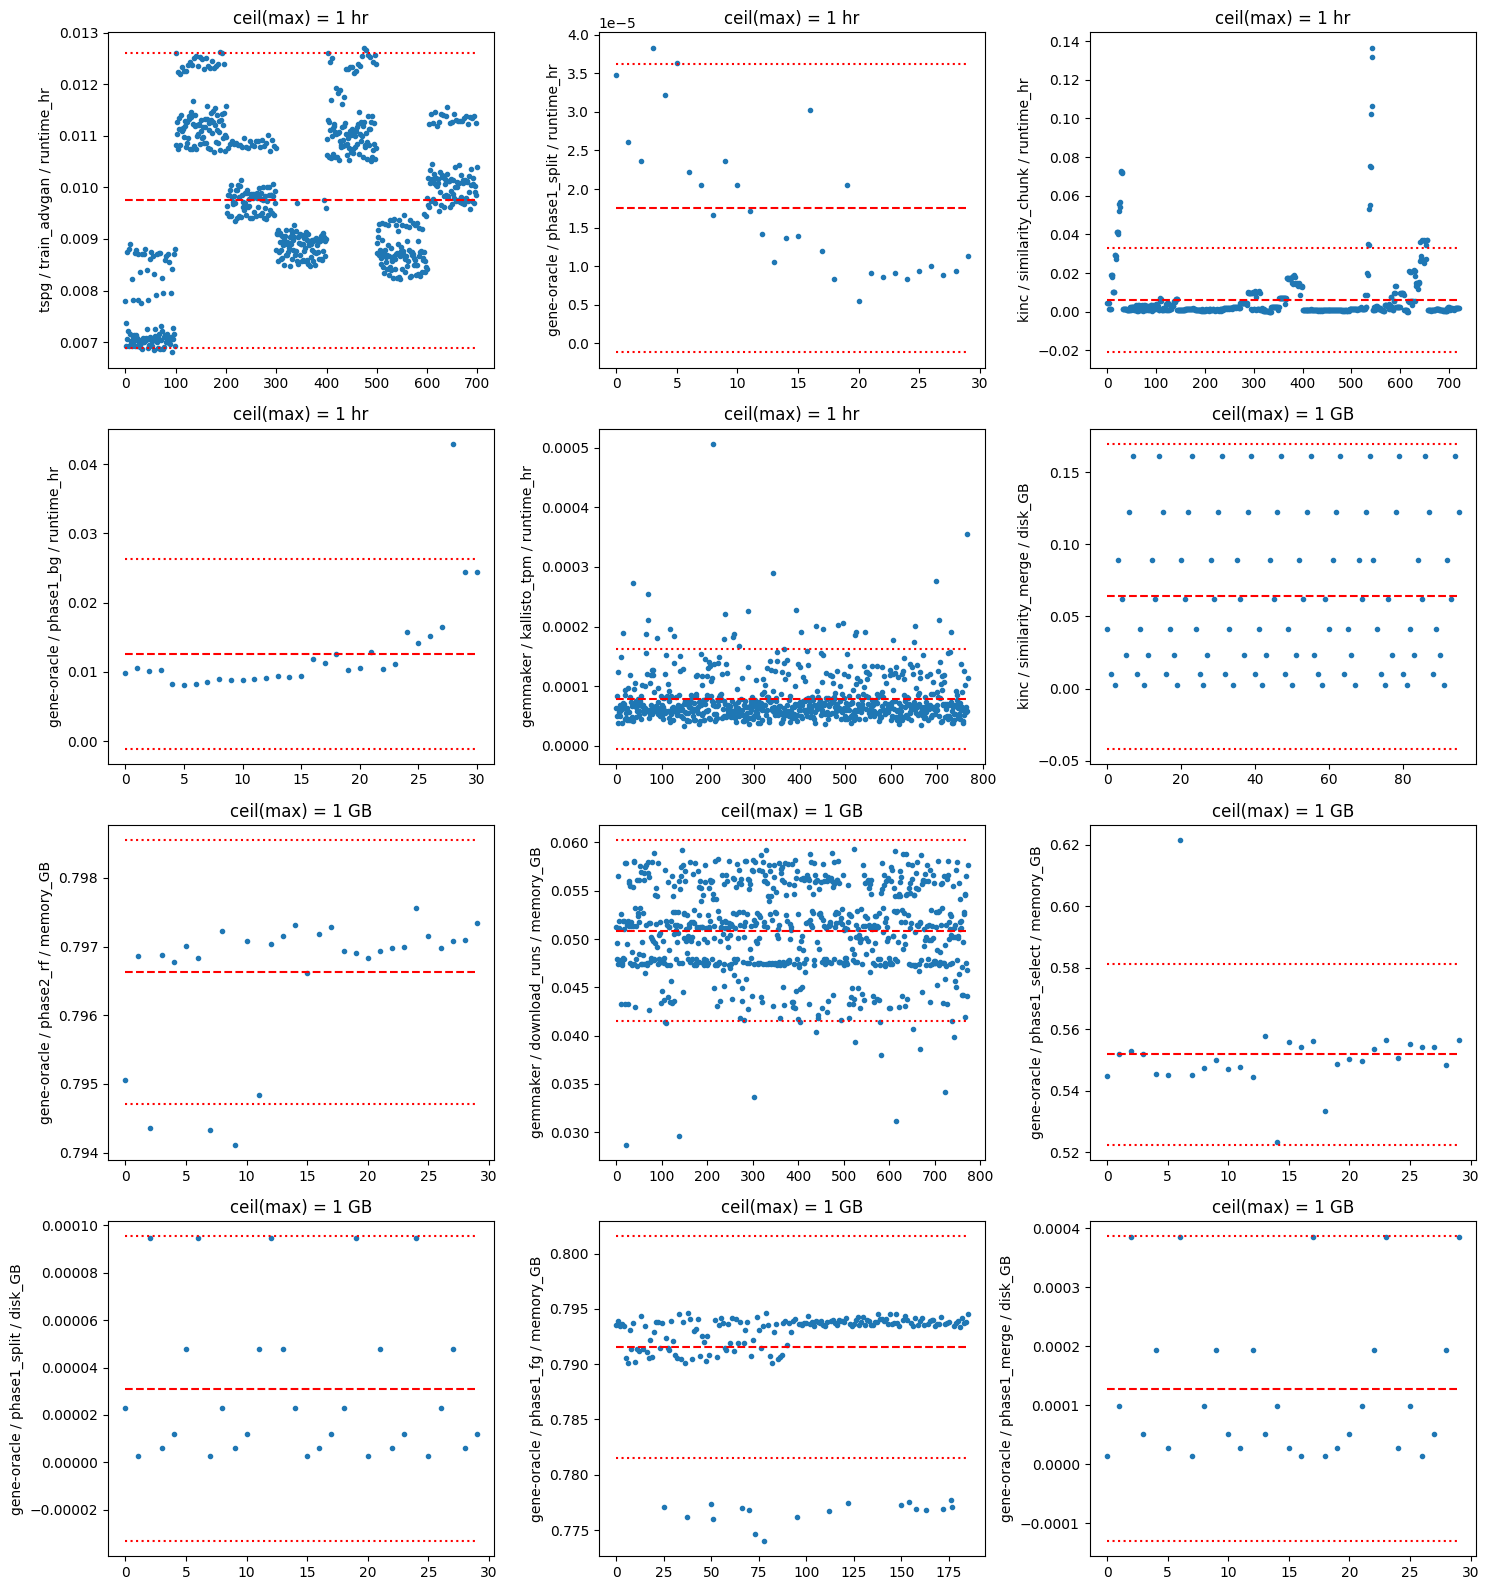

In [10]:
# initialize subplots
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# flatten list of axes
axes = [ax for i in range(len(axes)) for ax in axes[i]]

# sample from excluded prediction targets
targets_sampled = random.sample(targets_excl, n_rows * n_cols)

for (pipeline, process_name, target), ax in zip(targets_sampled, axes):
    # get target data
    df = data_map[pipeline][process_name]
    y_true = df[target]

    # compute mean and std
    y_bar = np.mean(y_true)
    y_std = np.std(y_true)
    y_err = 2.0 * y_std

    # get reccomended resource request
    y_recc = np.ceil(np.max(y_true))

    # plot target data with mean and 95% CI
    ax.plot(np.arange(len(y_true)), y_true, ls='', marker='.')
    ax.plot([0, len(y_true) - 1], [y_bar, y_bar], 'r--')
    ax.plot([0, len(y_true) - 1], [y_bar + y_err, y_bar + y_err], 'r:')
    ax.plot([0, len(y_true) - 1], [y_bar - y_err, y_bar - y_err], 'r:')
    ax.set_title('ceil(max) = %0.0f %s' % (y_recc, UNITS[target]))
    ax.set_ylabel('%s / %s / %s' % (pipeline, process_name, target))

plt.tight_layout()
plt.savefig('01-excluded-targets.pdf')
plt.savefig('01-excluded-targets.png')
plt.show()

### Evaluate Selected Targets


gemmaker download_runs runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


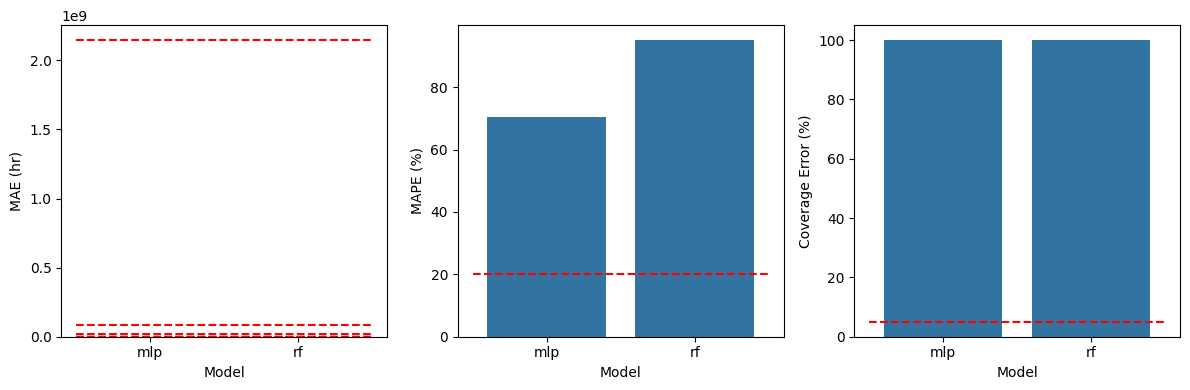

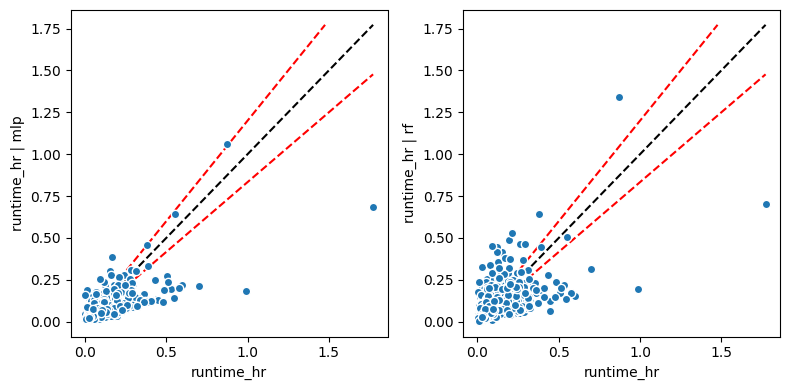

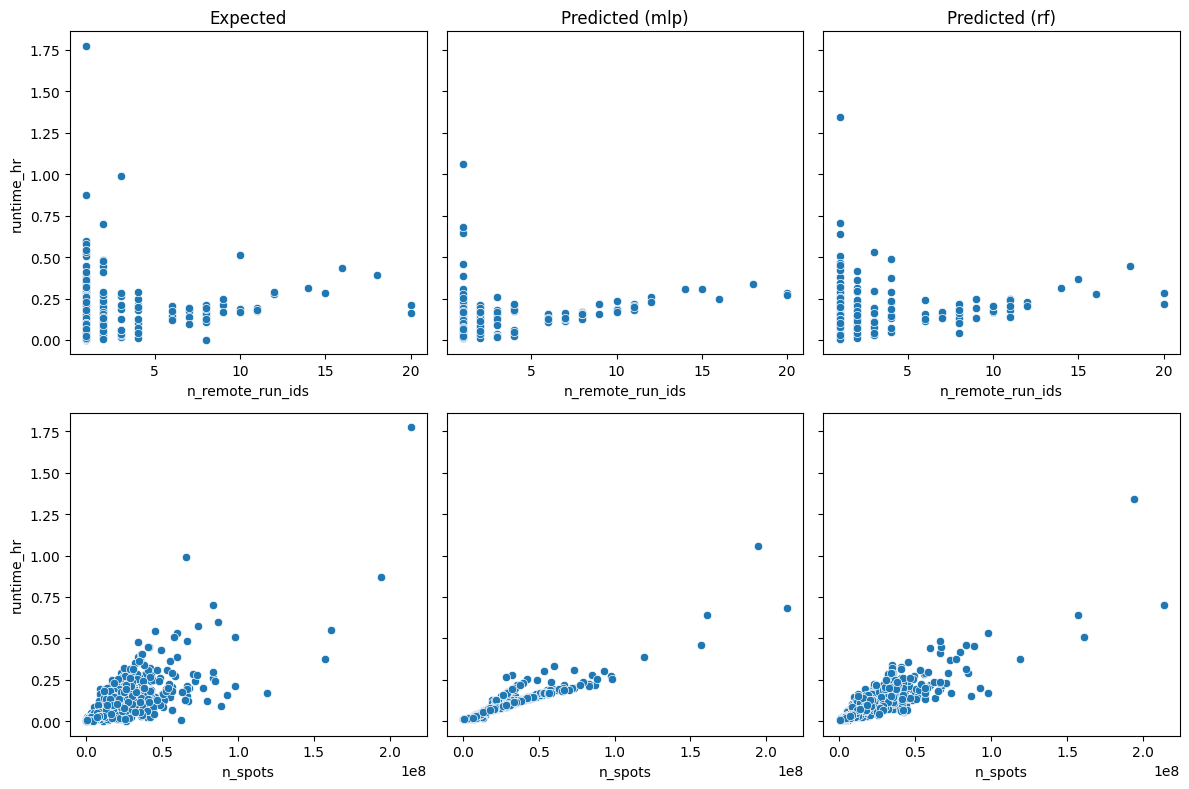


gemmaker download_runs disk_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


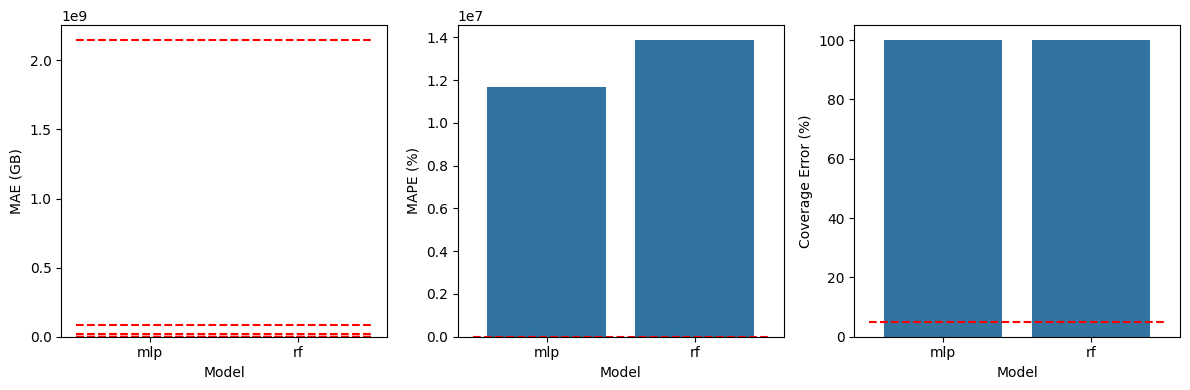

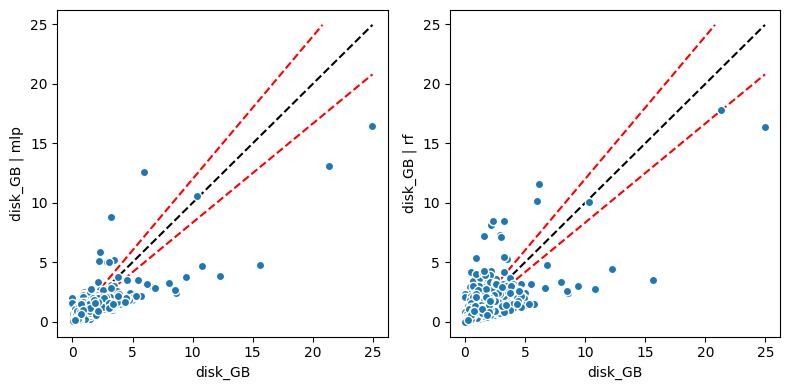

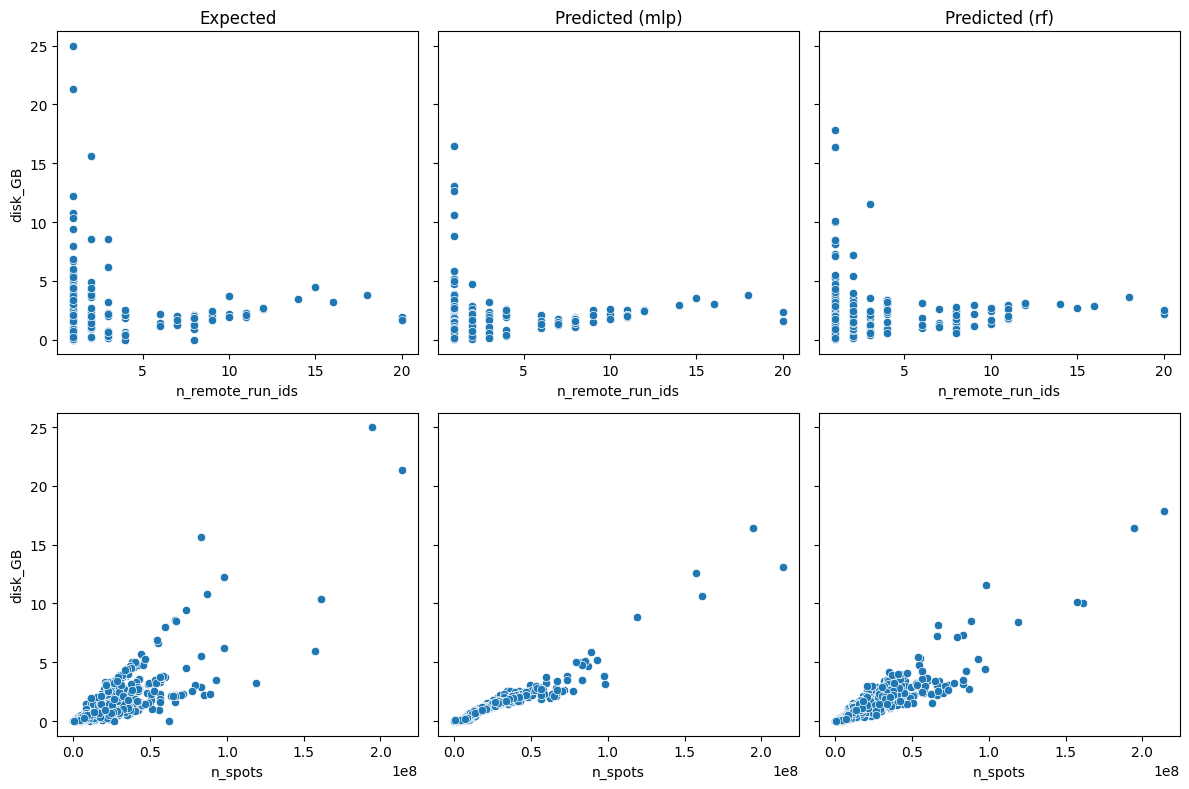


gemmaker fastq_dump runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


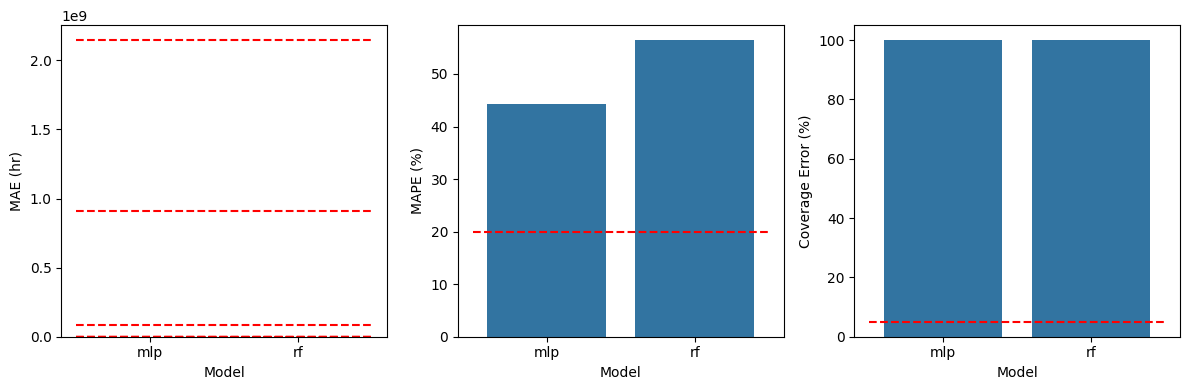

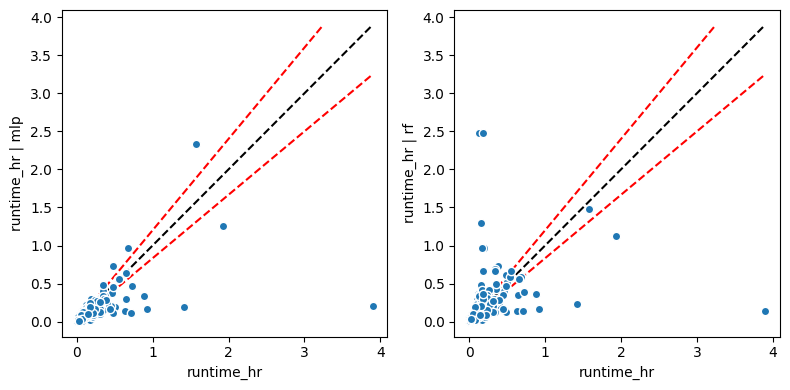

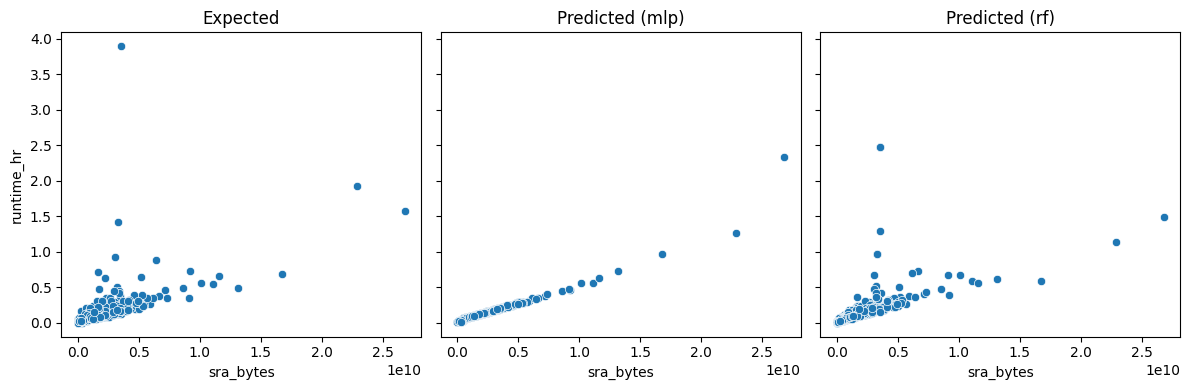


gemmaker fastq_dump disk_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


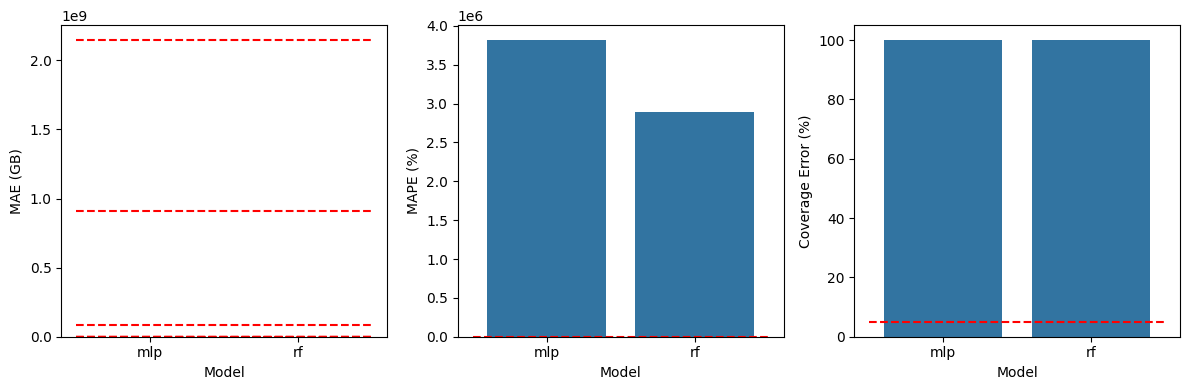

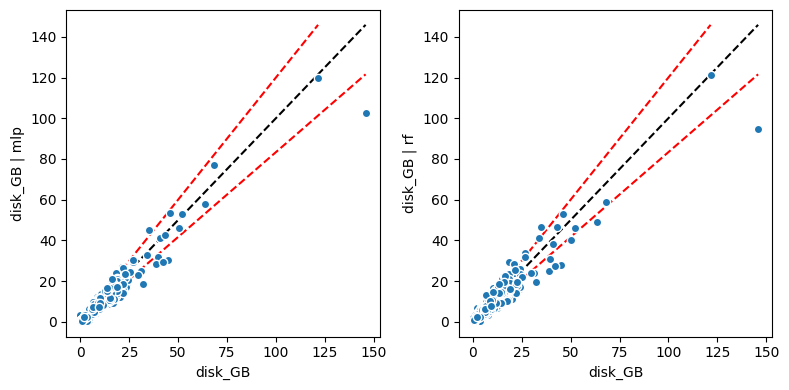

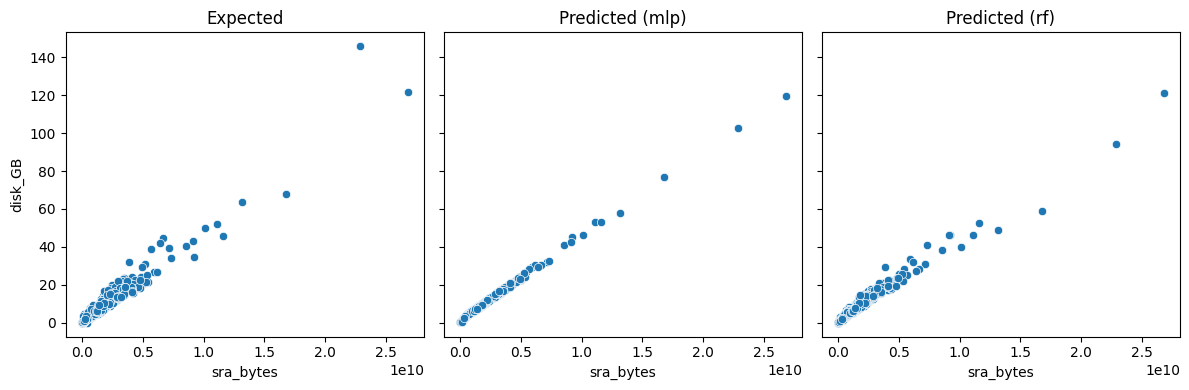


gemmaker fastq_merge runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


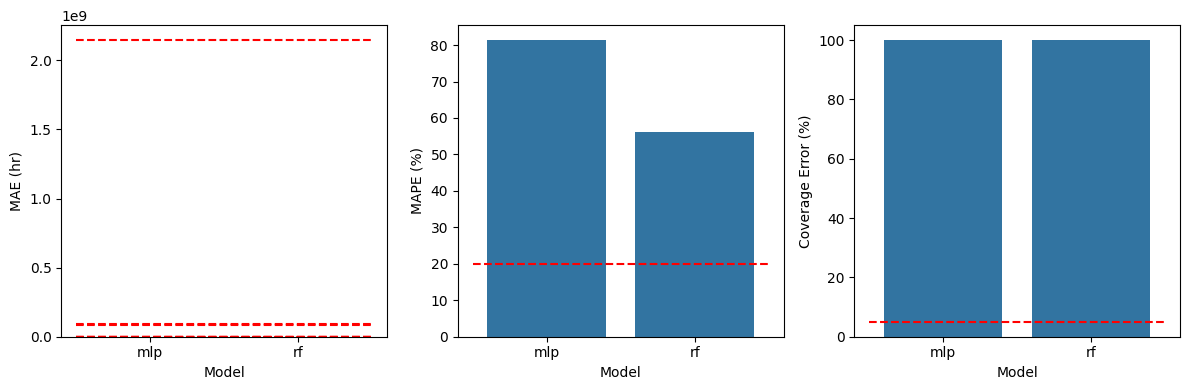

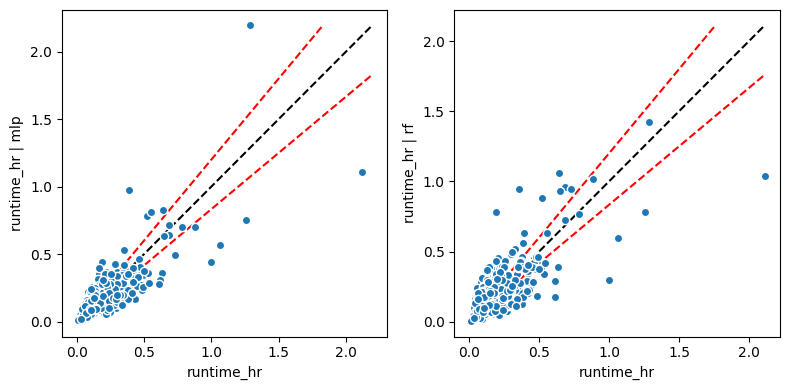

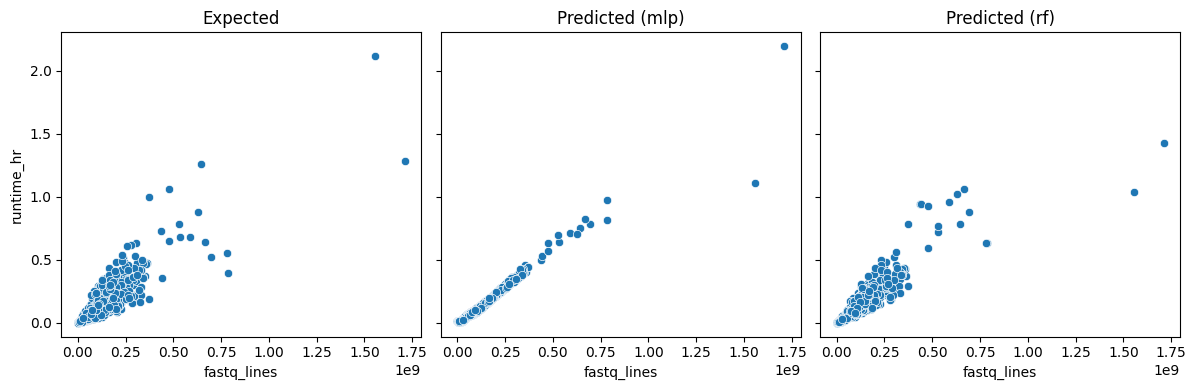


gemmaker fastq_merge disk_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


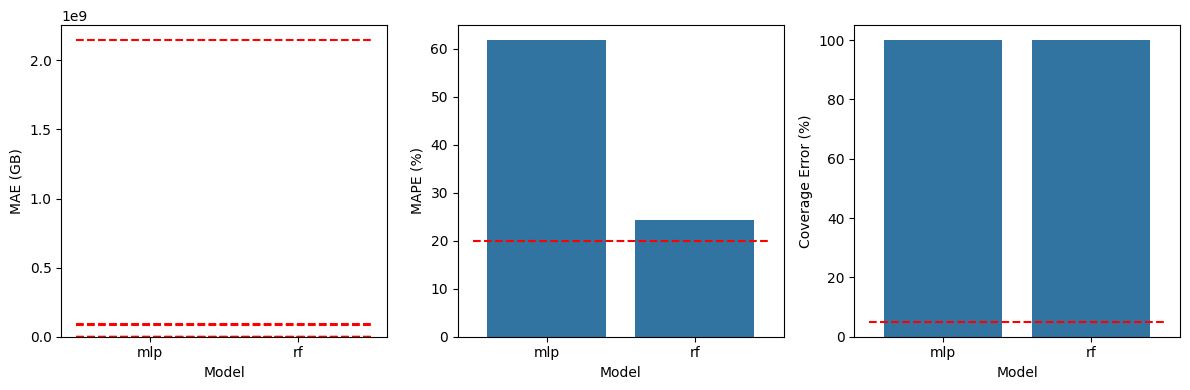

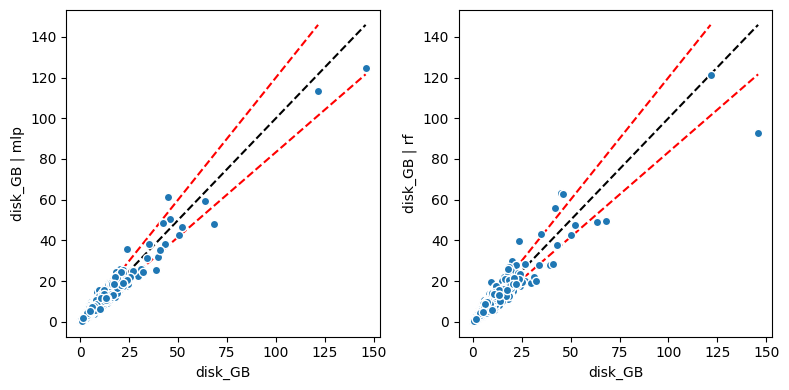

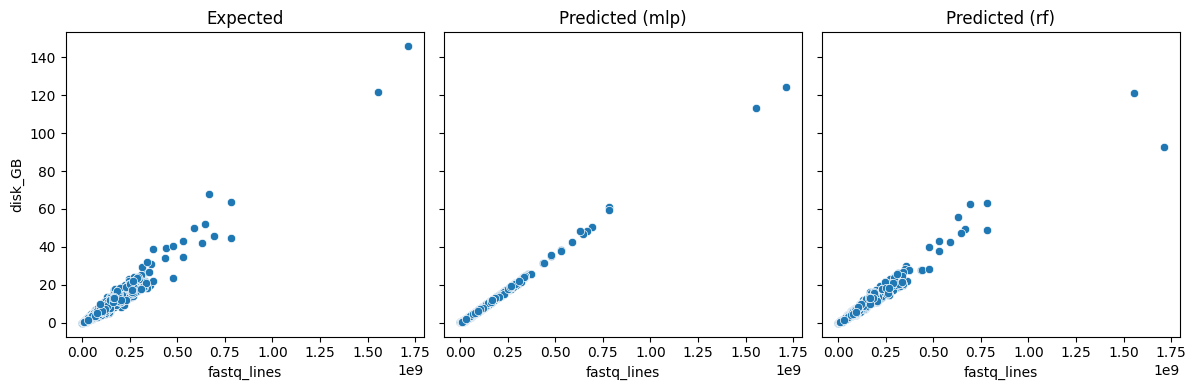


gemmaker fastqc_1 runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


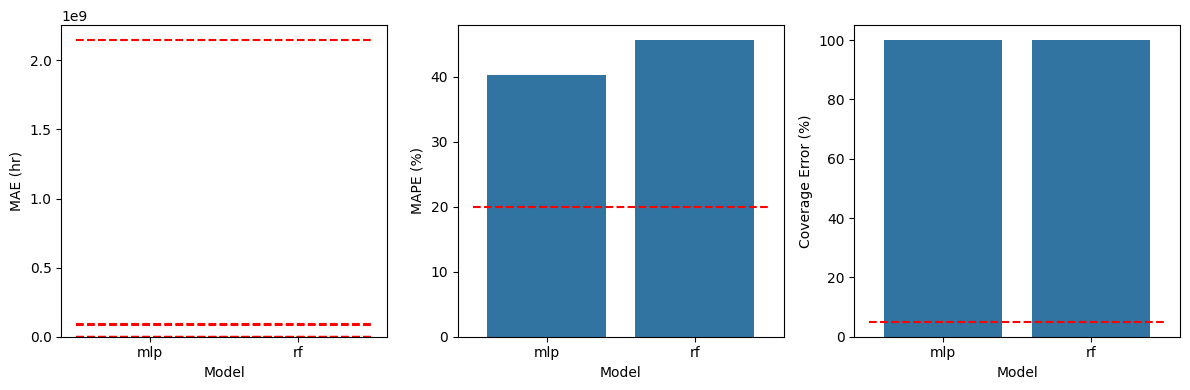

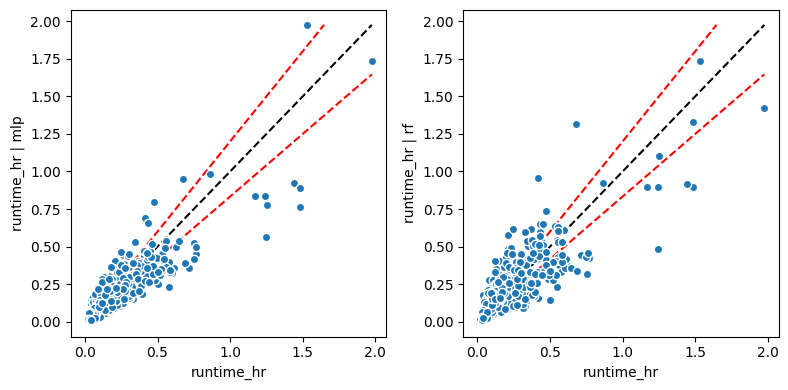

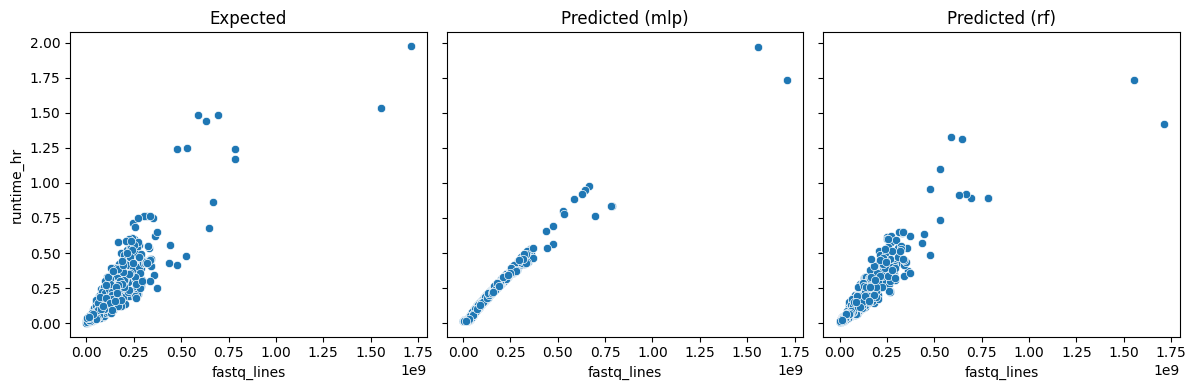


gene-oracle phase1_fg runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


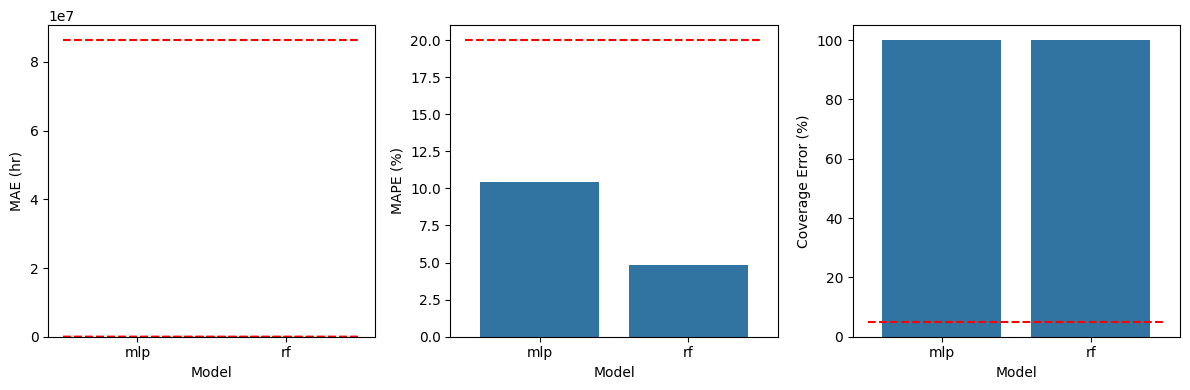

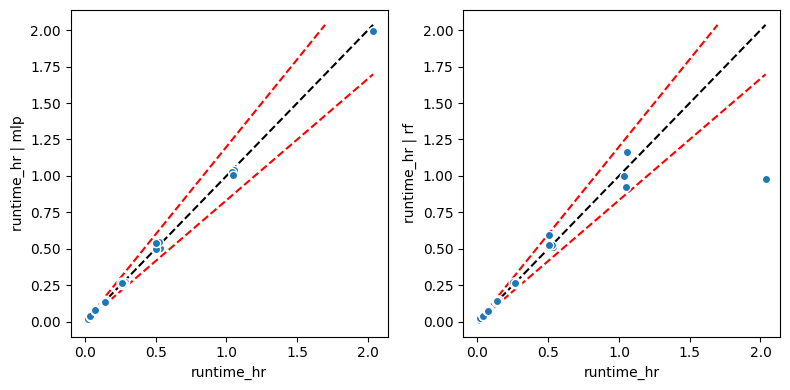

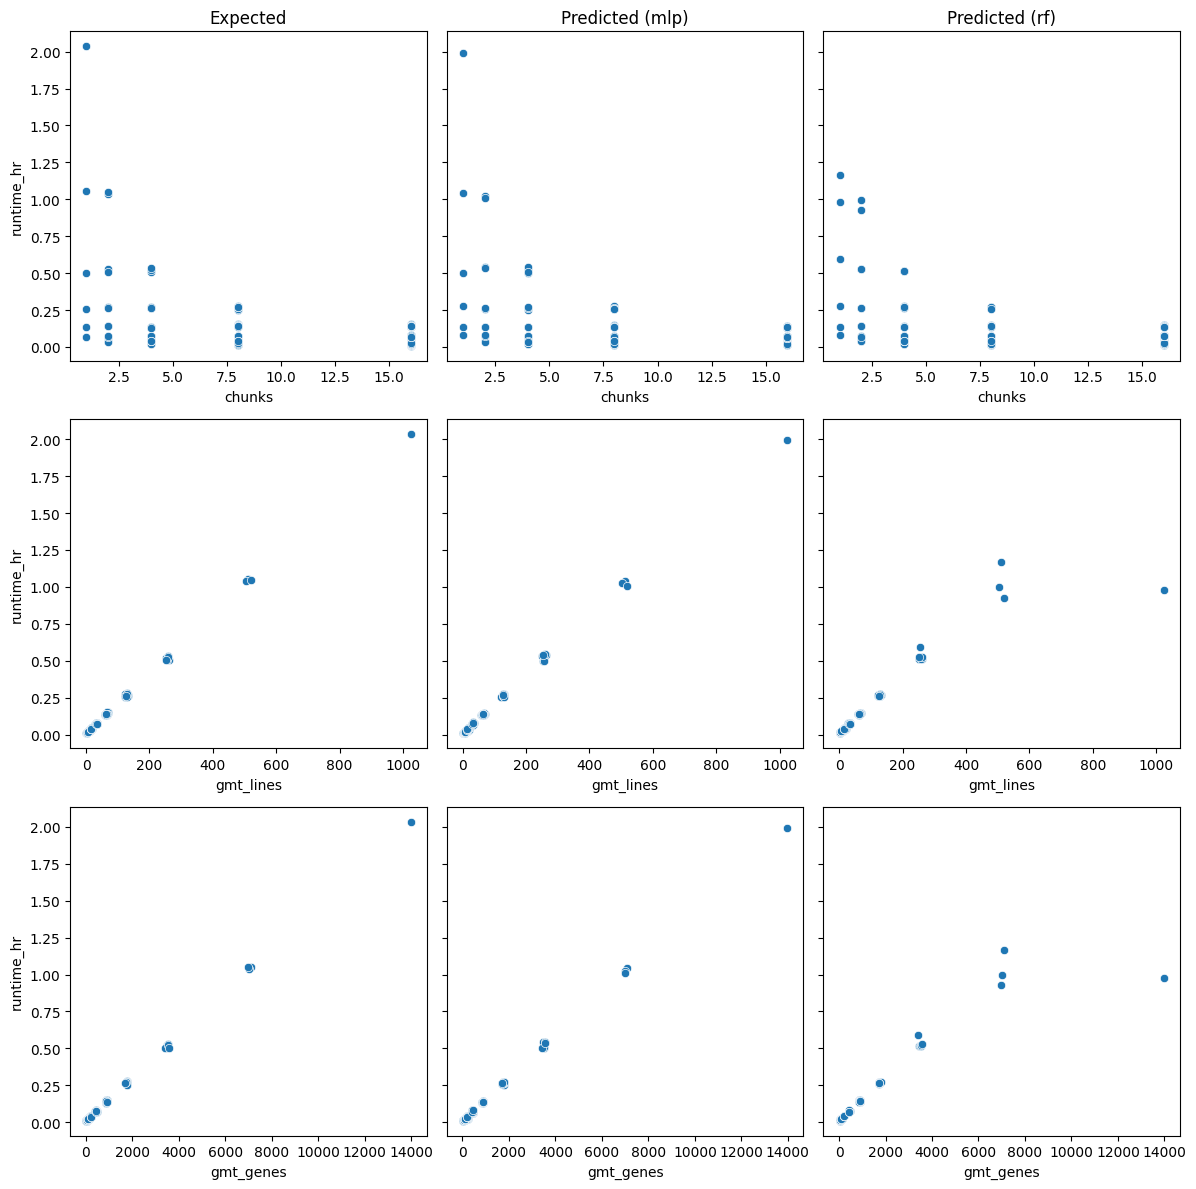


hemelb hemelb runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


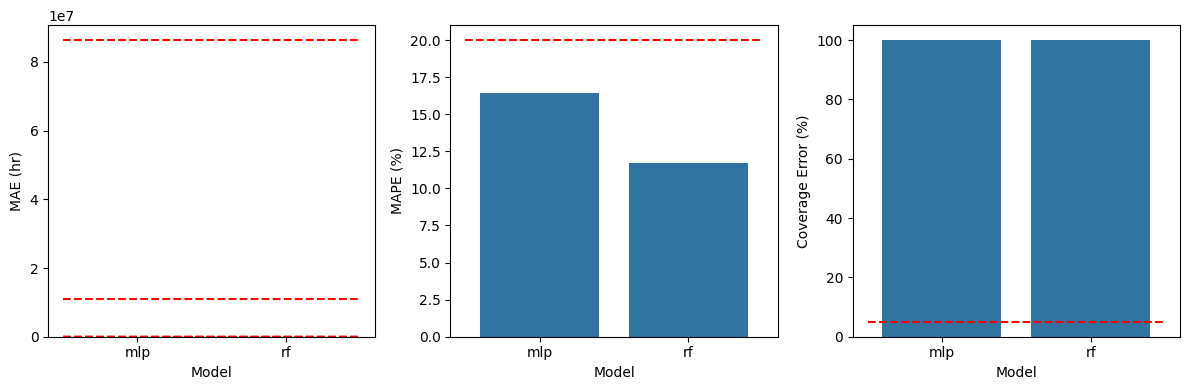

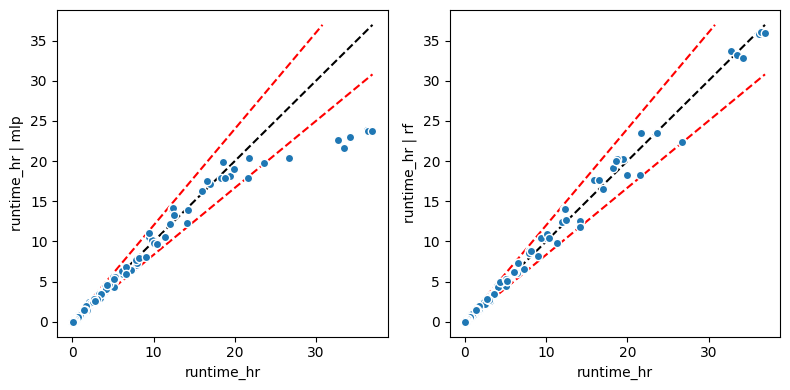

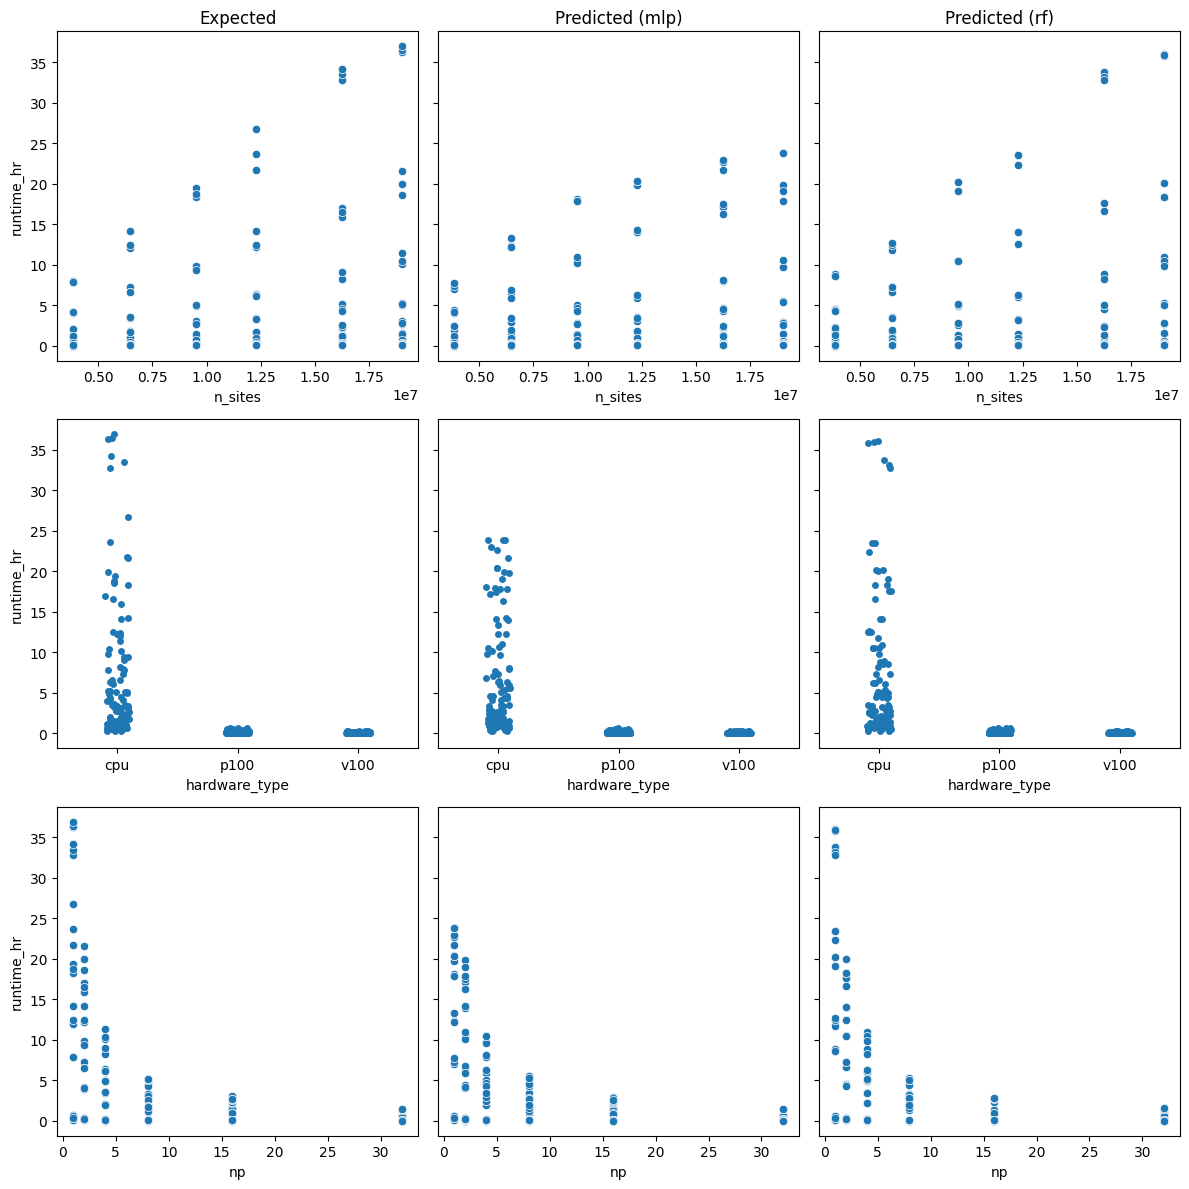


hemelb hemelb memory_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


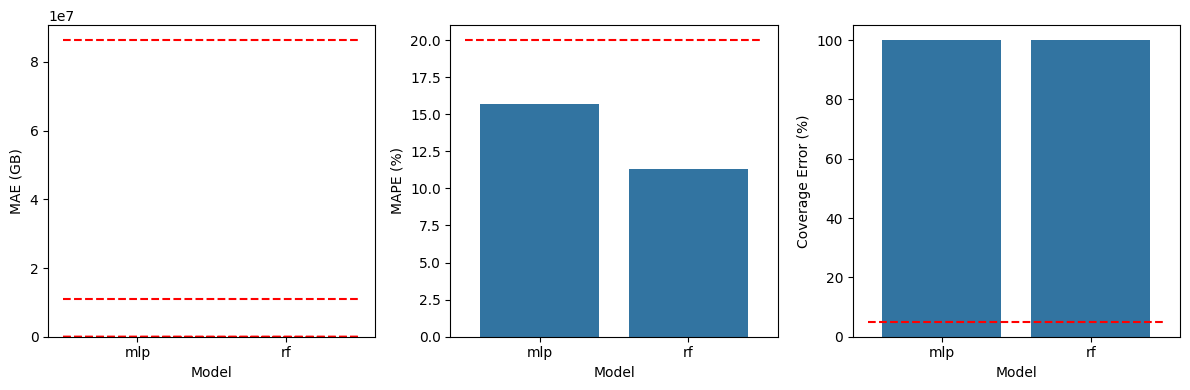

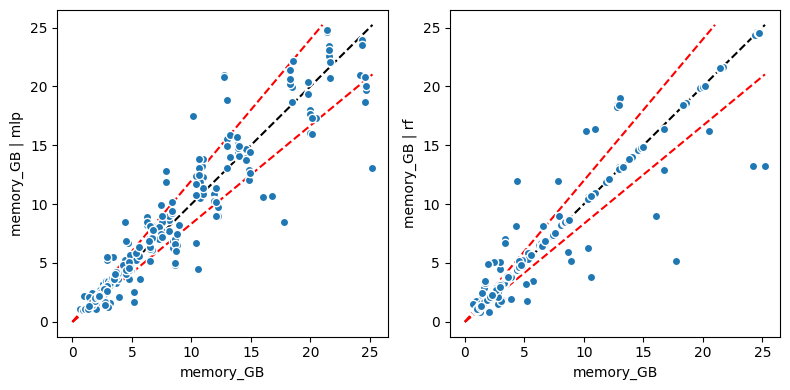

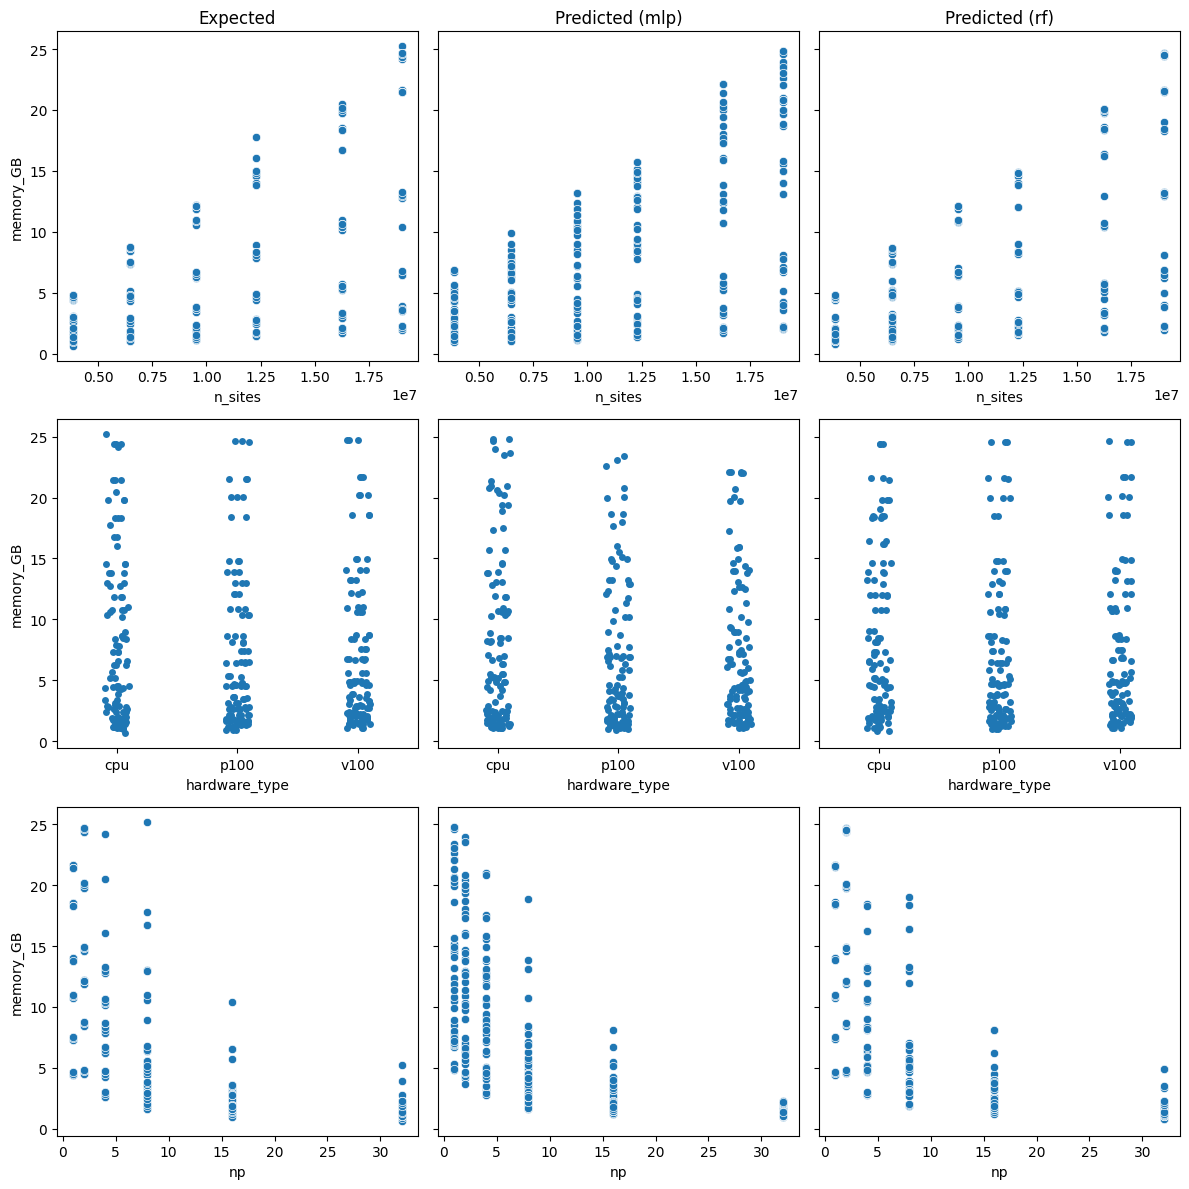


kinc similarity_chunk memory_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


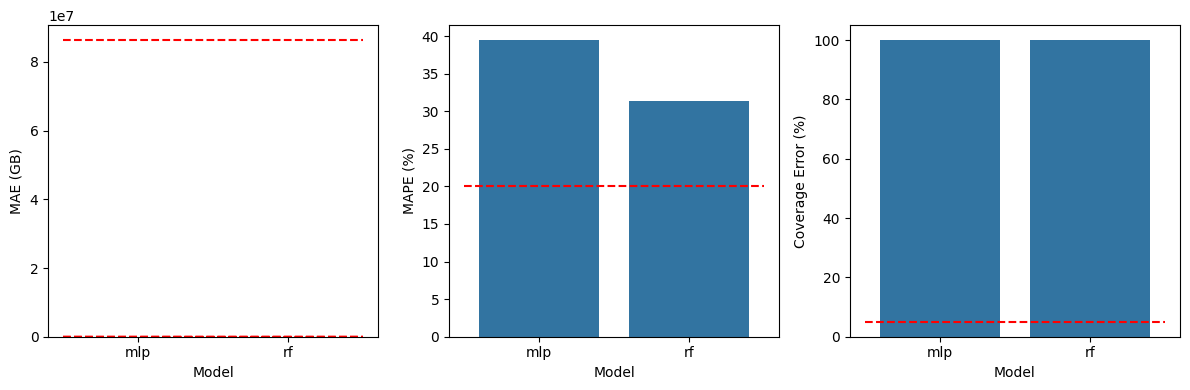

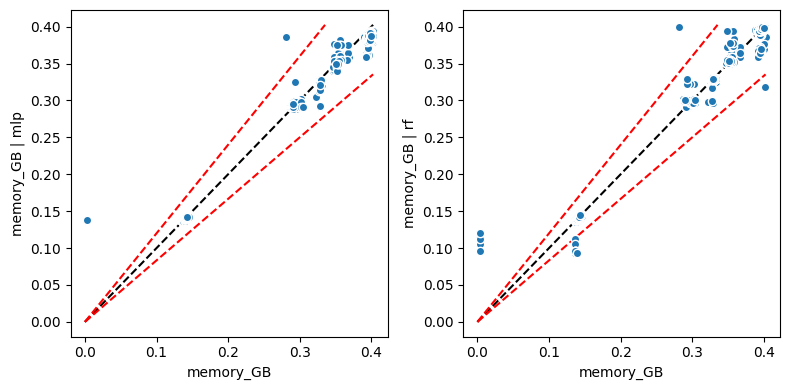

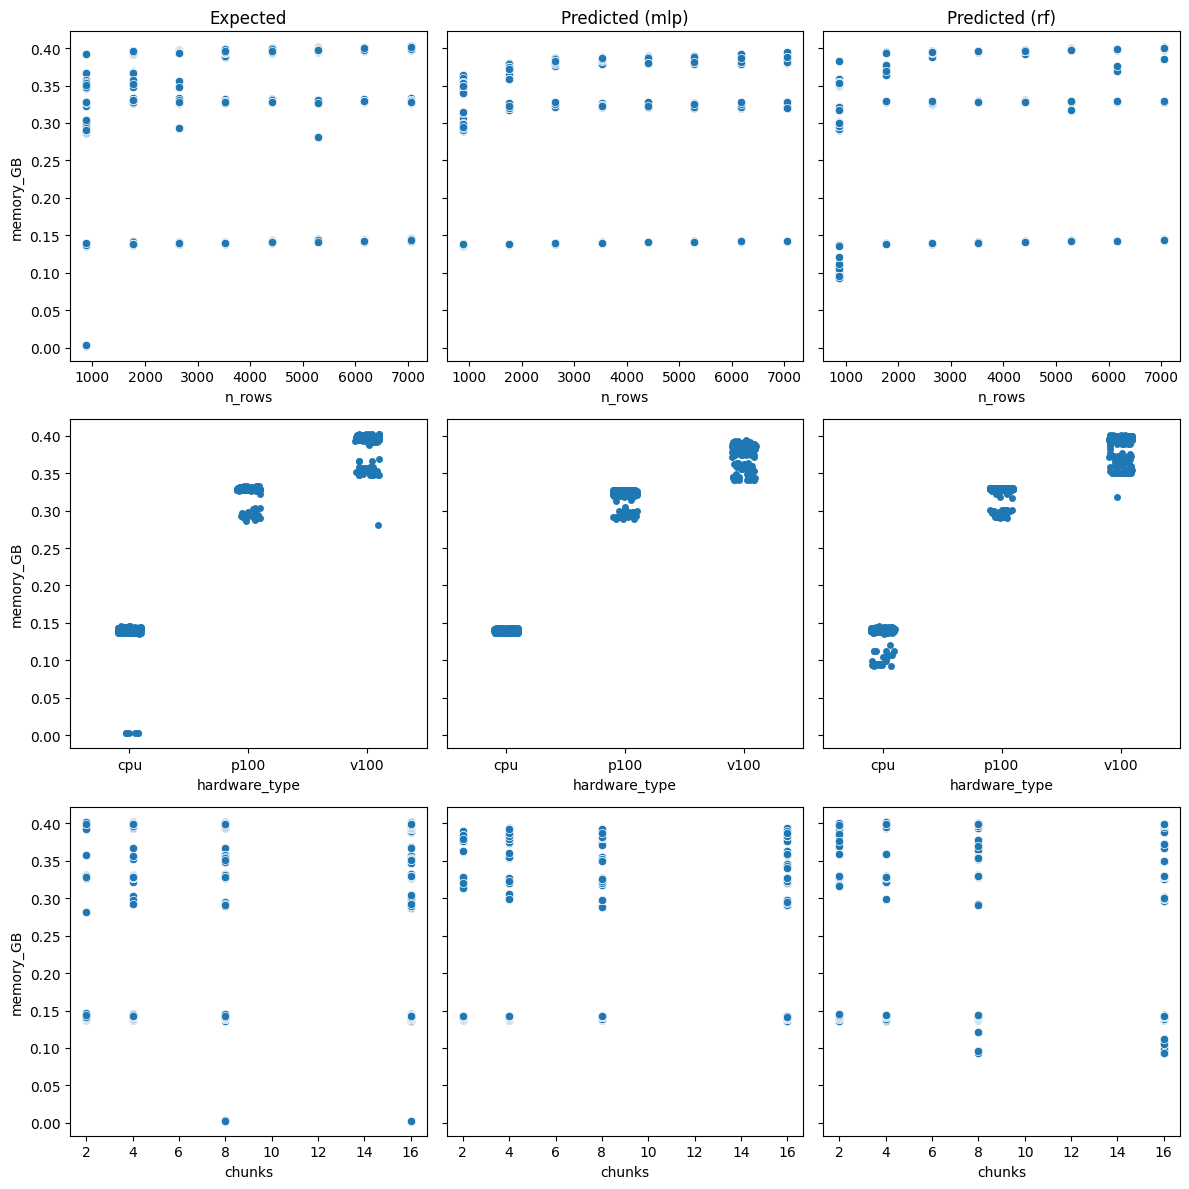


kinc similarity_mpi runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


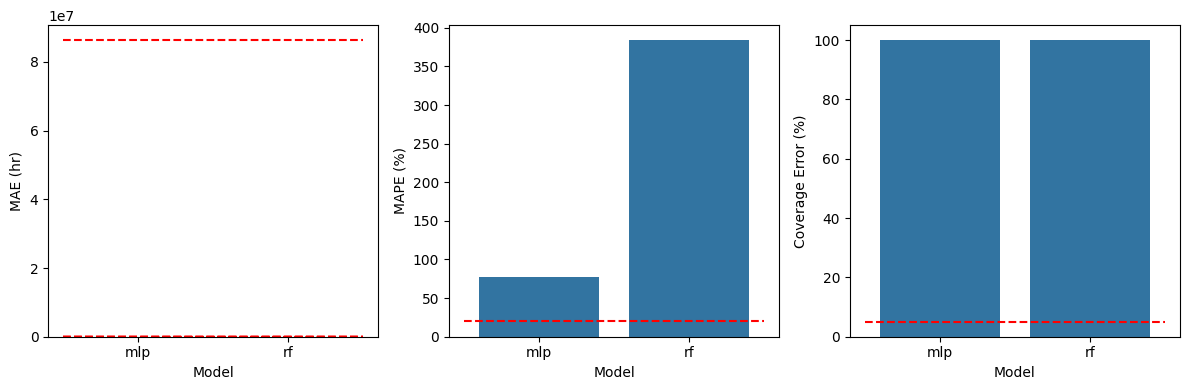

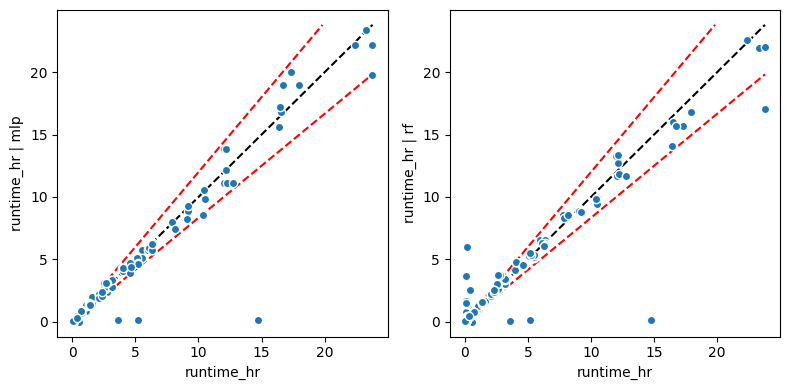

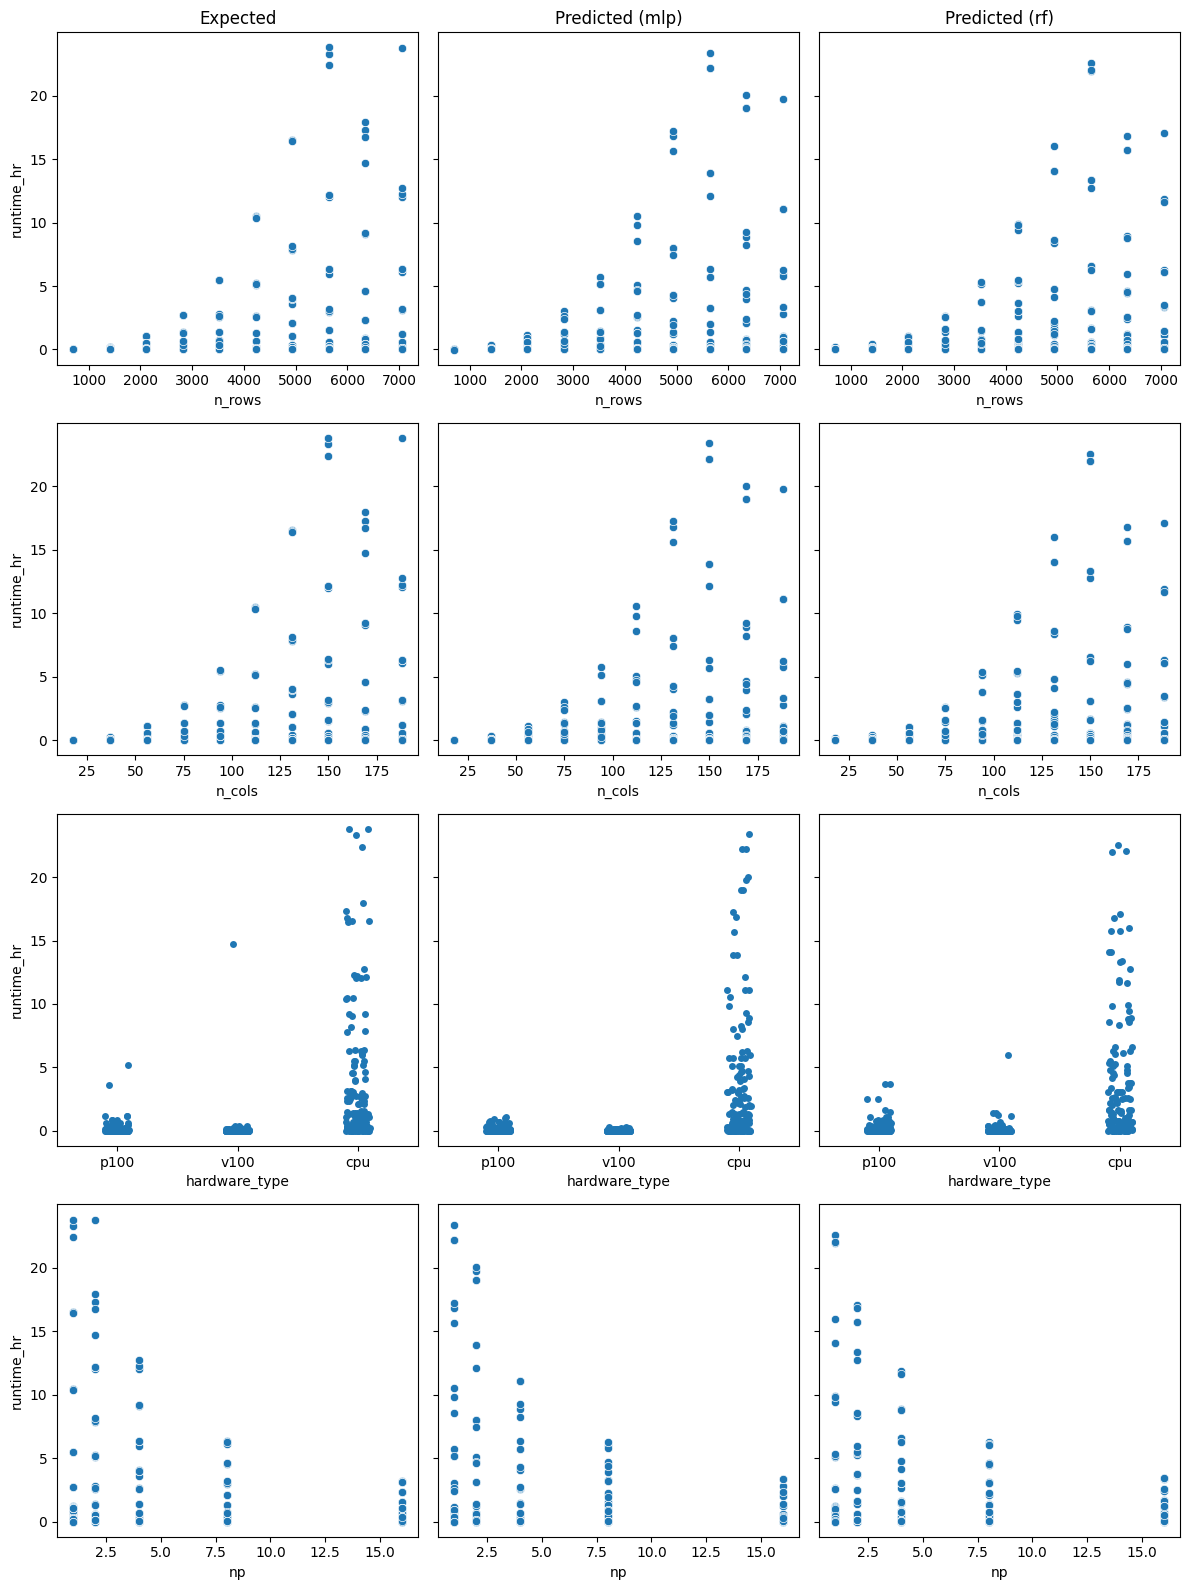


kinc similarity_mpi memory_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


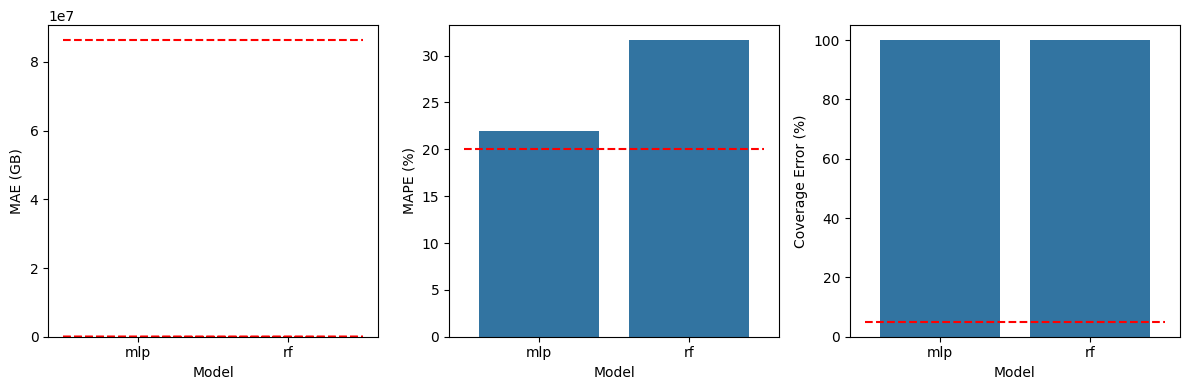

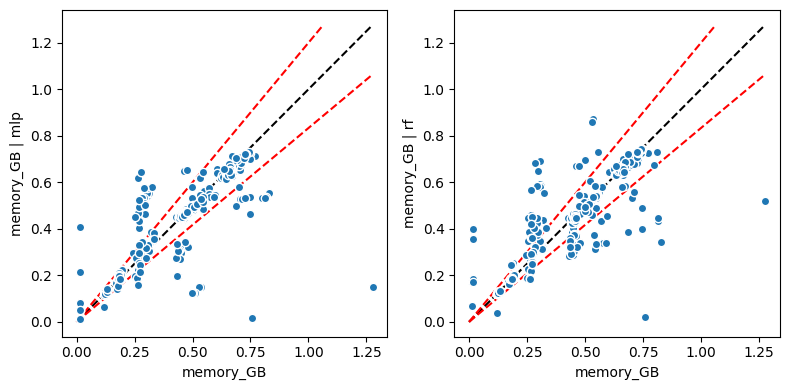

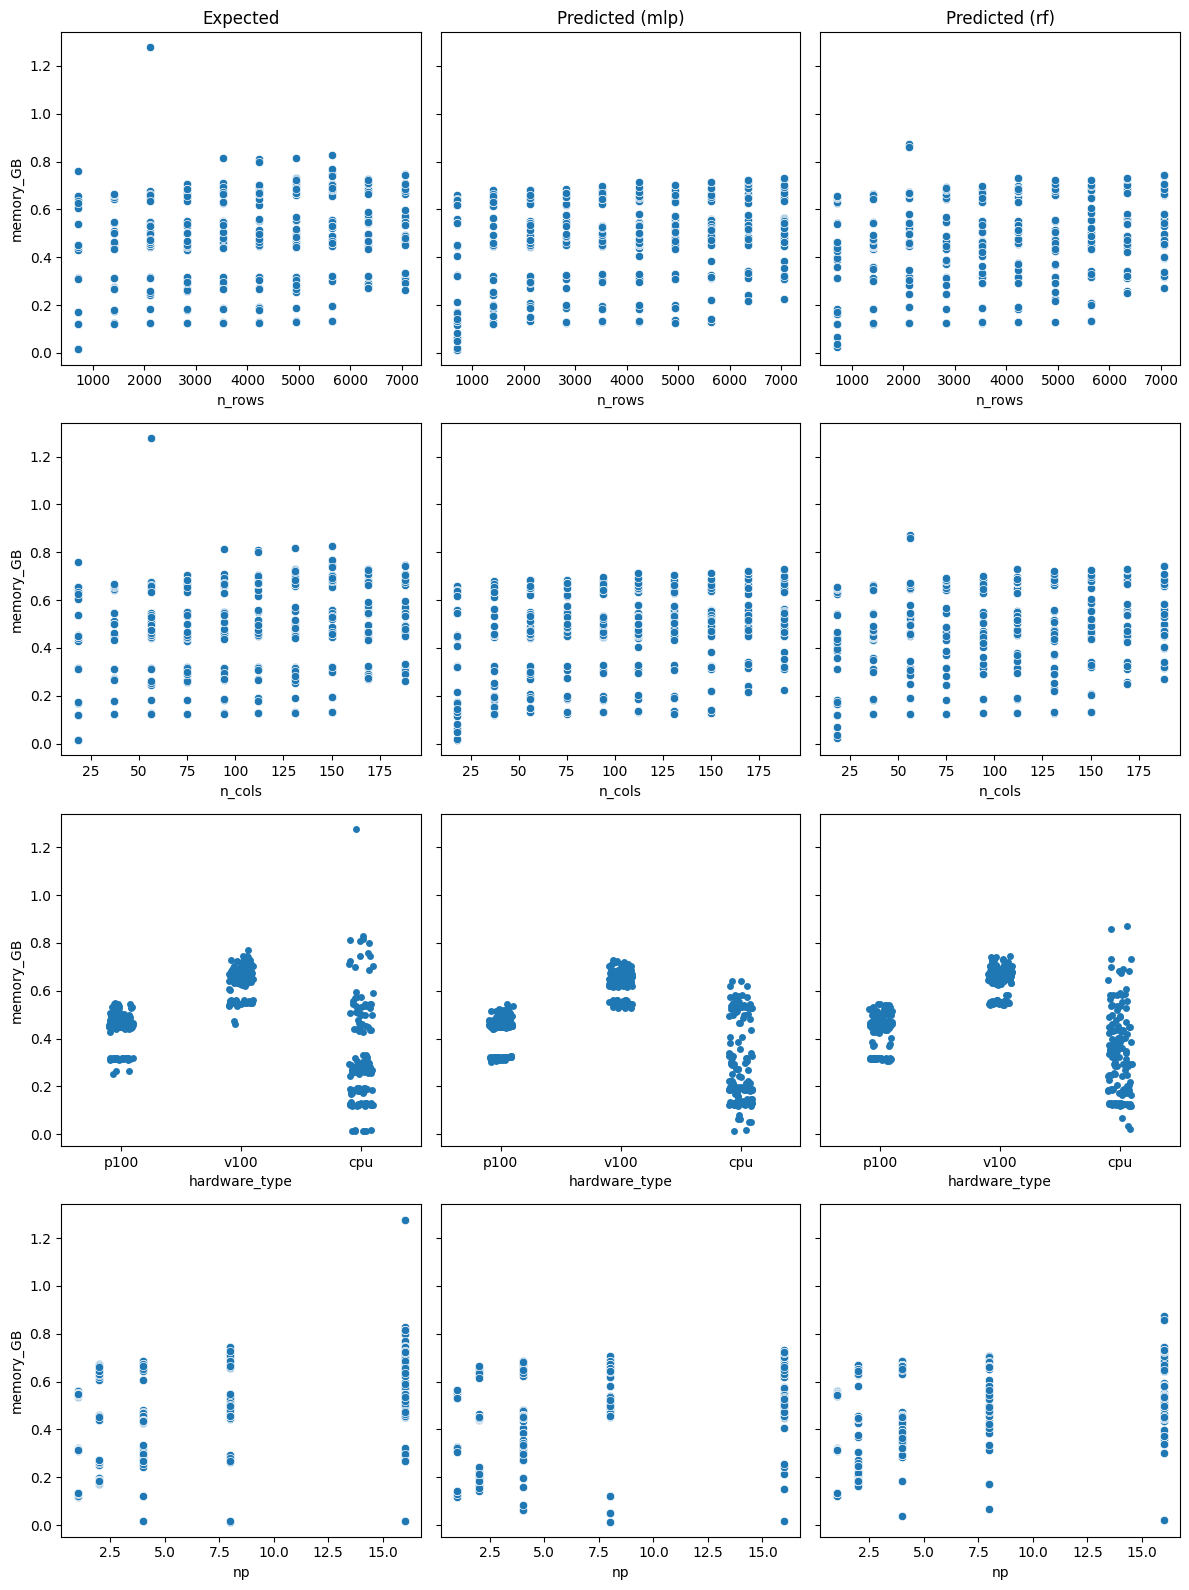


kinc extract runtime_hr


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


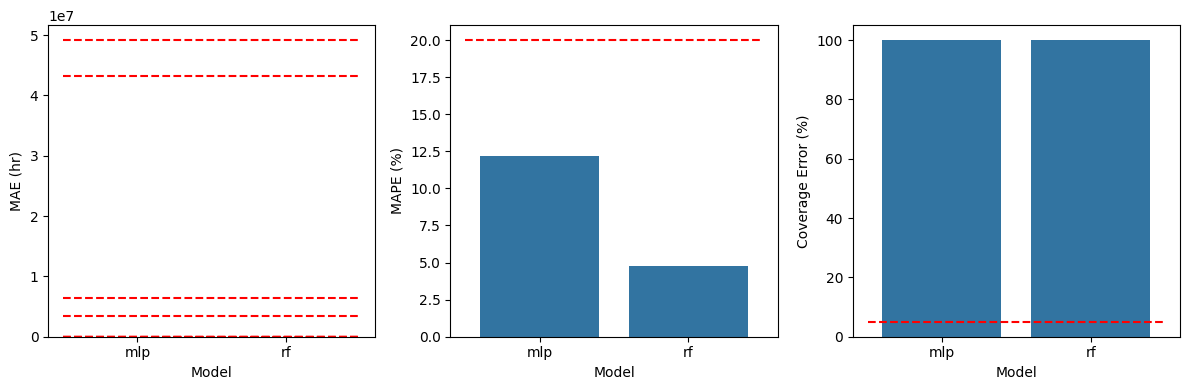

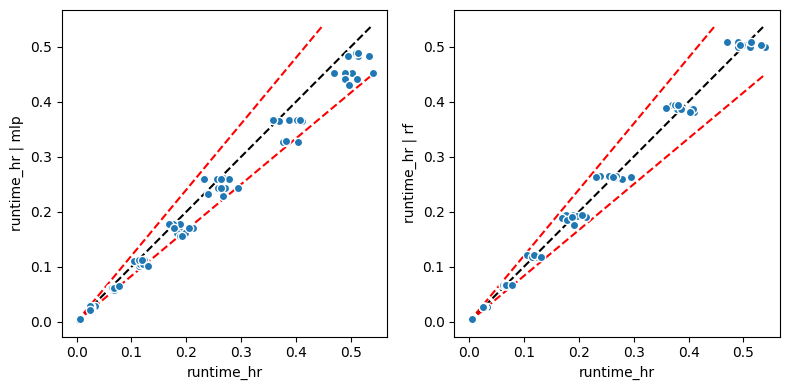

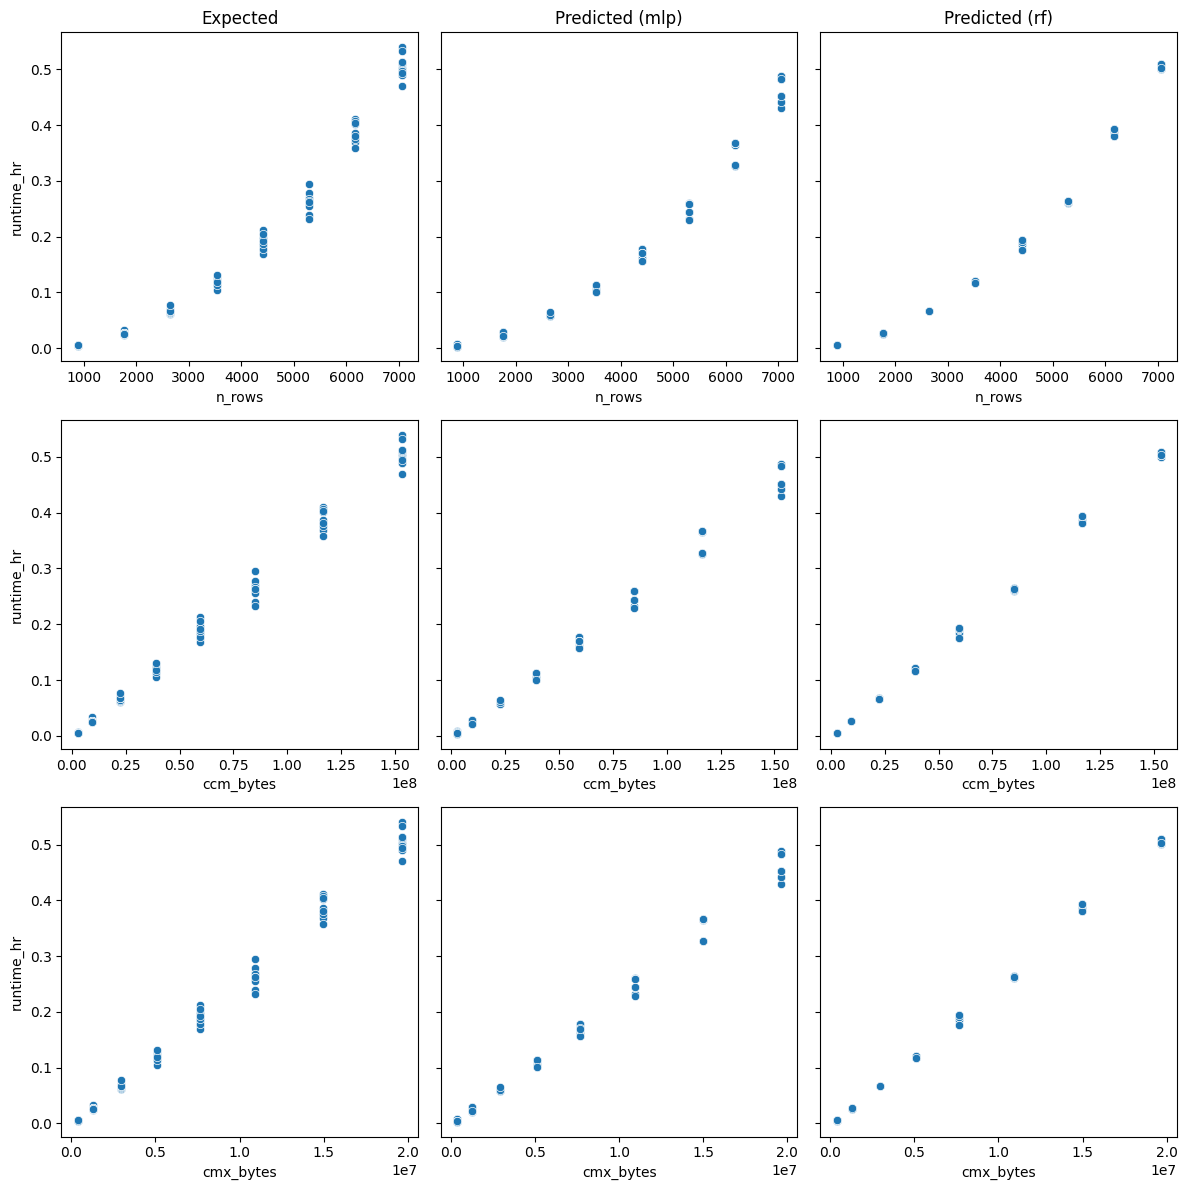


tspg train_target memory_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


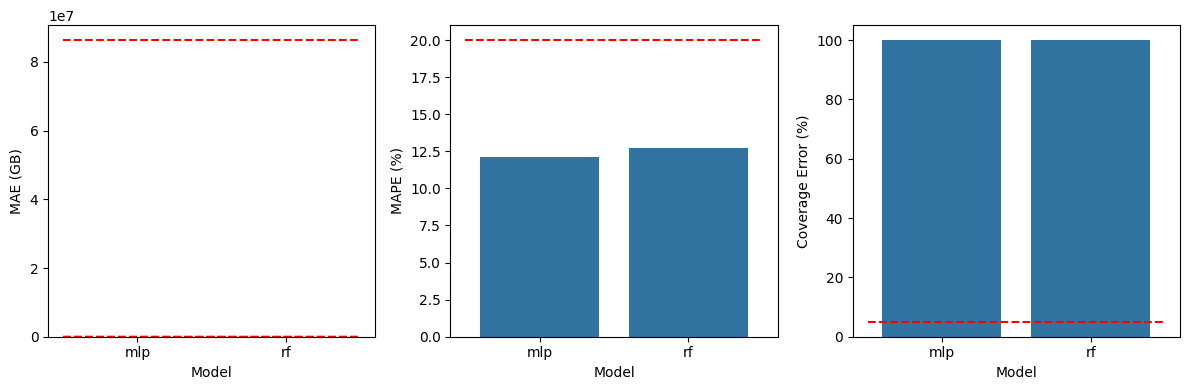

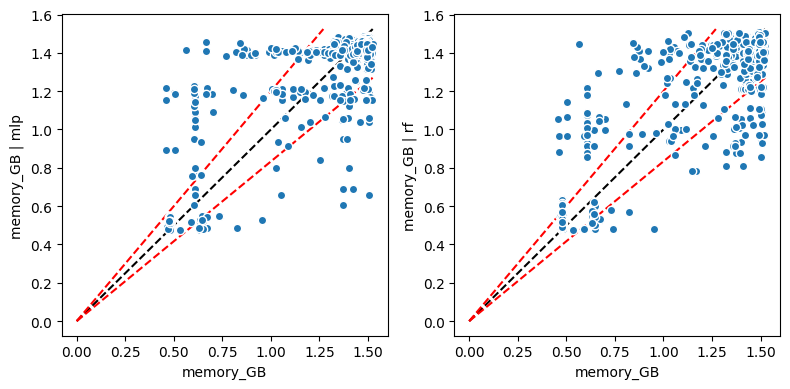

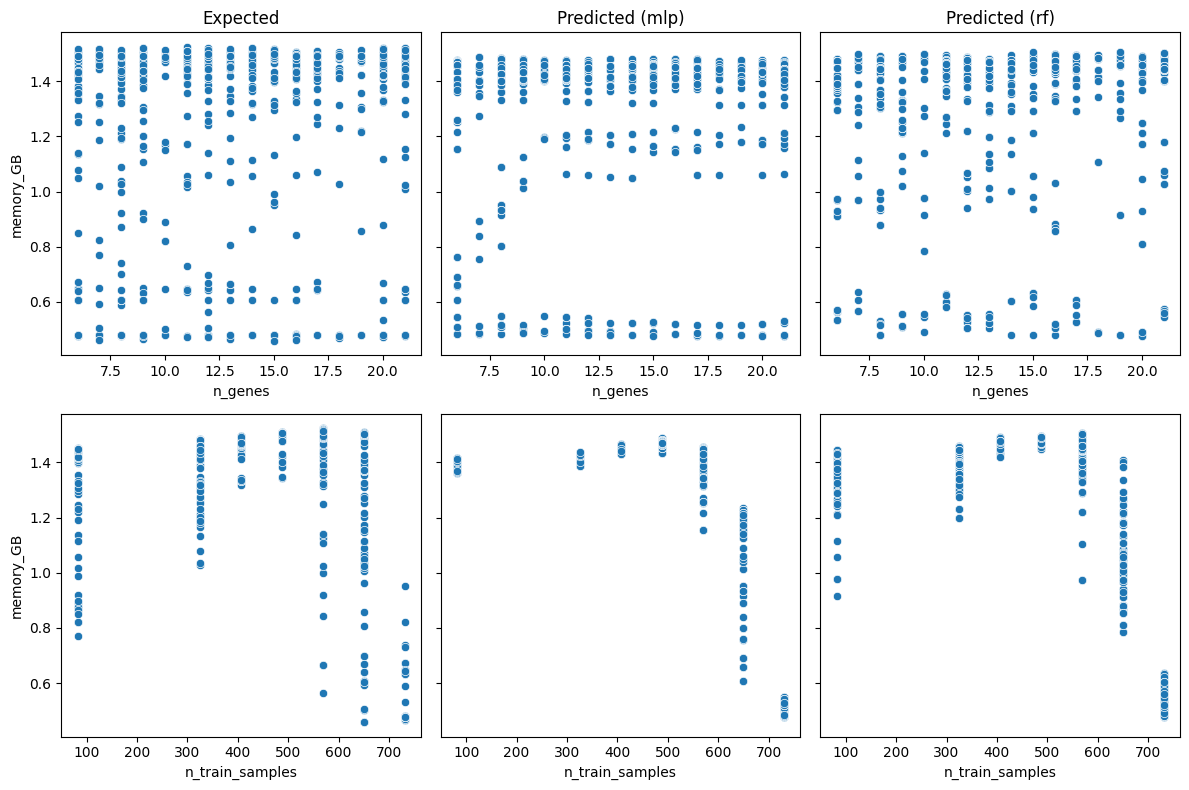


tspg perturb memory_GB


/tmp/ipykernel_49495/2076479770.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/2076479770.py:68: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


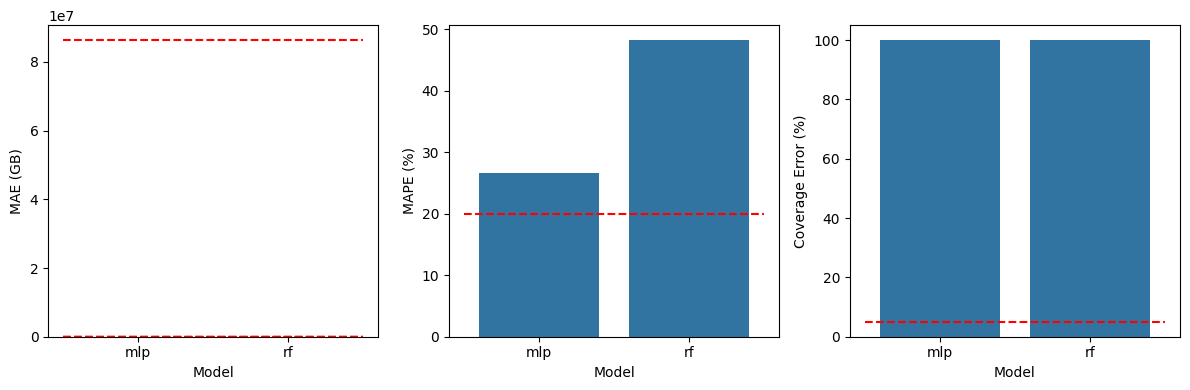

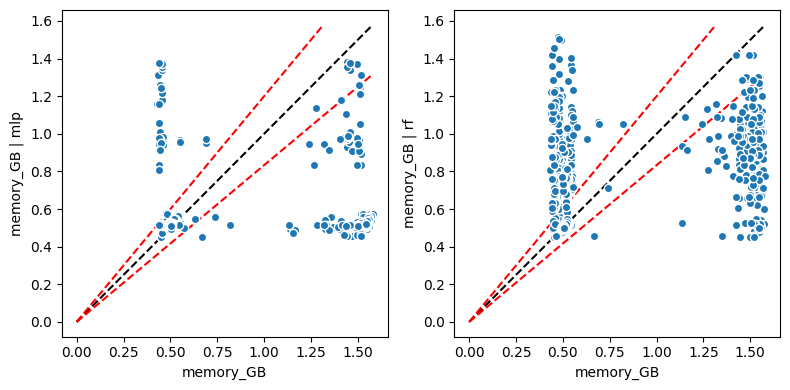

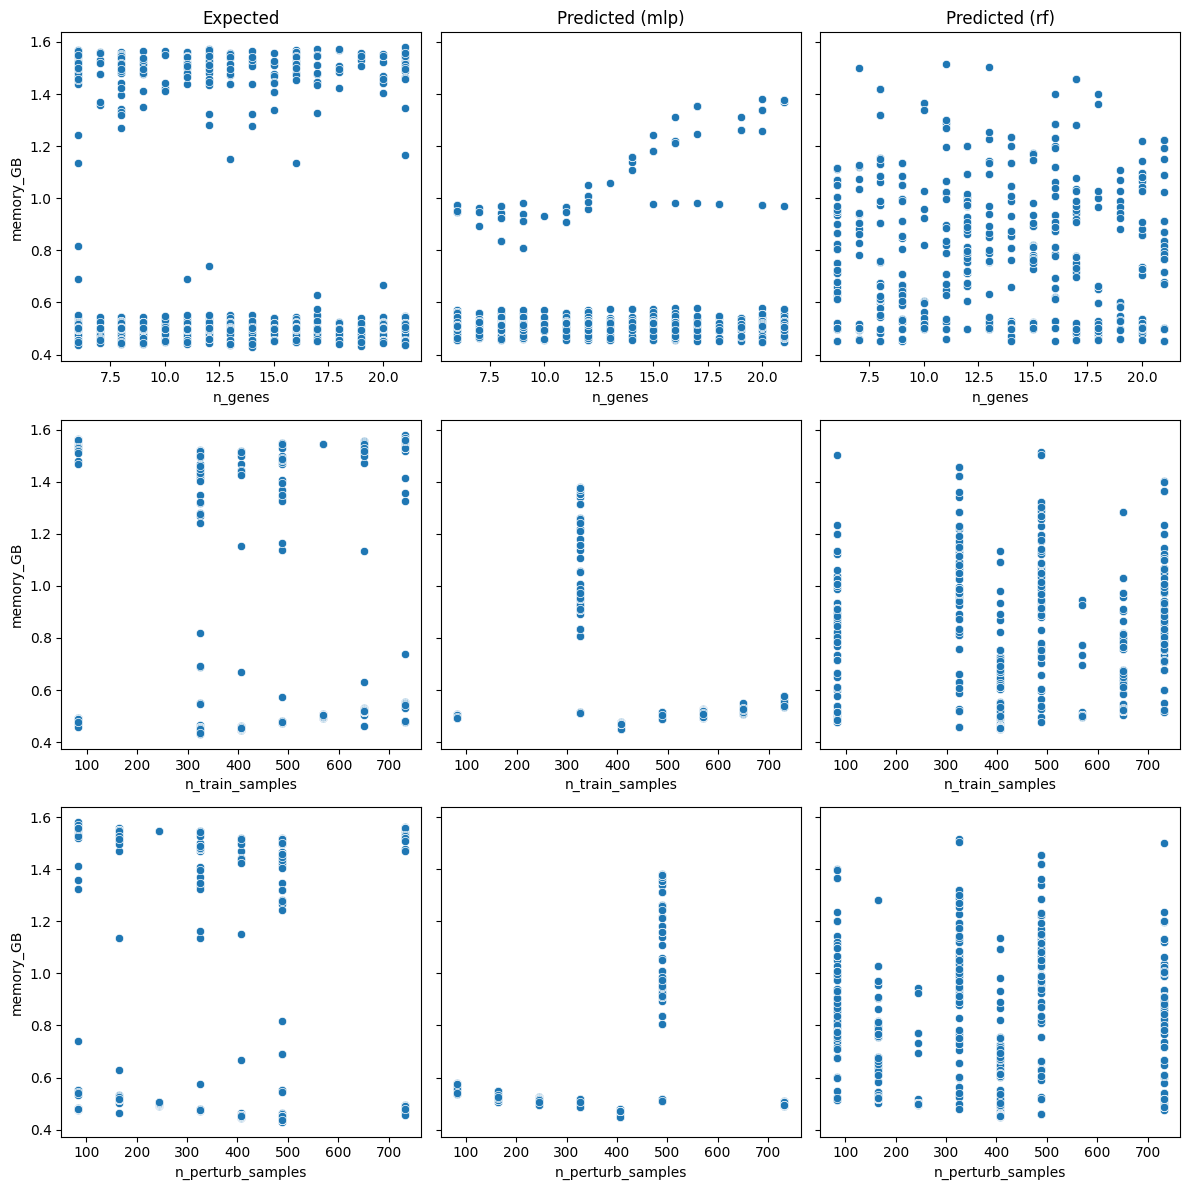

In [18]:
for pipeline, process_name, target in targets_incl:
    print()
    print(pipeline, process_name, target)

    # get performance data for pipeline / process
    df = data_map[pipeline][process_name]
    inputs = config_map[pipeline]['train_inputs'][process_name]

    # remove inputs that have constant value
    inputs = [c for c in inputs if df[c].nunique() > 1]

    # skip if there are no input features
    if len(inputs) == 0:
        print('no input features, skipping')
        continue

    # extract performance dataset
    X, y, columns, _ = create_dataset(df, inputs, target)

    # define models
    models = [
        ('mlp', create_mlp(X.shape[1])),
        ('rf', create_rf()),
    ]

    # prepend scaler to each model
    models = [(name, create_pipeline(model)) for name, model in models]

    # evaluate each model on dataset
    df_scores = []
    y_preds = {}

    for name, model in models:
        # evaluate model
        scores, y_bar, y_std = evaluate_cv(model, X, y)

        # save metrics for plots
        df_scores.append({
            'name': name,
            'mae': scores['mae'],
            'mpe': scores['mpe'],
            'cov': scores['cov']
        })

        # save predictions for plots
        y_preds[name] = y_bar, y_std

    # save results
    df_scores = pd.DataFrame(df_scores)

    # plot evaluation scores for each model
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    plt.subplot(1, 3, 1)
    numeric_columns = df.select_dtypes(include=np.number).columns
    sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
    plt.xlabel('Model')
    plt.ylabel('MAE (%s)' % (UNITS[target]))
    plt.plot(plt.xlim(), [df[numeric_columns].median(), df[numeric_columns].median()], 'r--')

    plt.subplot(1, 3, 2)
    sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
    plt.xlabel('Model')
    plt.ylabel('MAPE (%)')
    plt.plot(plt.xlim(), [20, 20], 'r--')

    plt.subplot(1, 3, 3)
    sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')
    plt.xlabel('Model')
    plt.ylabel('Coverage Error (%)')
    plt.plot(plt.xlim(), [5, 5], 'r--')

    plt.tight_layout()
    plt.show()

    # plot expected vs predicted target values for each model
    fig, axes = plt.subplots(1, len(models), figsize=(4 * len(models), 4))

    for (name, model), ax in zip(models, axes):
        # get model predictions
        y_bar, y_std = y_preds[name]

        # save model predictions
        target_pred = '%s | %s' % (target, name)
        df[target_pred] = y_bar

        # create scatterplot
        ax.errorbar(
            x=target,
            y=target_pred,
            data=df,
            ecolor='tab:blue', c='tab:blue', ls='', marker='o', mec='w')

        vmax = max(df[target].max(), df[target_pred].max())
        ax.plot([0, vmax], [0, vmax], 'k--', zorder=0)
        ax.plot([0, vmax / 1.2], [0, vmax], 'r--', zorder=0)
        ax.plot([0, vmax], [0, vmax / 1.2], 'r--', zorder=0)
        ax.set_xlabel(target)
        ax.set_ylabel(target_pred)

    plt.tight_layout()
    plt.show()

    # plot side-by-side of each input feature
    x_axes = inputs
    y_axes = [target] + ['%s | %s' % (target, name) for name, model in models]
    titles = ['Expected'] + ['Predicted (%s)' % (name) for name, model in models]
    data = df

    make_plots(
        inputs,
        y_axes,
        data,
        titles=titles,
        sharey='row')

In [16]:
df_scores

name       mae        mpe    cov
0  mlp  0.306938  26.057932  100.0
1   rf  0.363420  49.569596  100.0

### Evaluate Selected Targets (with Intervals)


gemmaker download_runs runtime_hr


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_et

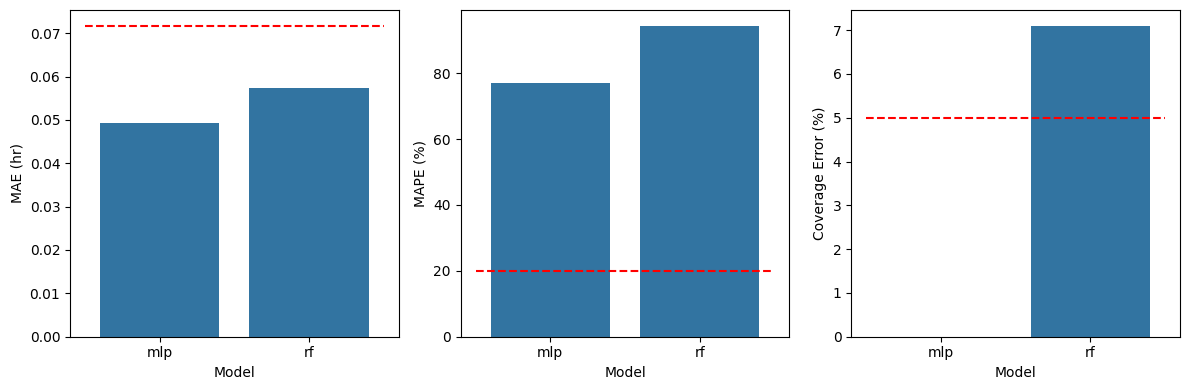

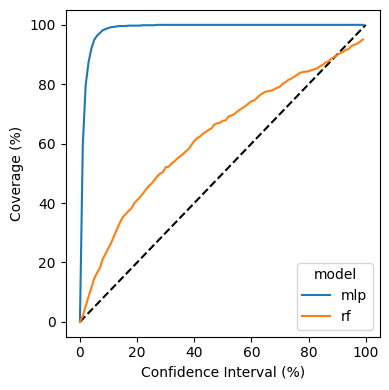

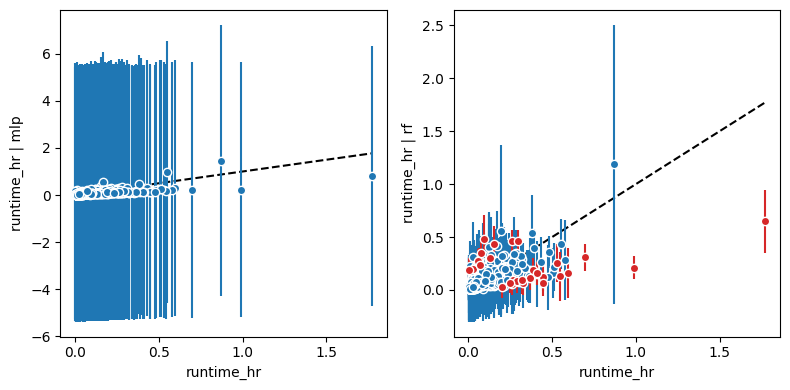

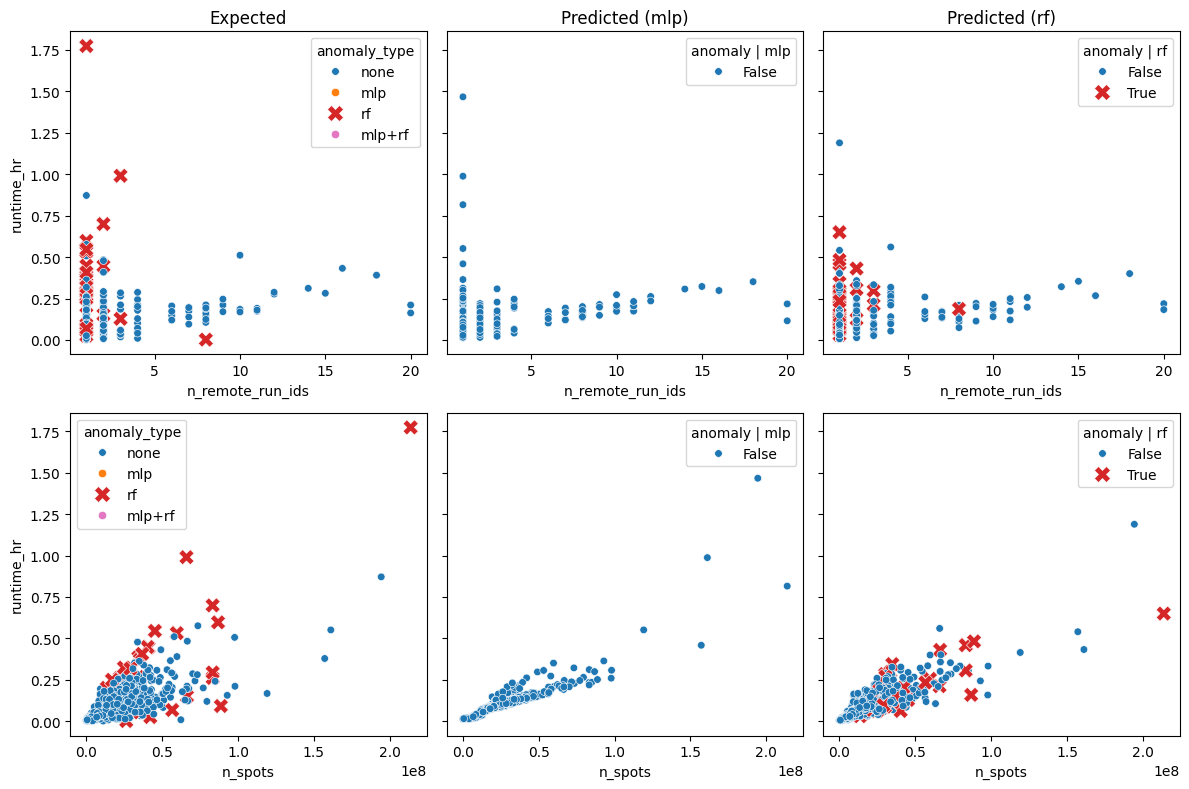


gemmaker download_runs disk_GB


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:77: FutureWarning: 

The `ci` parameter is deprecated.

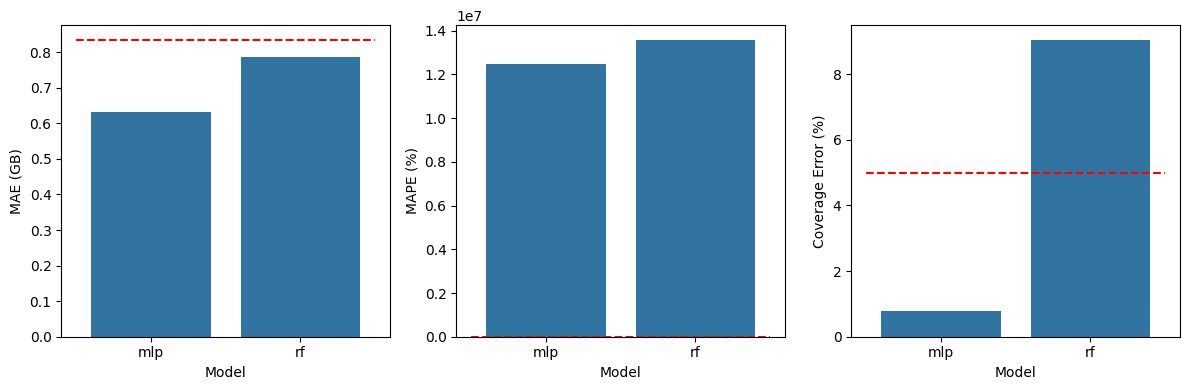

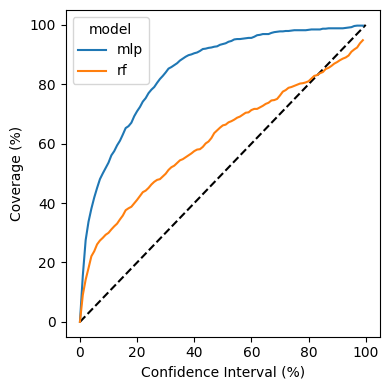

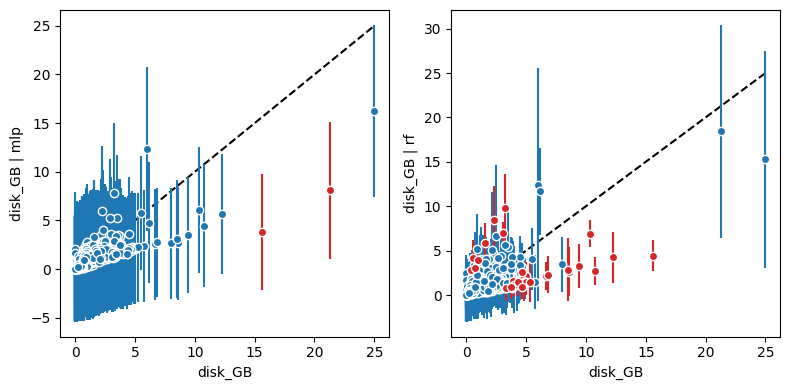

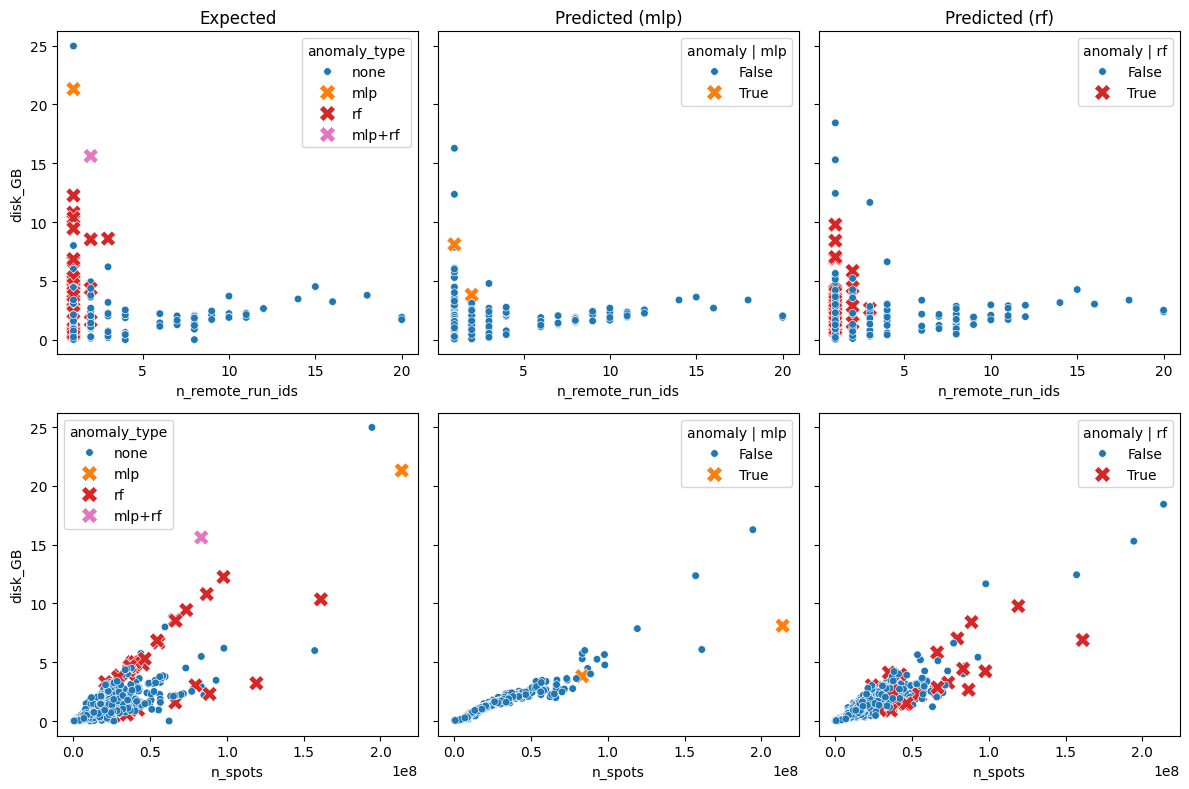


gemmaker fastq_dump runtime_hr


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
 

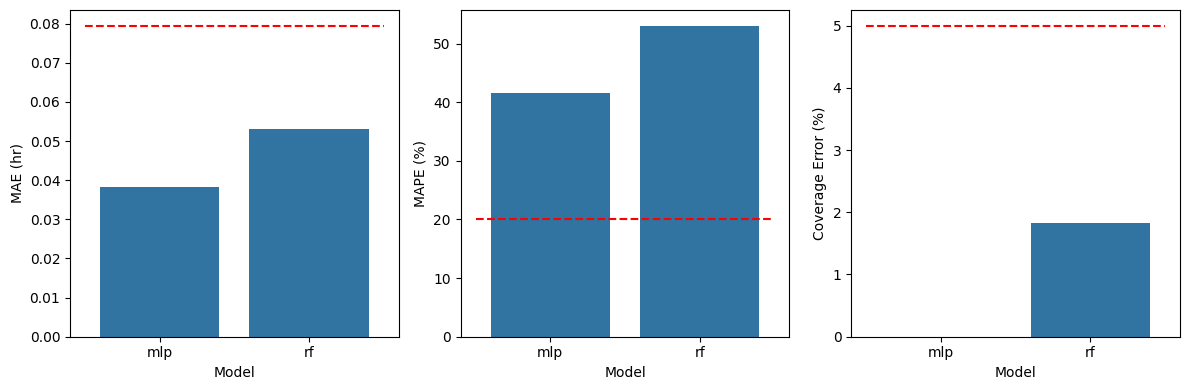

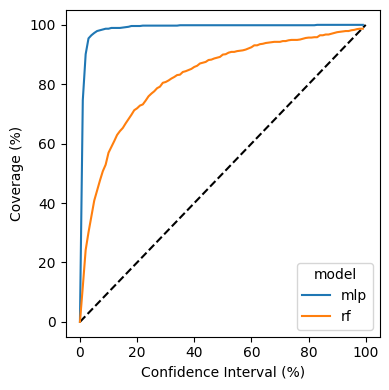

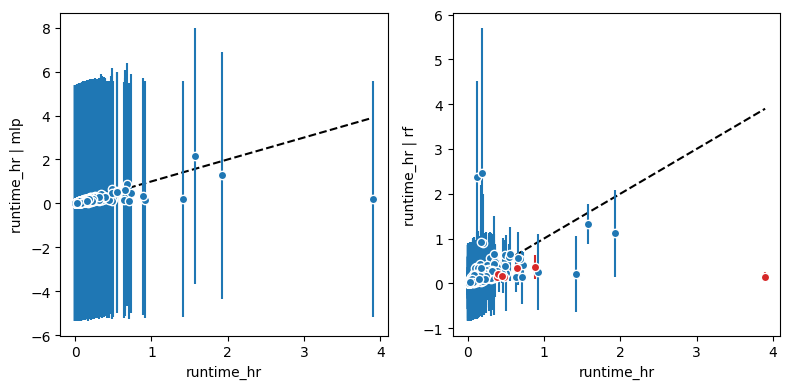

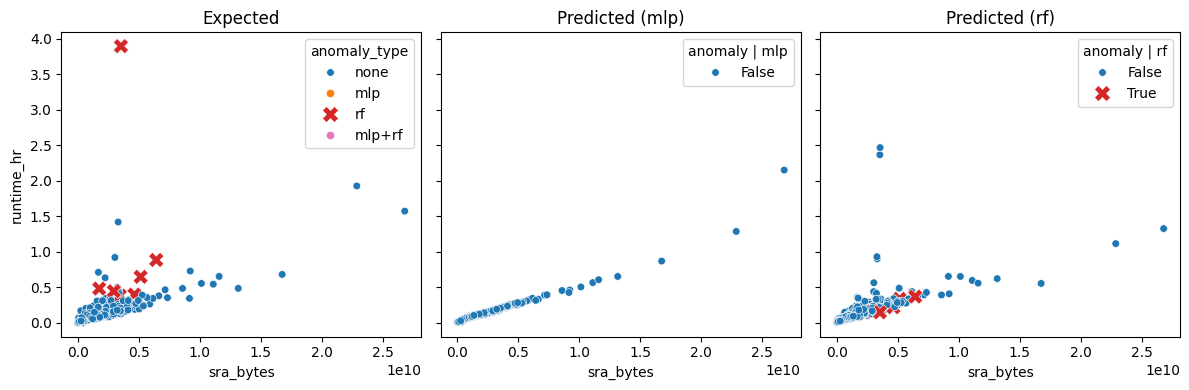


gemmaker fastq_dump disk_GB


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:77: FutureWarning: 

The `ci` parameter is deprecated.

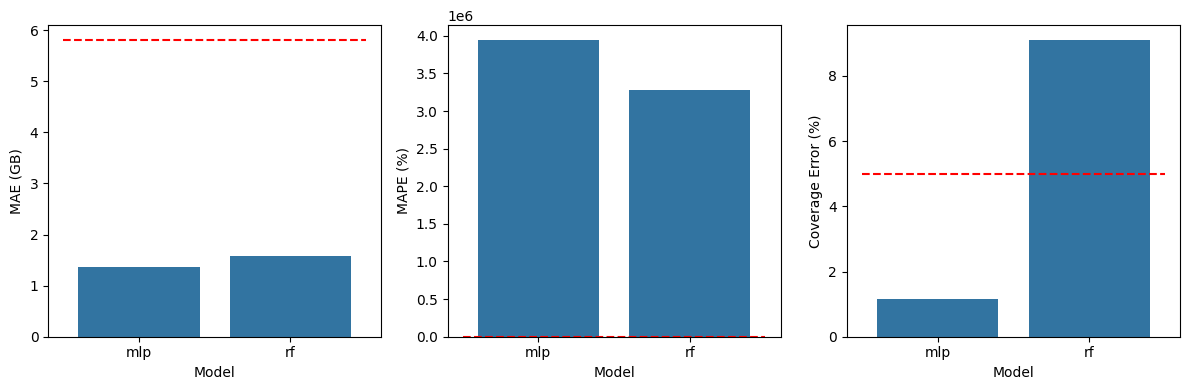

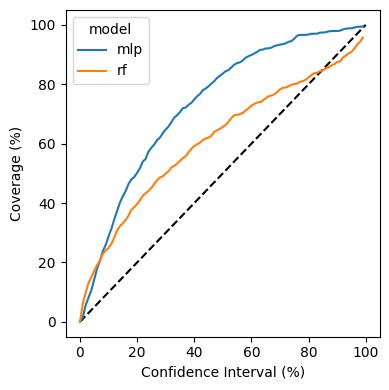

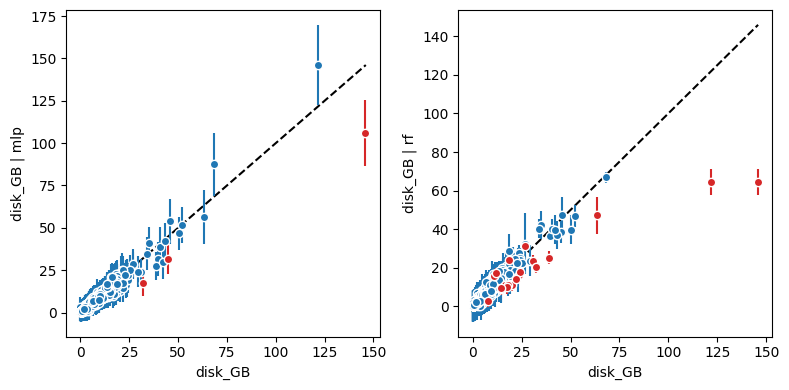

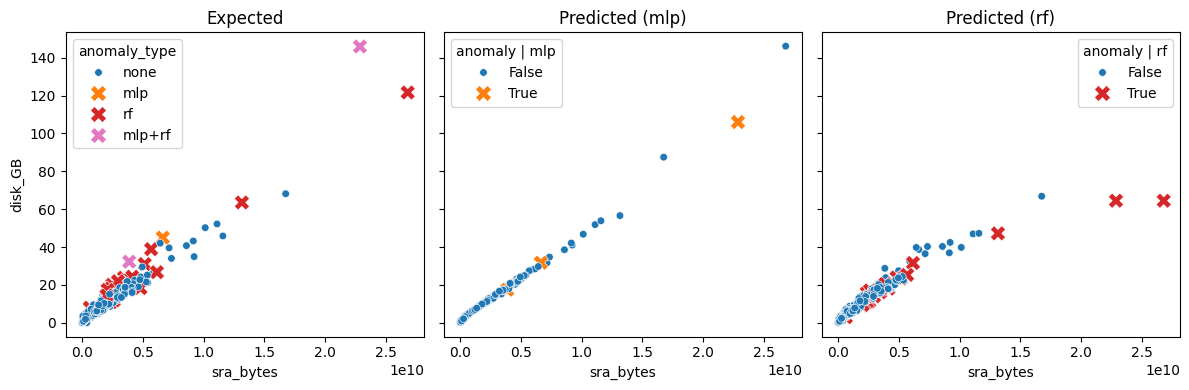


gemmaker fastq_merge runtime_hr


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_et

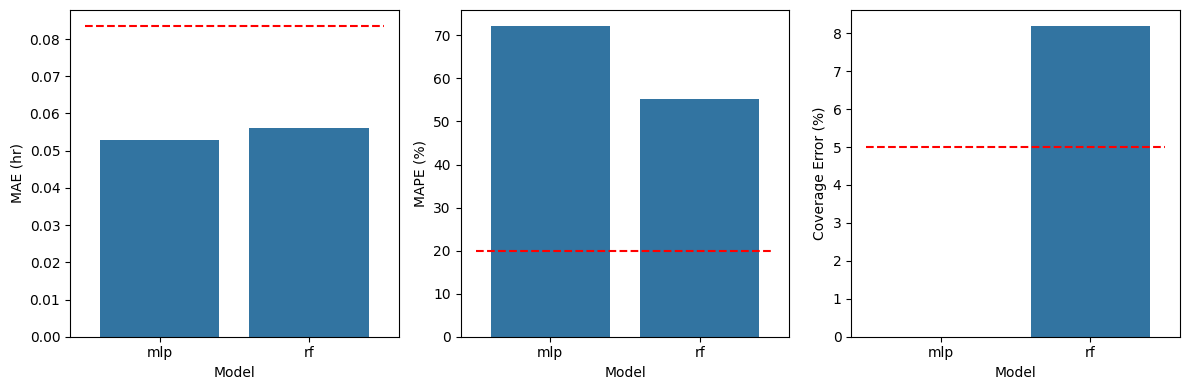

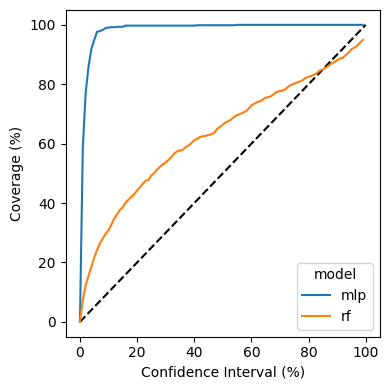

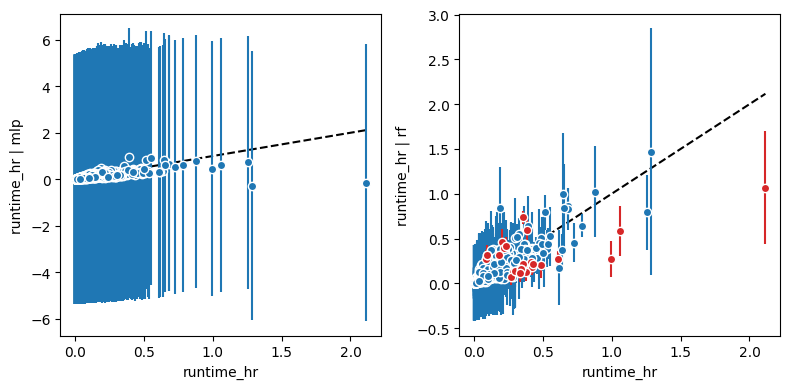

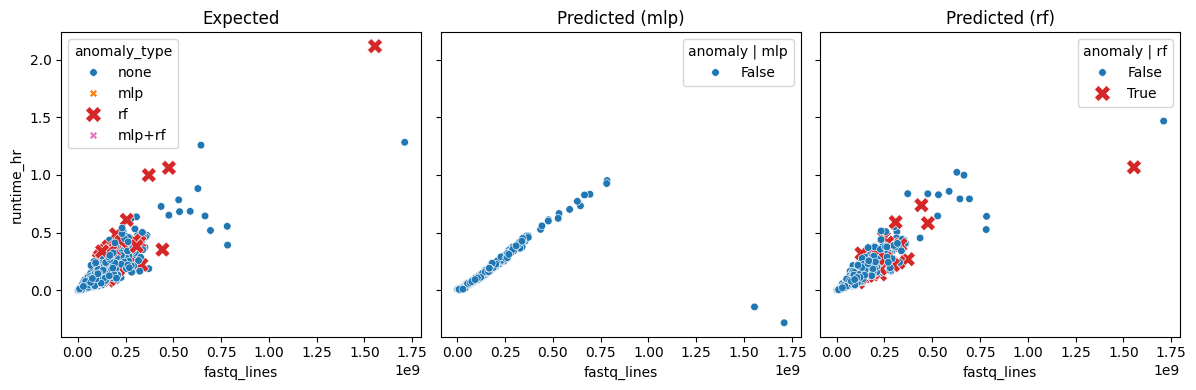


gemmaker fastq_merge disk_GB


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_et

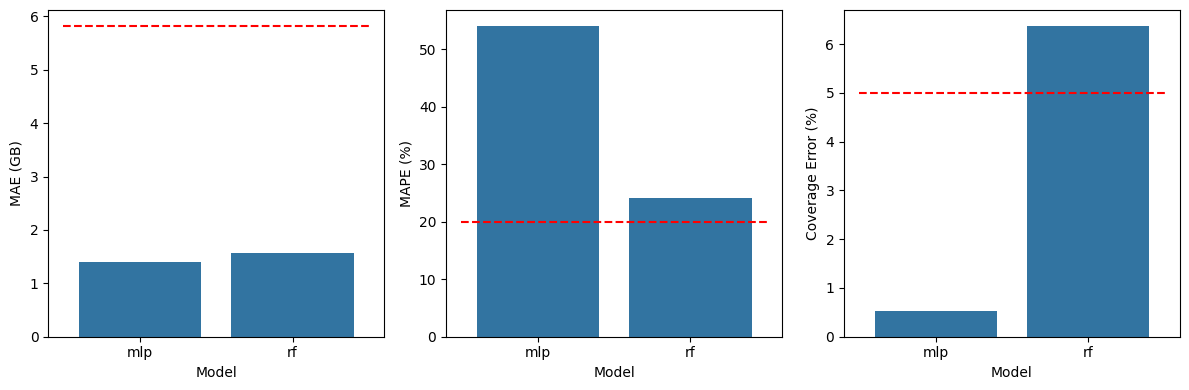

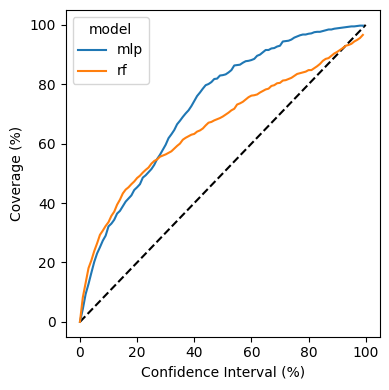

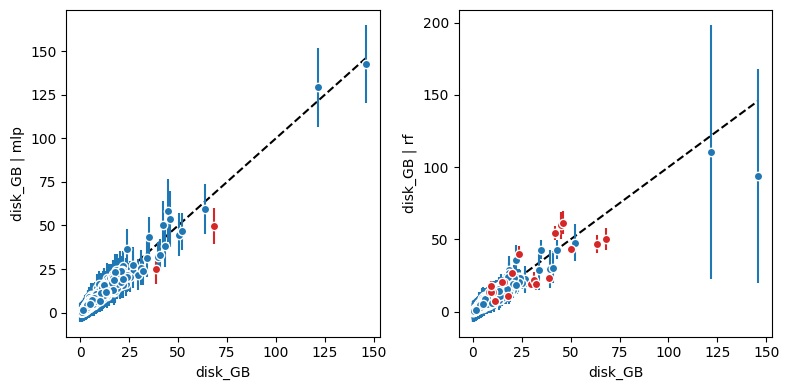

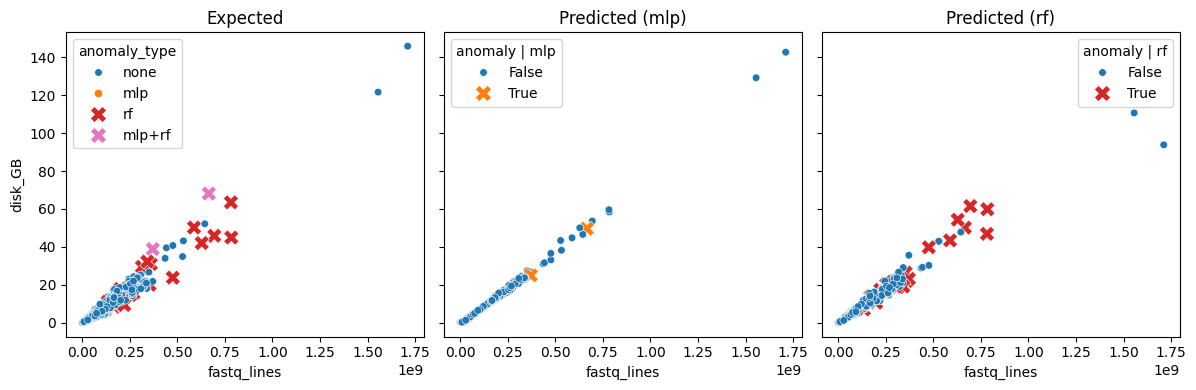


gemmaker fastqc_1 runtime_hr


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplo

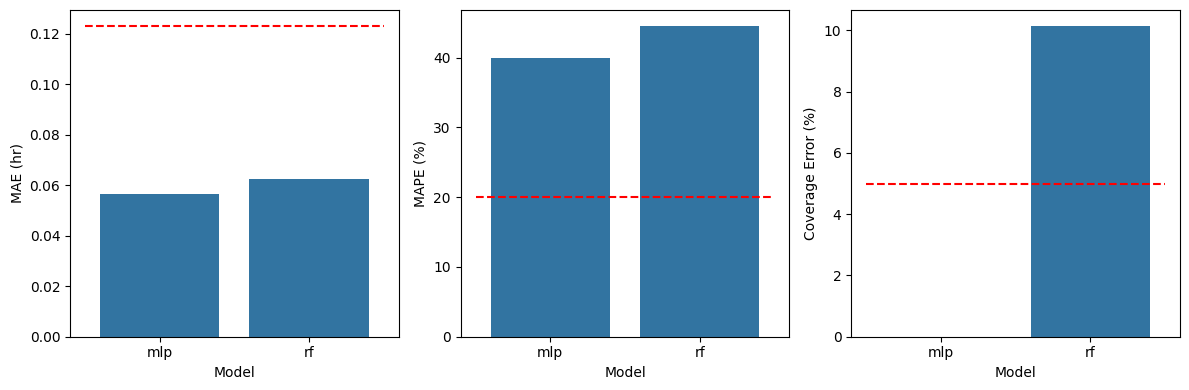

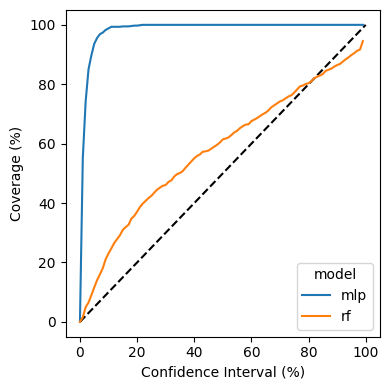

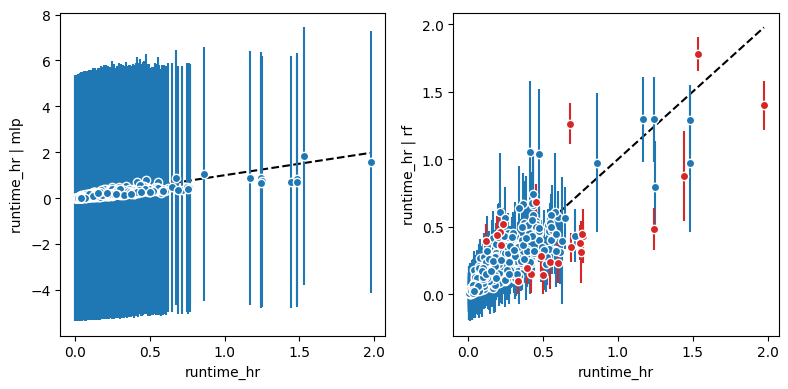

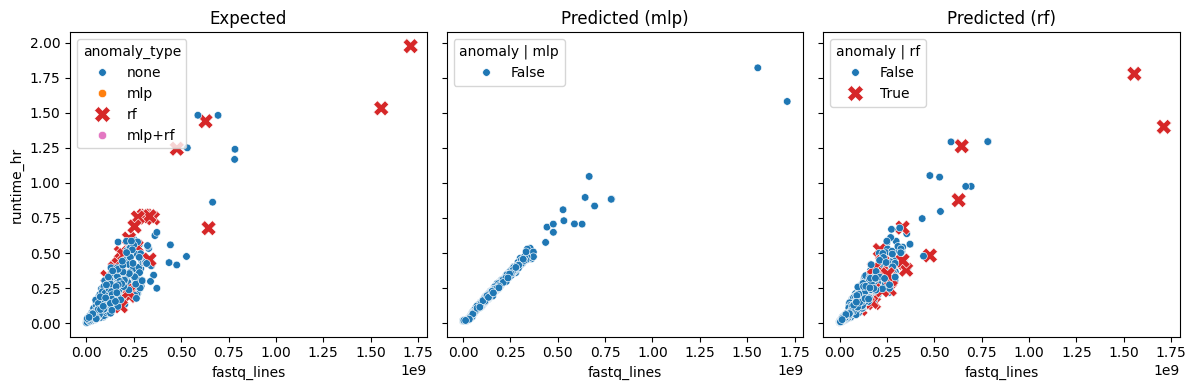


gene-oracle phase1_fg runtime_hr


/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


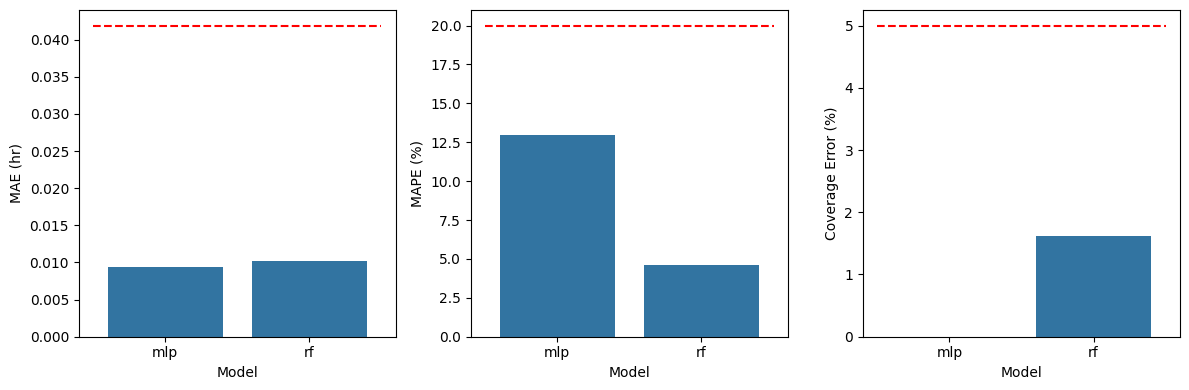

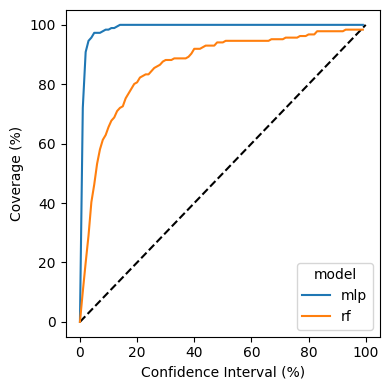

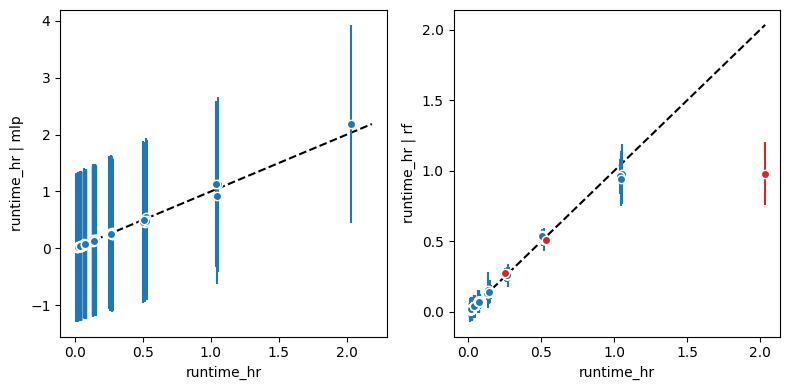

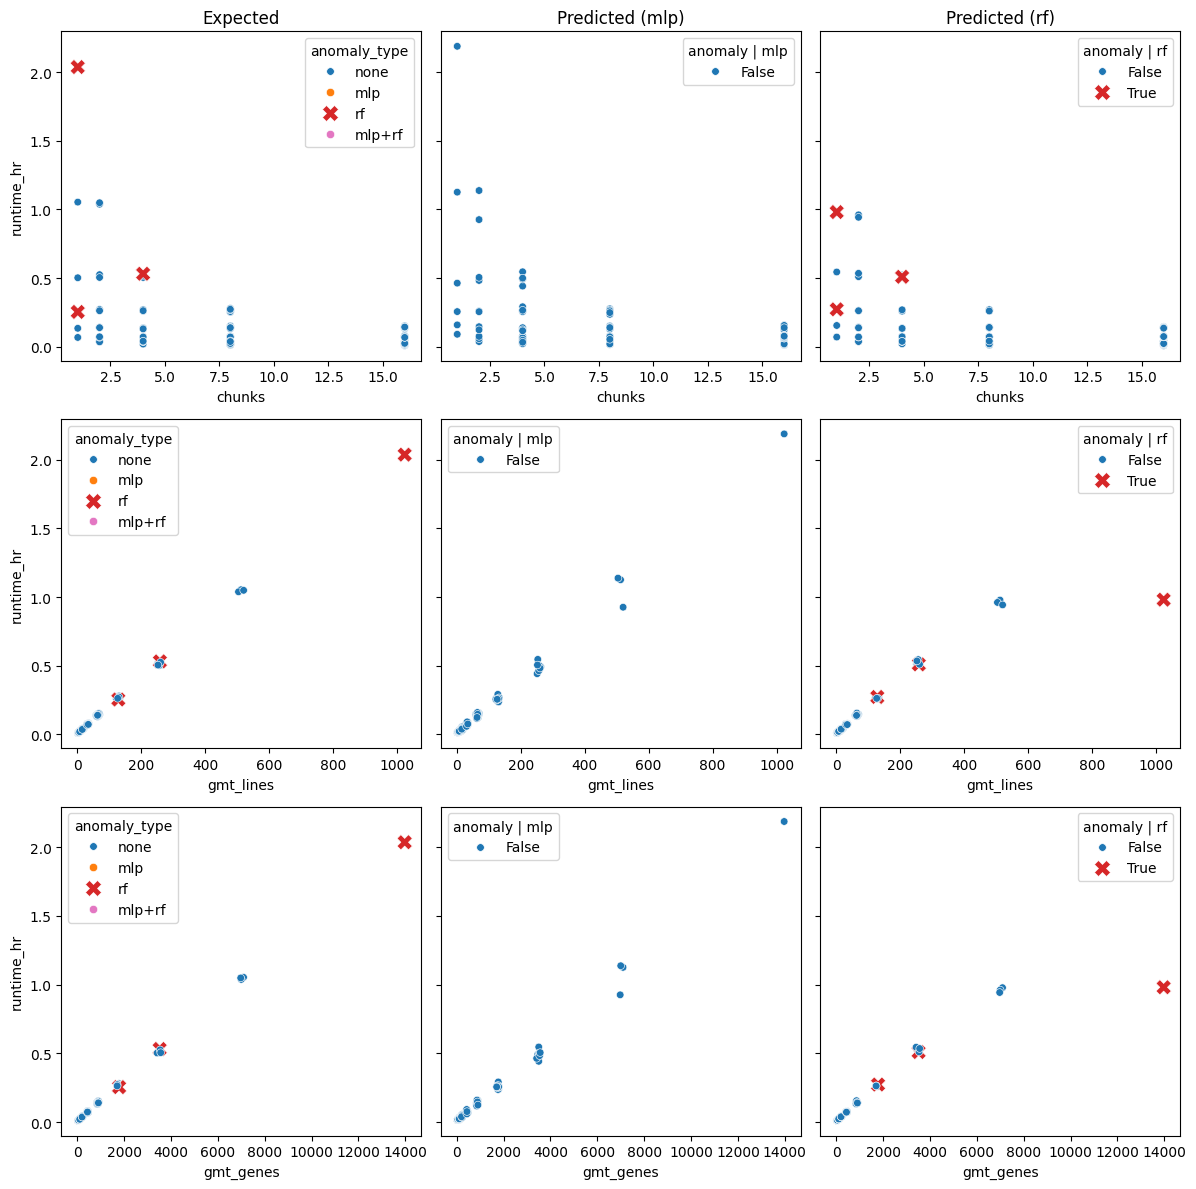


hemelb hemelb runtime_hr


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow enco

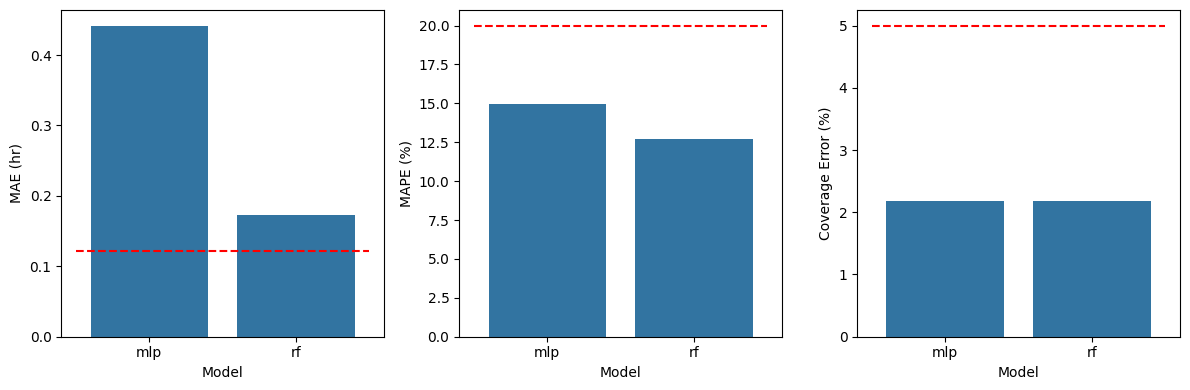

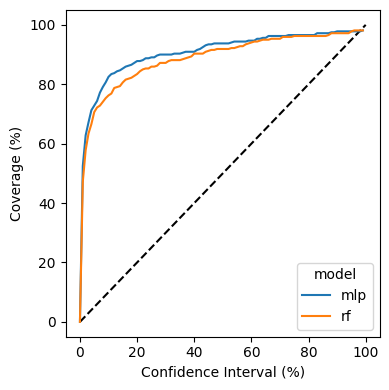

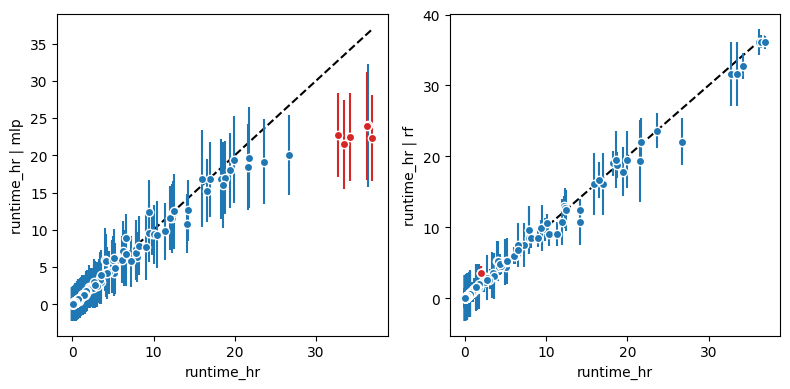

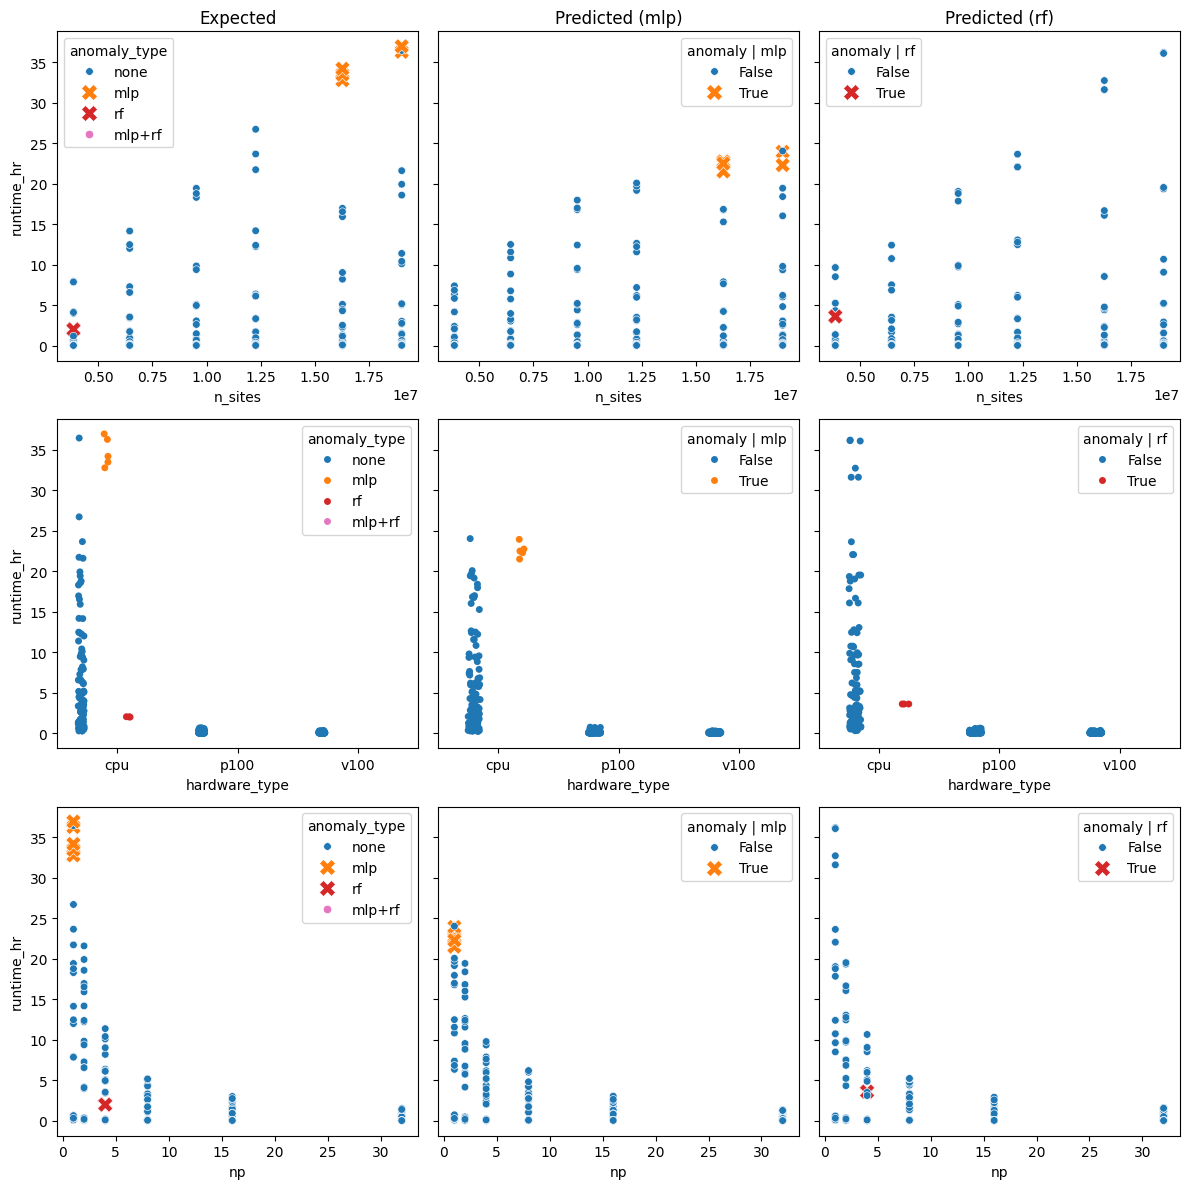


hemelb hemelb memory_GB


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:77: FutureWarning: 

The `ci` param

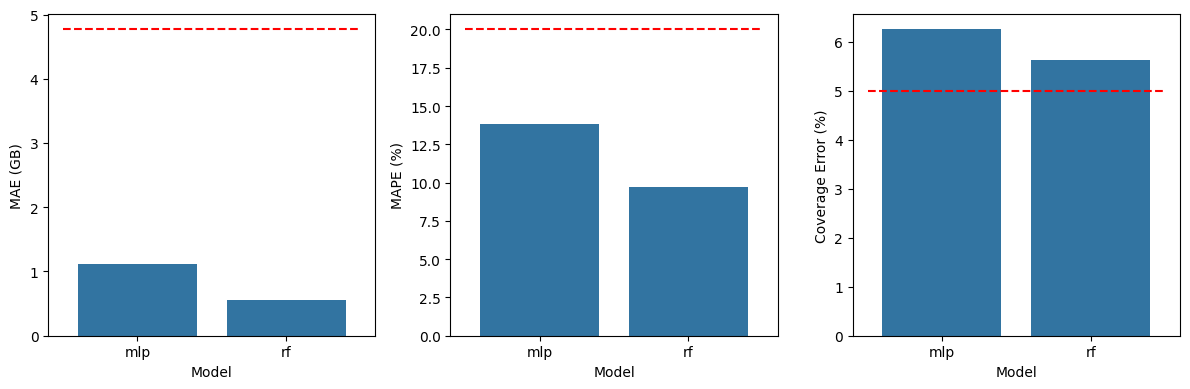

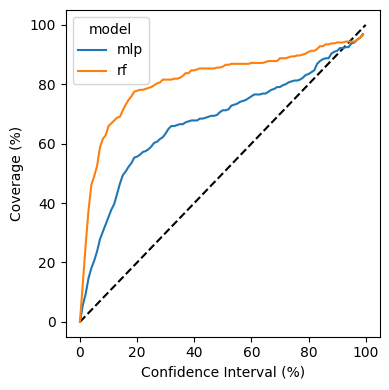

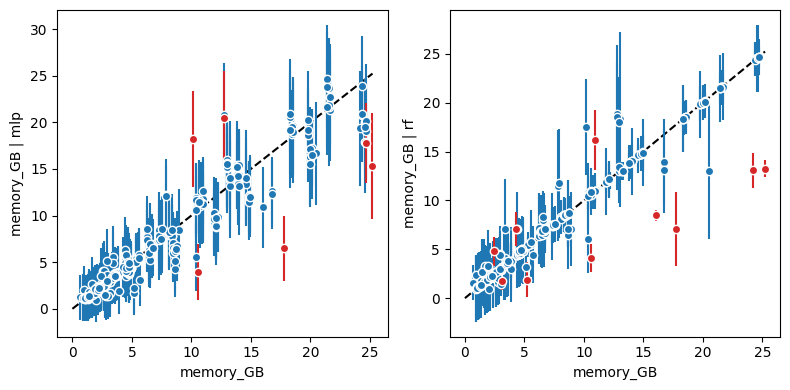

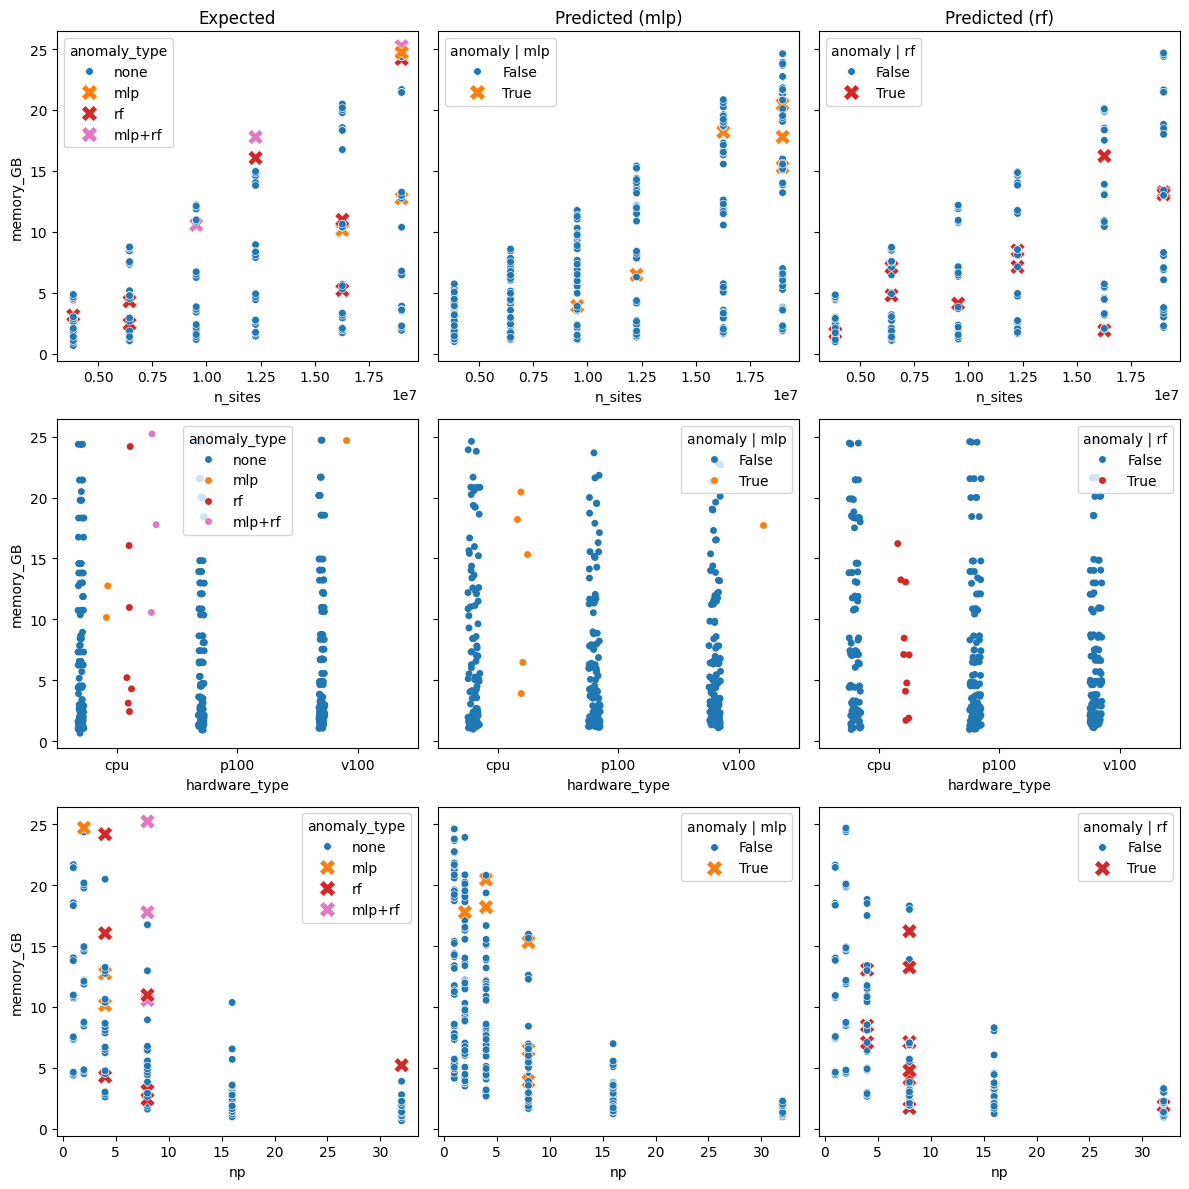


kinc similarity_chunk memory_GB


/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


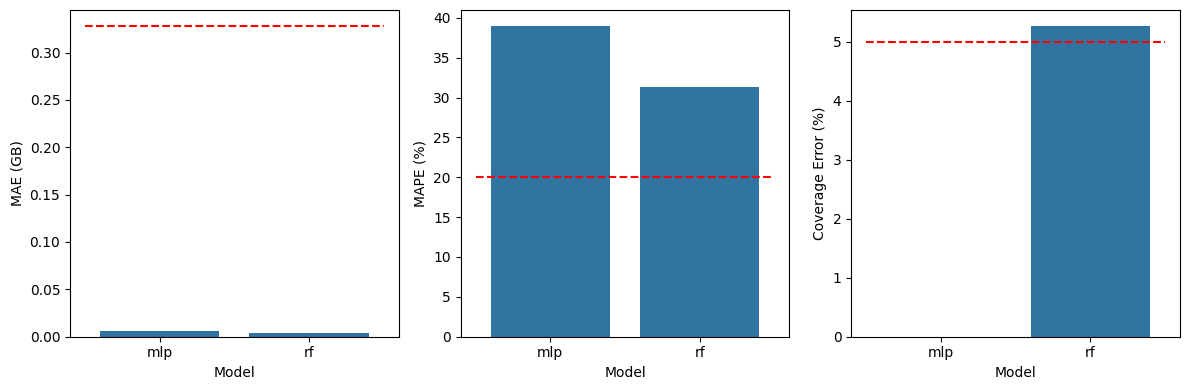

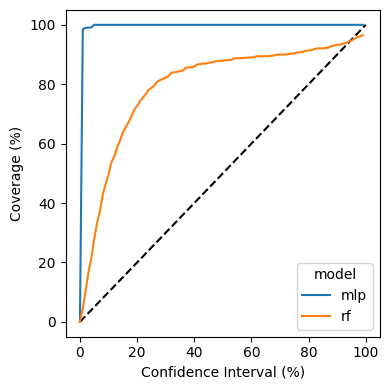

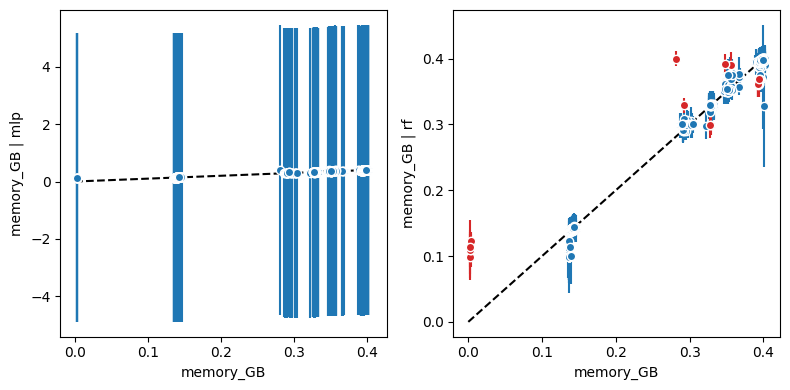

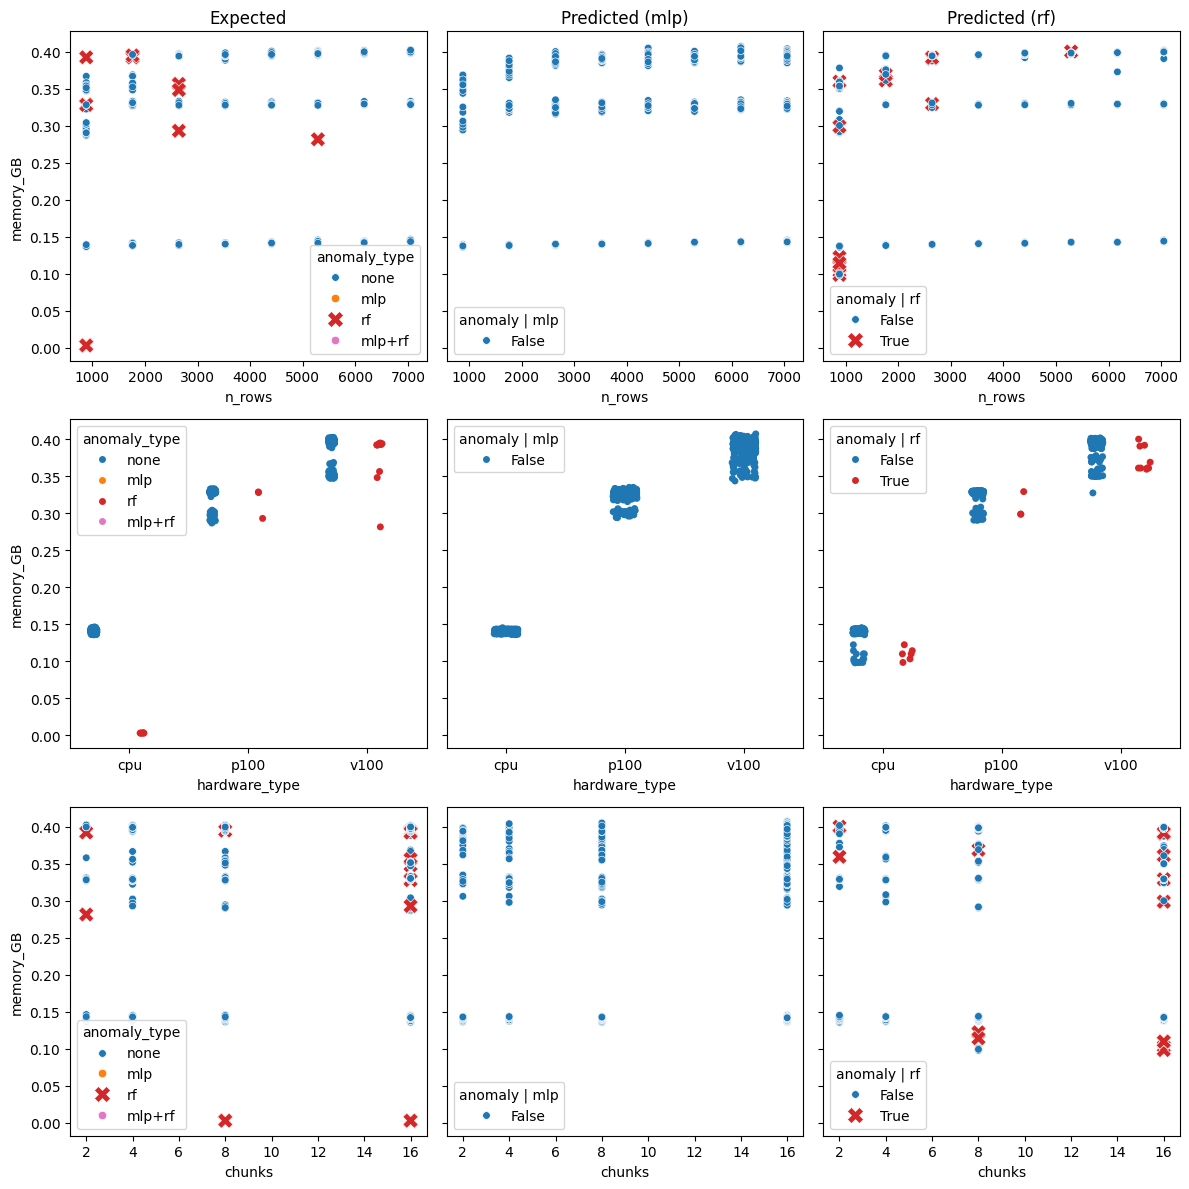


kinc similarity_mpi runtime_hr


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same ef

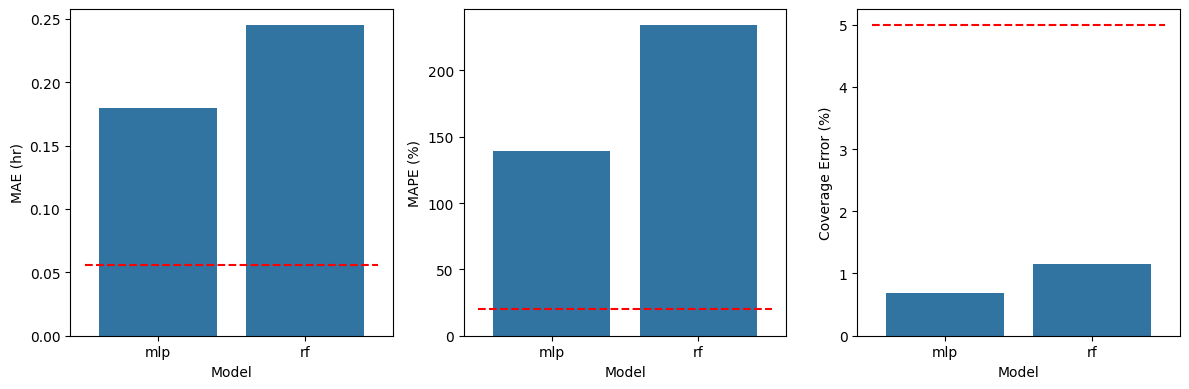

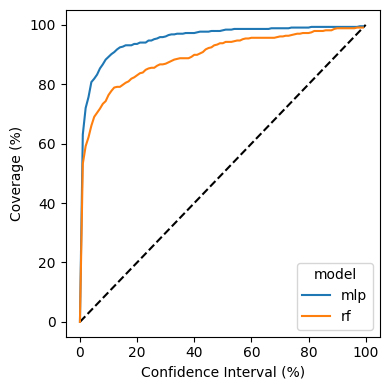

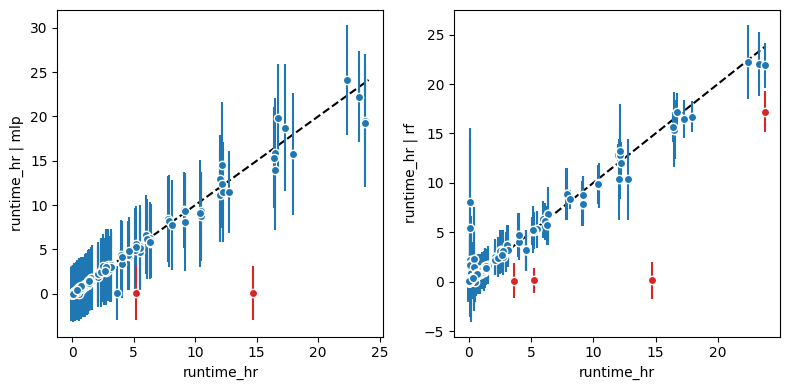

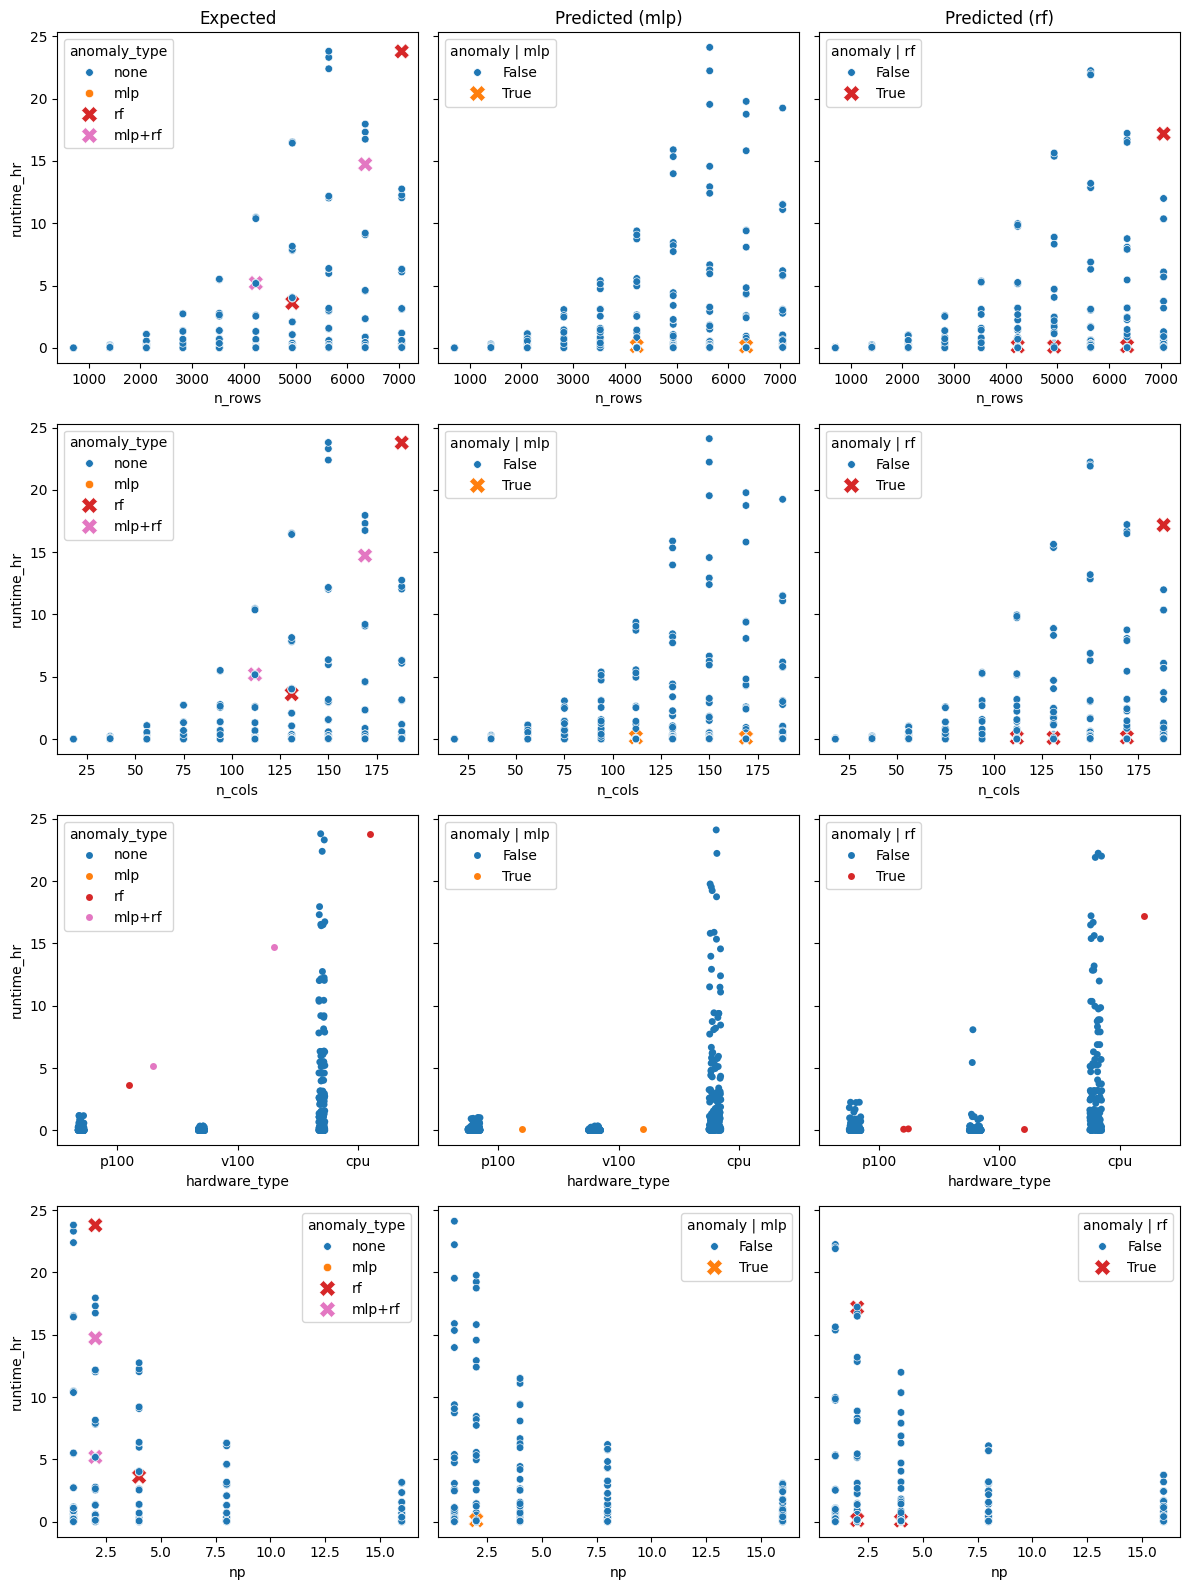


kinc similarity_mpi memory_GB


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduc

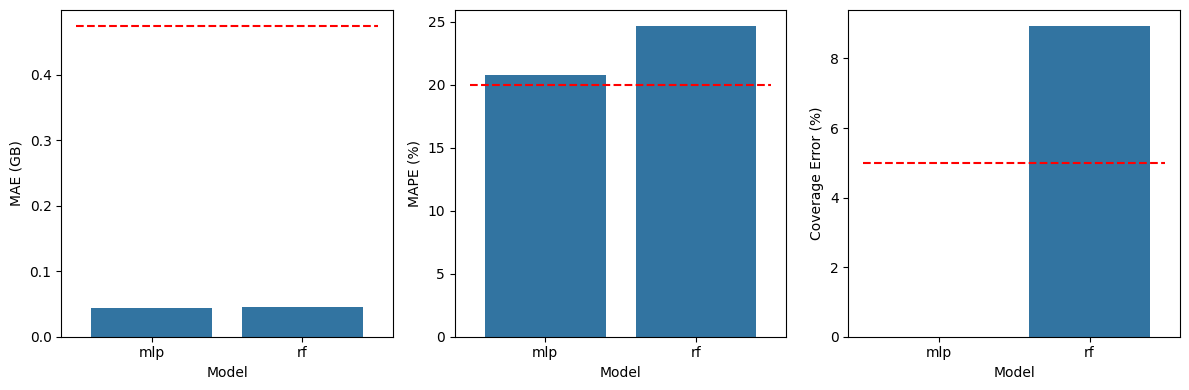

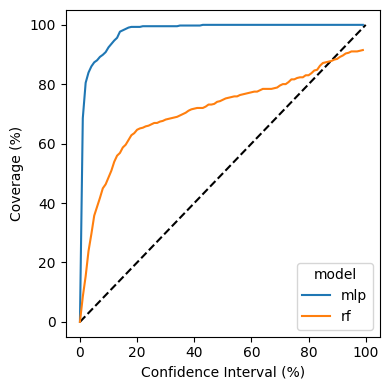

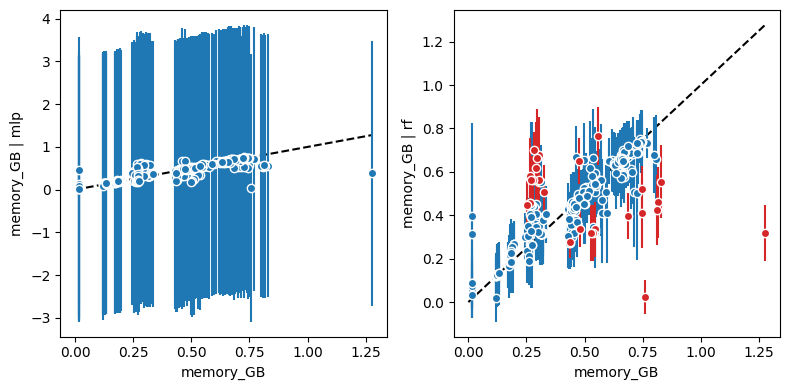

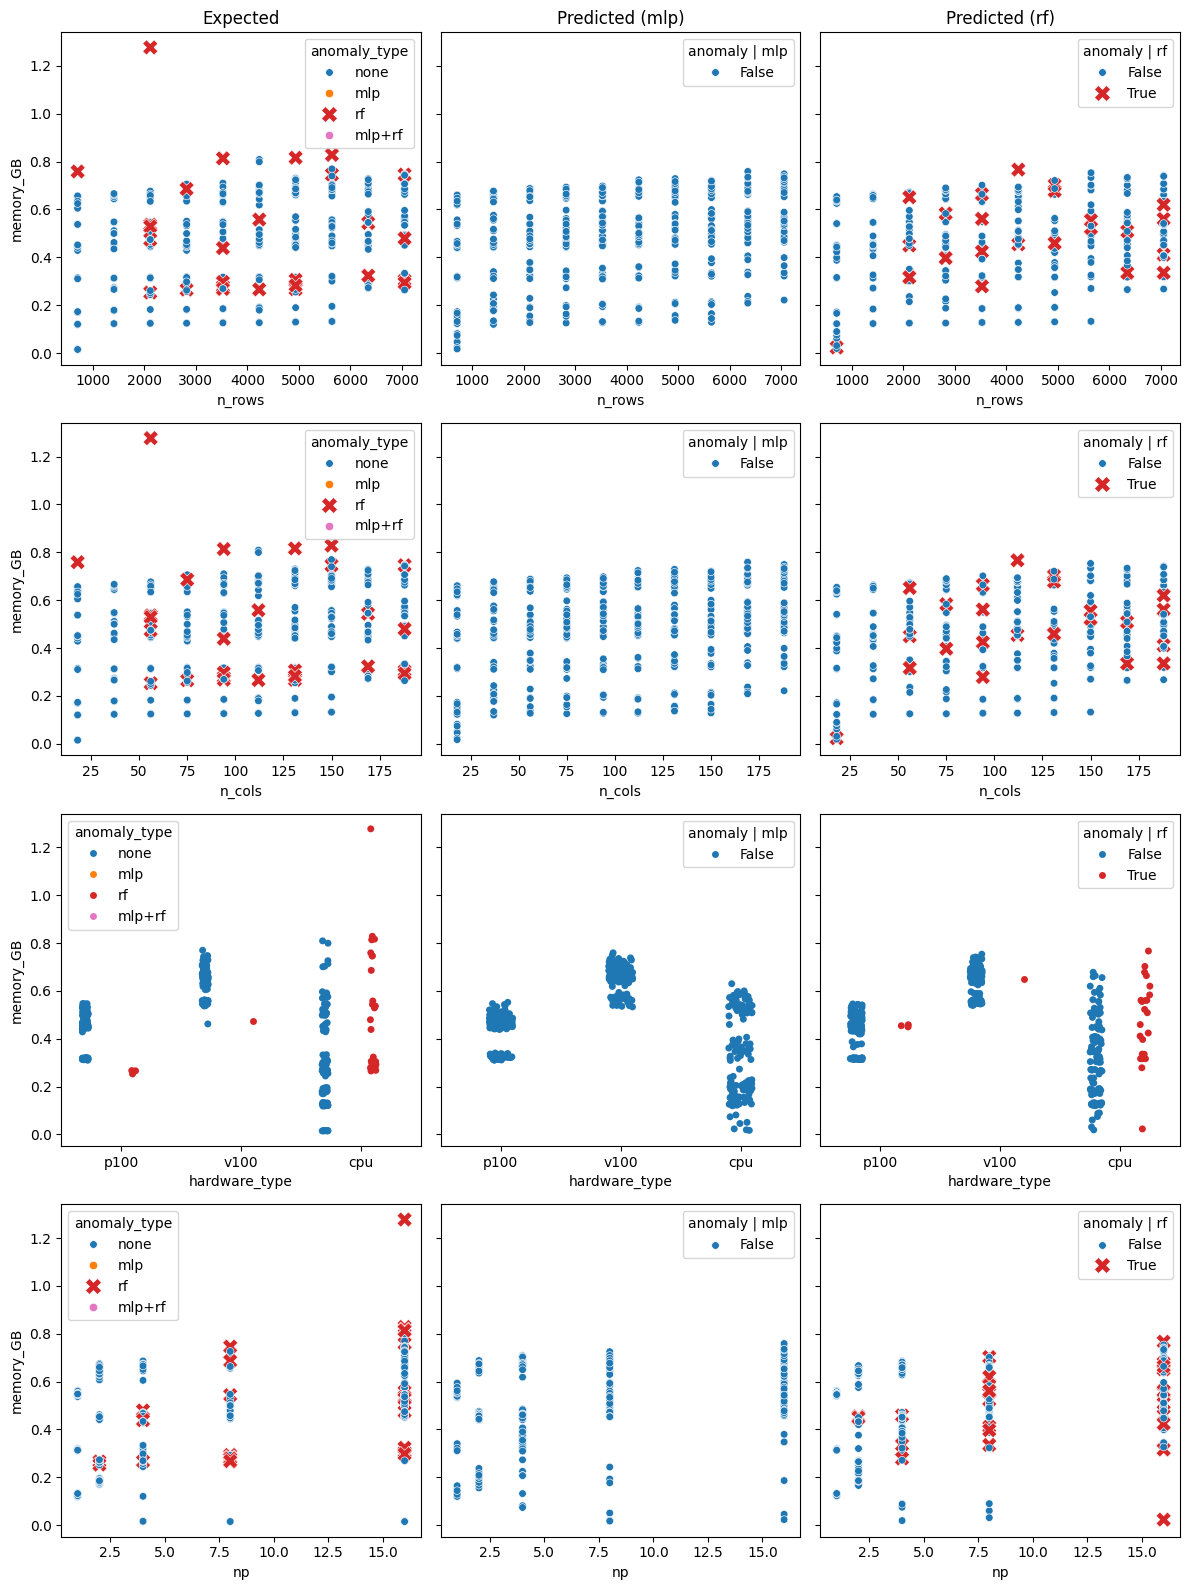


kinc extract runtime_hr
No calibration with n_samples <= 20:  consider using more n_estimators in your model,  for more accurate ci and to avoid negative values.
No calibration with n_samples <= 20:  consider using more n_estimators in your model,  for more accurate ci and to avoid negative values.
No calibration with n_samples <= 20:  consider using more n_estimators in your model,  for more accurate ci and to avoid negative values.
No calibration with n_samples <= 20:  consider using more n_estimators in your model,  for more accurate ci and to avoid negative values.
No calibration with n_samples <= 20:  consider using more n_estimators in your model,  for more accurate ci and to avoid negative values.


/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
/tmp/ipykernel_49495/1778069790.py:83: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')


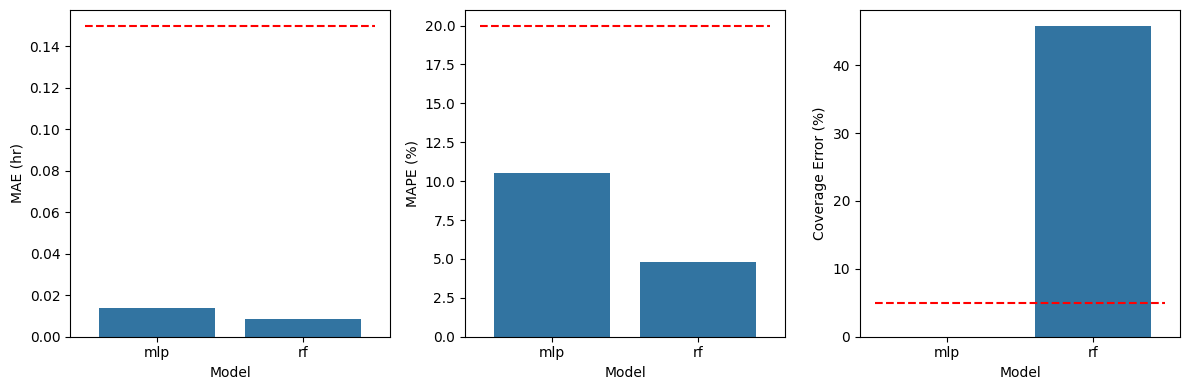

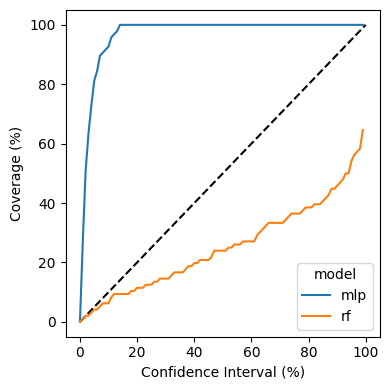

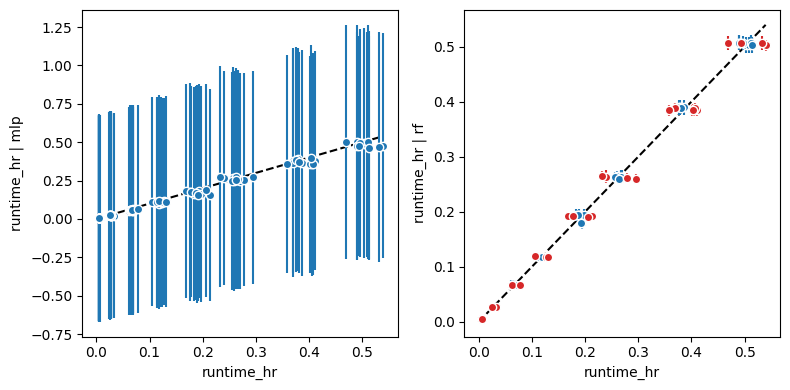

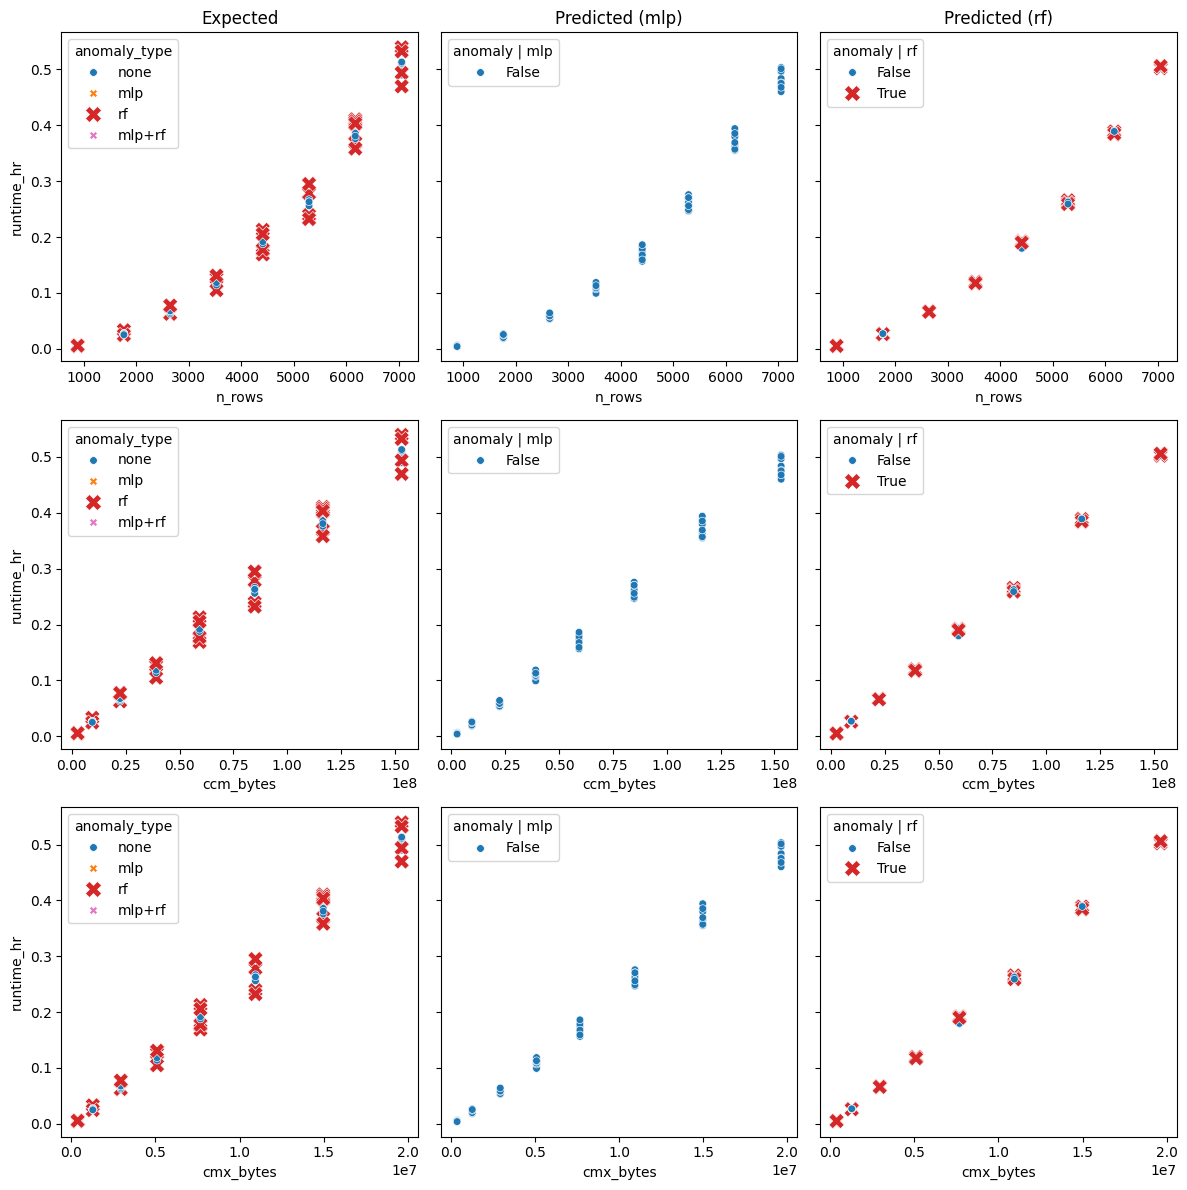


tspg train_target memory_GB


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_et

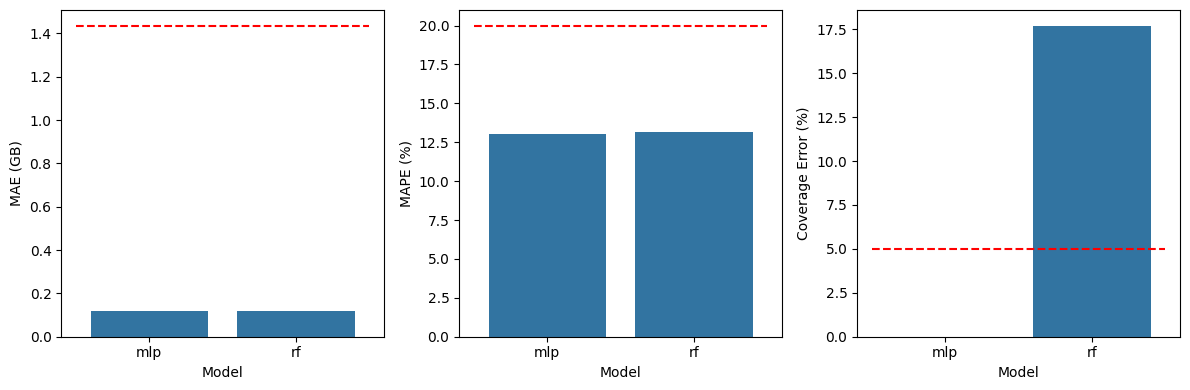

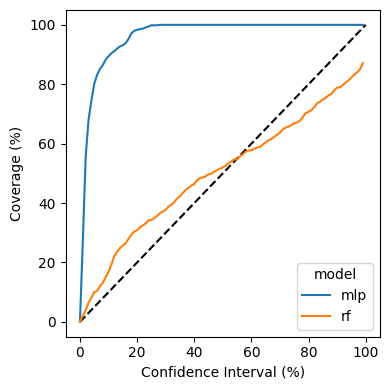

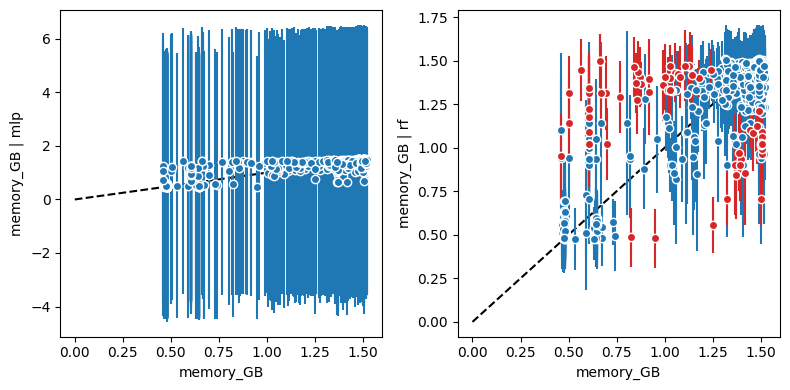

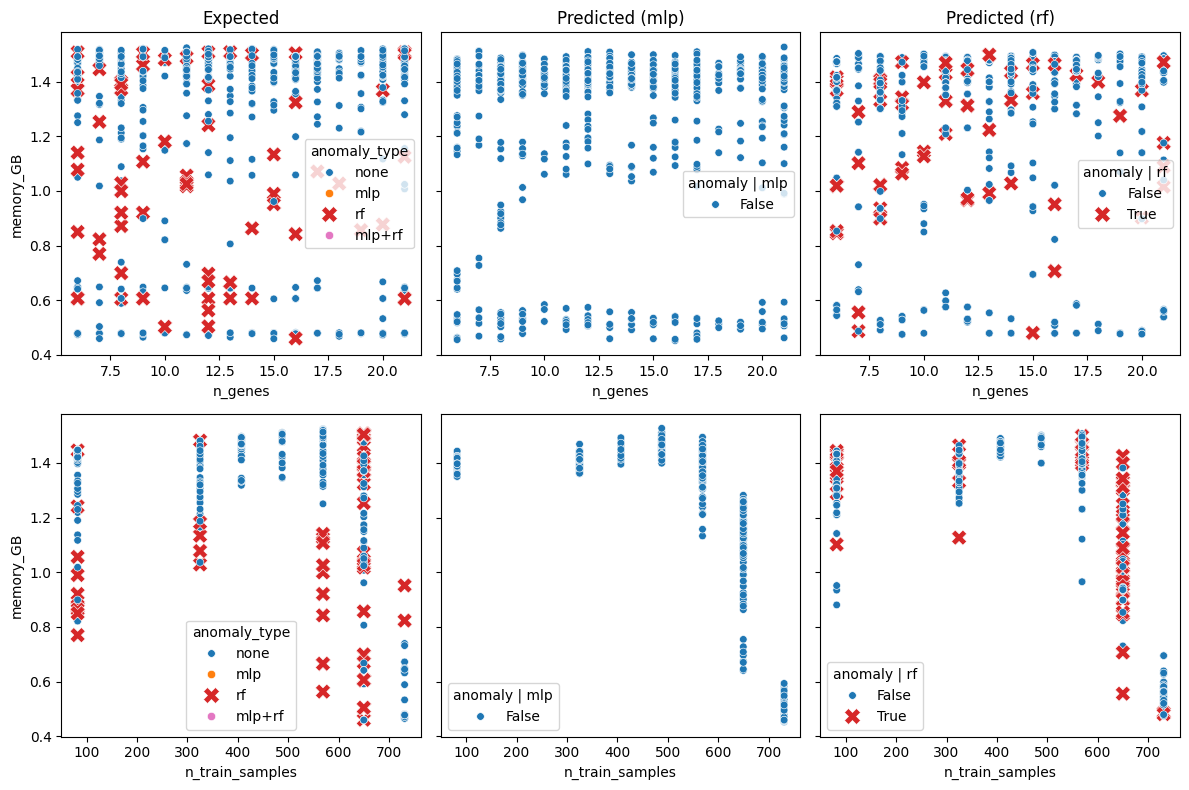


tspg perturb memory_GB


/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/olga/envs/general/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_49495/1778069790.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same ef

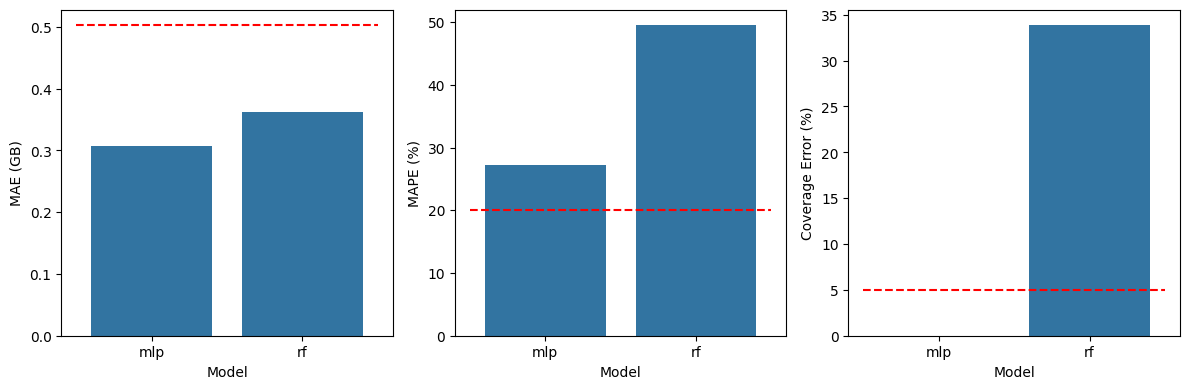

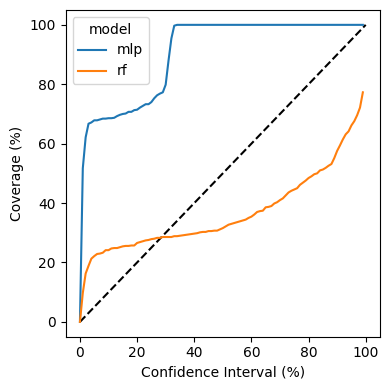

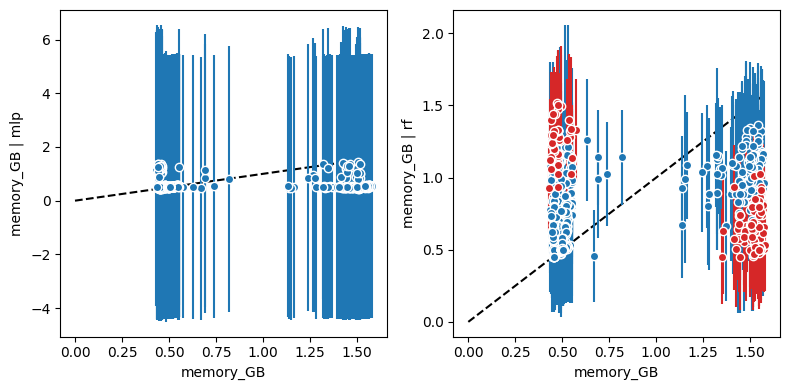

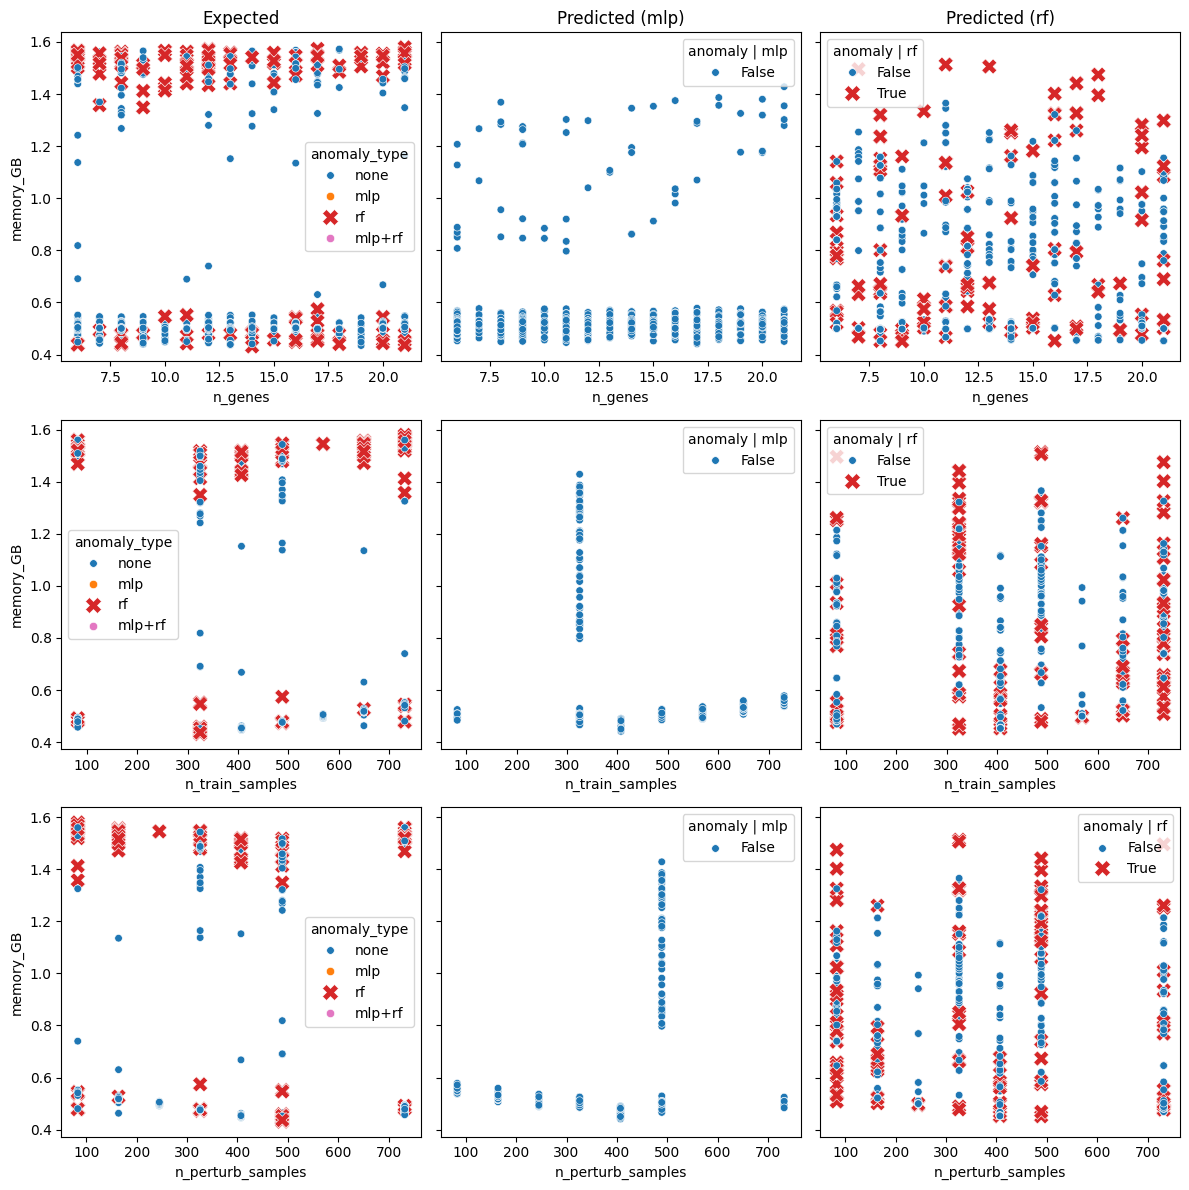

In [19]:
df_results = []

for pipeline, process_name, target in targets_incl:
    print()
    print(pipeline, process_name, target)

    # get performance data for pipeline / process
    df = data_map[pipeline][process_name]
    inputs = config_map[pipeline]['train_inputs'][process_name]

    # remove inputs that have constant value
    inputs = [c for c in inputs if df[c].nunique() > 1]

    # skip if there are no input features
    if len(inputs) == 0:
        print('no input features, skipping')
        continue

    # compute summary statistics
    row = {
        'pipeline': pipeline,
        'process': process_name,
        'target': target,
        'median': df[target].median()
    }

    # extract performance dataset
    X, y, columns, _ = create_dataset(df, inputs, target)

    # define models
    models = [
        ('mlp', create_mlp(X.shape[1], intervals=True)),
        ('rf', create_rf(intervals=True)),
    ]

    # prepend scaler to each model
    models = [(name, create_pipeline(model)) for name, model in models]

    # evaluate each model on dataset
    df_scores = []
    y_preds = {}

    for name, model in models:
        # evaluate model
        scores, y_bar, y_std = evaluate_cv(model, X, y)

        # save metrics for results dataframe
        row['%s | mae' % (name)] = scores['mae']
        row['%s | mpe' % (name)] = scores['mpe']
        row['%s | cov' % (name)] = scores['cov']

        # save metrics for plots
        df_scores.append({
            'name': name,
            'mae': scores['mae'],
            'mpe': scores['mpe'],
            'cov': scores['cov']
        })

        # save predictions for plots
        y_preds[name] = y_bar, y_std

    # save results
    df_results.append(row)
    df_scores = pd.DataFrame(df_scores)

    # plot evaluation scores for each model
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    plt.subplot(1, 3, 1)
    sns.barplot(x='name', y='mae', data=df_scores, ci=68, color='tab:blue')
    plt.xlabel('Model')
    plt.ylabel('MAE (%s)' % (UNITS[target]))
    plt.plot(plt.xlim(), [row['median'], row['median']], 'r--')

    plt.subplot(1, 3, 2)
    sns.barplot(x='name', y='mpe', data=df_scores, ci=68, color='tab:blue')
    plt.xlabel('Model')
    plt.ylabel('MAPE (%)')
    plt.plot(plt.xlim(), [20, 20], 'r--')

    plt.subplot(1, 3, 3)
    sns.barplot(x='name', y='cov', data=df_scores, ci=68, color='tab:blue')
    plt.xlabel('Model')
    plt.ylabel('Coverage Error (%)')
    plt.plot(plt.xlim(), [5, 5], 'r--')

    plt.tight_layout()
    plt.show()

    # plot coverage profile for each model
    plt.figure(figsize=(4, 4))

    for name, model in models:
        # get model predictions
        y_bar, y_std = y_preds[name]

        # compute coverage profile
        ci_values = np.arange(0.00, 1.00, 0.01)
        cov_values = np.zeros_like(ci_values)

        for i, ci in enumerate(ci_values):
            y_lower, y_upper = predict_intervals(y_bar, y_std, ci=ci)
            cov_values[i] = prediction_interval_coverage(y, y_lower, y_upper)

        # plot coverage profile
        plt.plot(100 * ci_values, 100 * cov_values, label=name)

    plt.plot([0, 100], [0, 100], 'k--', zorder=0)
    plt.legend(title='model')
    plt.xlabel('Confidence Interval (%)')
    plt.ylabel('Coverage (%)')
    plt.tight_layout()
    plt.show()

    # plot expected vs predicted target values for each model
    fig, axes = plt.subplots(1, len(models), figsize=(4 * len(models), 4))

    for (name, model), ax in zip(models, axes):
        # get model predictions
        y_bar, y_std = y_preds[name]
        y_lower, y_upper = predict_intervals(y_bar, y_std)

        # save model predictions
        target_pred = '%s | %s' % (target, name)
        df[target_pred] = y_bar

        # save anomaly mask
        anomaly_pred = 'anomaly | %s' % (name)
        y_anomaly = anomaly_score(y, y_bar, y_std)
        df[anomaly_pred] = (np.abs(y_anomaly) > 0.997)

        # compute error bars
        yerr = np.stack([
            y_bar - y_lower,
            y_upper - y_bar
        ])

        # create scatterplot
        mask = ~df[anomaly_pred]
        ax.errorbar(
            x=target,
            y=target_pred,
            yerr=yerr[:, mask],
            data=df[mask],
            ecolor='tab:blue', c='tab:blue', ls='', marker='o', mec='w')

        mask = df[anomaly_pred]
        ax.errorbar(
            x=target,
            y=target_pred,
            yerr=yerr[:, mask],
            data=df[mask],
            ecolor='tab:red', c='tab:red', ls='', marker='o', mec='w')

        vmax = max(df[target].max(), df[target_pred].max())
        ax.plot([0, vmax], [0, vmax], 'k--', zorder=0)
        ax.set_xlabel(target)
        ax.set_ylabel(target_pred)

    plt.tight_layout()
    plt.savefig('%s-%s-%s-scatter.pdf' % (pipeline, process_name, target))
    plt.savefig('%s-%s-%s-scatter.png' % (pipeline, process_name, target))
    plt.show()

    # categorize anomalies
    df['anomaly'] = df['anomaly | mlp'] | df['anomaly | rf']
    df['anomaly_type'] = 'none'
    df.loc[ df['anomaly | mlp'] & ~df['anomaly | rf'], 'anomaly_type'] = 'mlp'
    df.loc[~df['anomaly | mlp'] &  df['anomaly | rf'], 'anomaly_type'] = 'rf'
    df.loc[ df['anomaly | mlp'] &  df['anomaly | rf'], 'anomaly_type'] = 'mlp+rf'

    # plot side-by-side of each input feature
    x_axes = inputs
    y_axes = [target] + ['%s | %s' % (target, name) for name, model in models]
    titles = ['Expected'] + ['Predicted (%s)' % (name) for name, model in models]
    data = df

    fig, axes = plt.subplots(
        len(x_axes), len(y_axes),
        figsize=(4 * len(y_axes), 4 * len(x_axes)),
        squeeze=False,
        sharey='row')

    for i, x in enumerate(x_axes):
        for j, y in enumerate(y_axes):
            ax = axes[i][j]

            if j == 0:
                hue = 'anomaly_type'
                hue_order = ['none', 'mlp', 'rf', 'mlp+rf']
                sizes = {'none': 30, 'mlp': 120, 'rf': 120, 'mlp+rf': 120}
                markers = {'none': 'o', 'mlp': 'X', 'rf': 'X', 'mlp+rf': 'X'}
                palette = {'none': 'tab:blue', 'mlp': 'tab:orange', 'rf': 'tab:red', 'mlp+rf': 'tab:pink'}
            elif j == 1:
                hue = 'anomaly | mlp'
                hue_order = None
                sizes = {False: 30, True: 120}
                markers = {False: 'o', True: 'X'}
                palette = {False: 'tab:blue', True: 'tab:orange'}
            elif j == 2:
                hue = 'anomaly | rf'
                hue_order = None
                sizes = {False: 30, True: 120}
                markers = {False: 'o', True: 'X'}
                palette = {False: 'tab:blue', True: 'tab:red'}

            if is_categorical(data, x):
                sns.stripplot(x=x, y=y, hue=hue, hue_order=hue_order, data=data, dodge=True, palette=palette, ax=ax)
            else:
                sns.scatterplot(x=x, y=y, hue=hue, hue_order=hue_order, size=hue, sizes=sizes, style=hue, markers=markers, data=data, palette=palette, ax=ax)

            if i == 0 and titles != None:
                ax.set_title(titles[j])

    plt.tight_layout()
    plt.savefig('%s-%s-%s-marginals.pdf' % (pipeline, process_name, target))
    plt.savefig('%s-%s-%s-marginals.png' % (pipeline, process_name, target))
    plt.show()

# save results to dataframe
df_results = pd.DataFrame(df_results)
df_results.set_index(['pipeline', 'process', 'target'], inplace=True)
df_results.to_csv('01-resource-prediction.csv', sep='\t')

### Evaluate Train/Test Splits


gemmaker download_runs runtime_hr
0.1
0.1
0.1
0.2
0.2
0.2
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.4
0.4
0.4
0.5
0.5
0.5
0.6
0.6
0.6
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.8
0.8
0.8
0.9
0.9
0.9


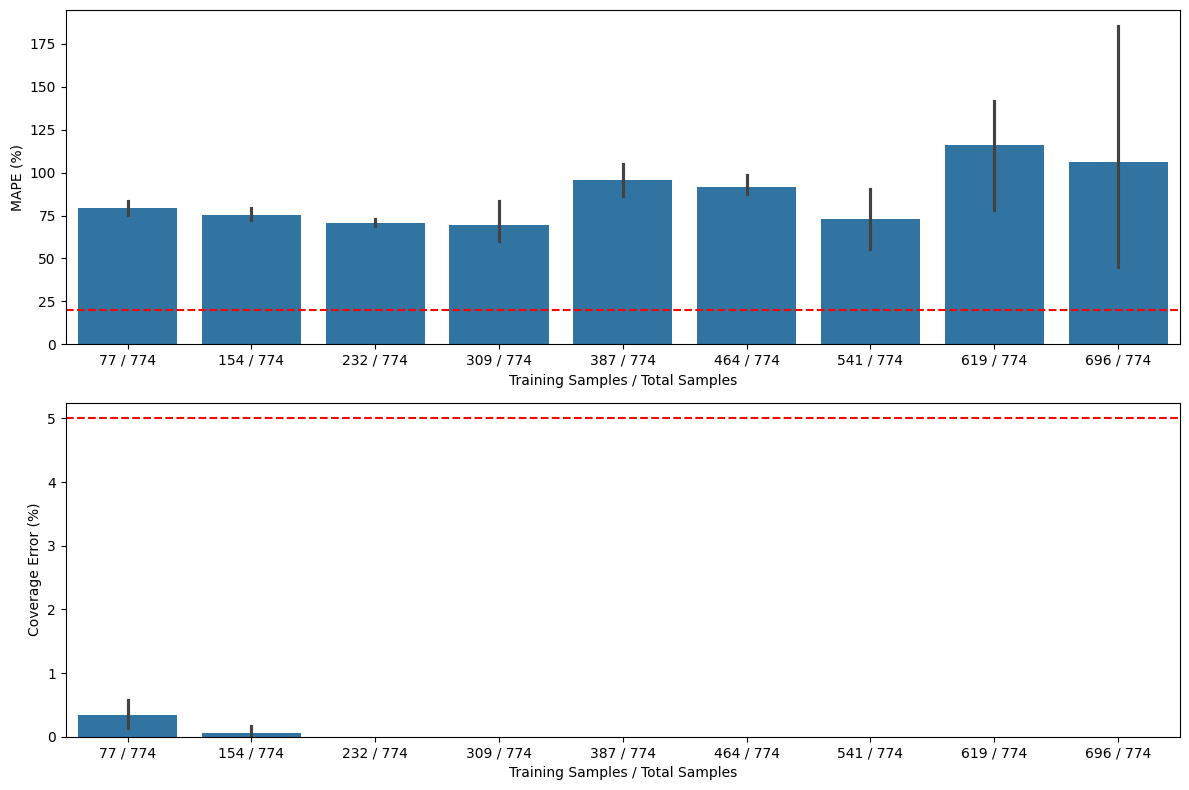


gemmaker download_runs disk_GB
0.1
0.1
0.1
0.2
0.2
0.2
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.4
0.4
0.4
0.5
0.5
0.5
0.6
0.6
0.6
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.8
0.8
0.8
0.9
0.9
0.9


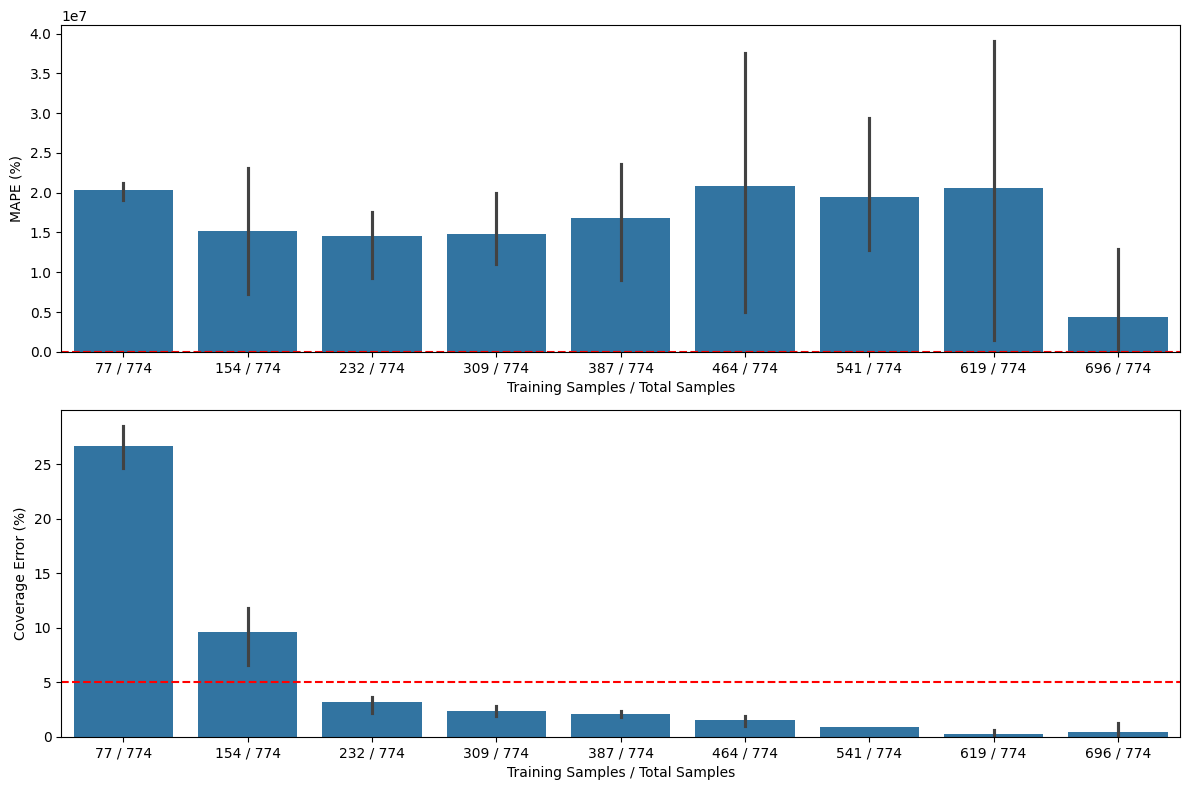


gemmaker fastq_dump runtime_hr
0.1
0.1
0.1
0.2
0.2
0.2
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.4
0.4
0.4
0.5
0.5
0.5
0.6
0.6
0.6
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.8
0.8
0.8
0.9
0.9
0.9


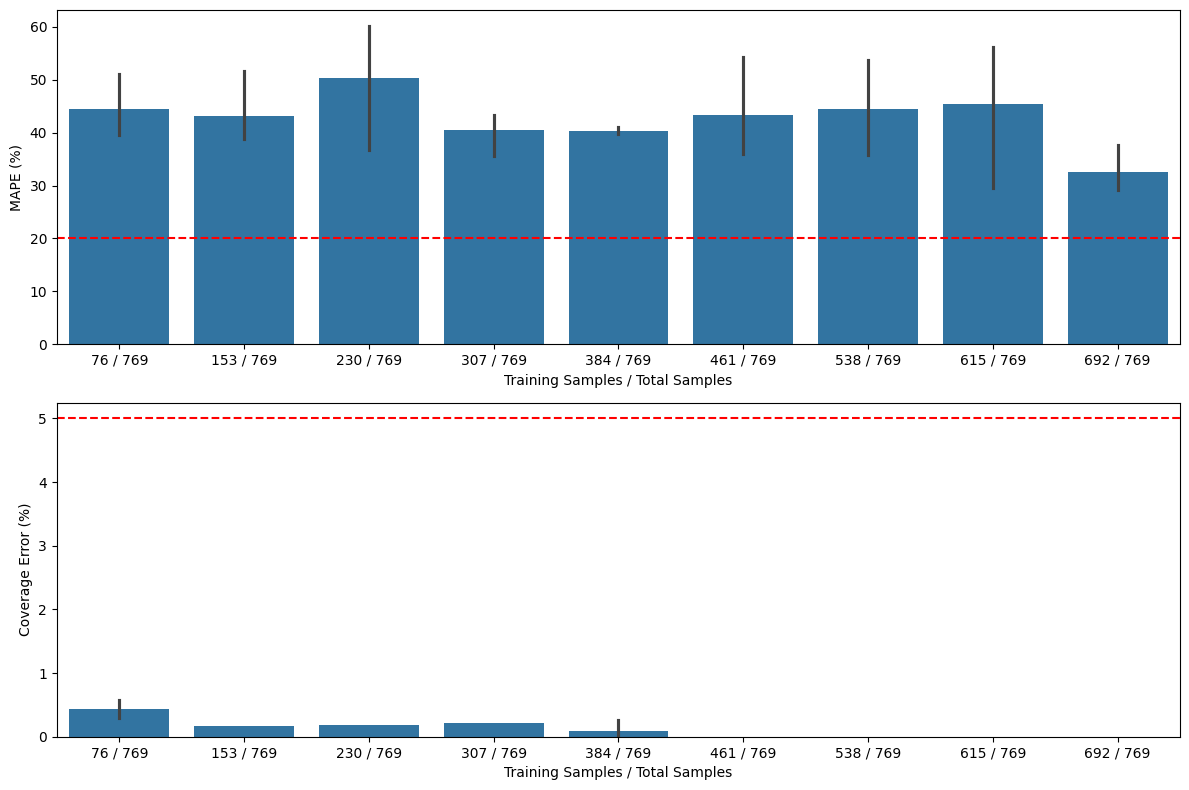


gemmaker fastq_dump disk_GB
0.1
0.1
0.1
0.2
0.2
0.2
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.4
0.4
0.4
0.5
0.5
0.5
0.6
0.6
0.6
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.8
0.8
0.8
0.9
0.9
0.9


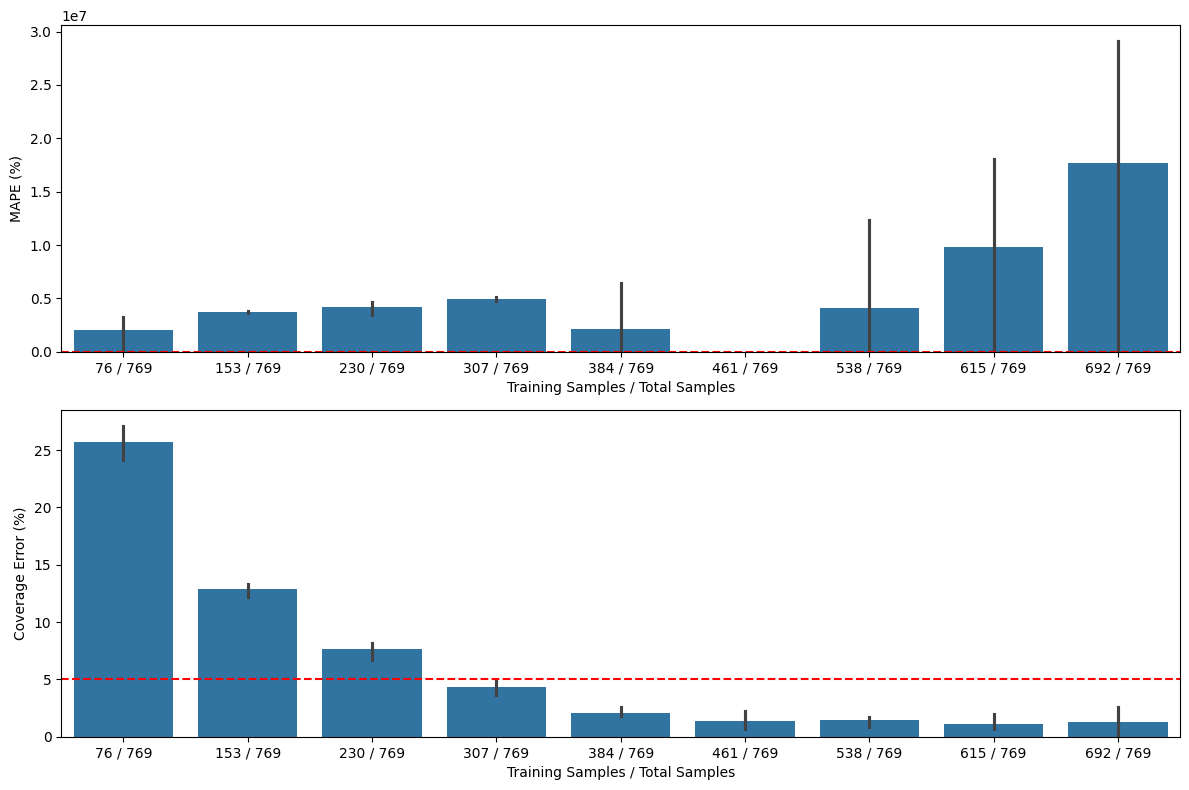


gemmaker fastq_merge runtime_hr
0.1
0.1
0.1
0.2
0.2
0.2
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.4
0.4
0.4
0.5
0.5
0.5
0.6
0.6
0.6
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.8
0.8
0.8
0.9
0.9
0.9


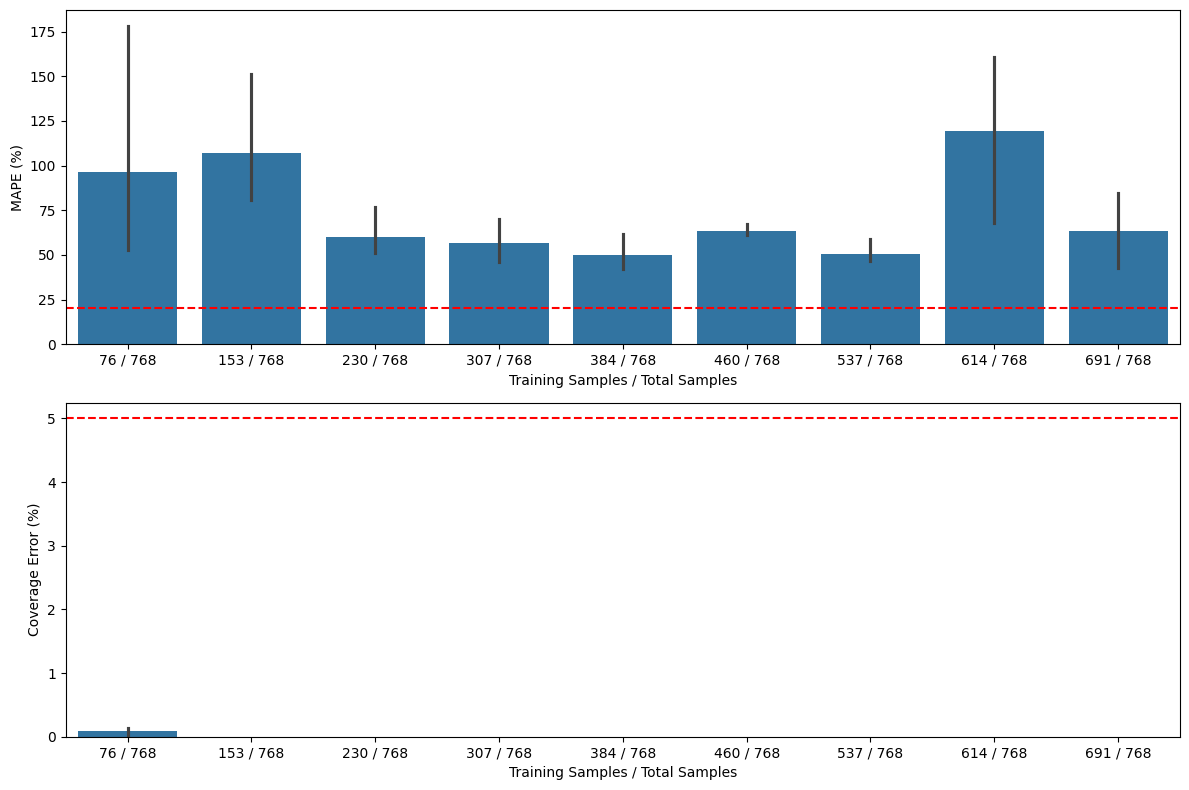


gemmaker fastq_merge disk_GB
0.1
0.1
0.1
0.2
0.2
0.2
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.4
0.4
0.4
0.5
0.5
0.5
0.6
0.6
0.6
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.8
0.8
0.8
0.9
0.9
0.9


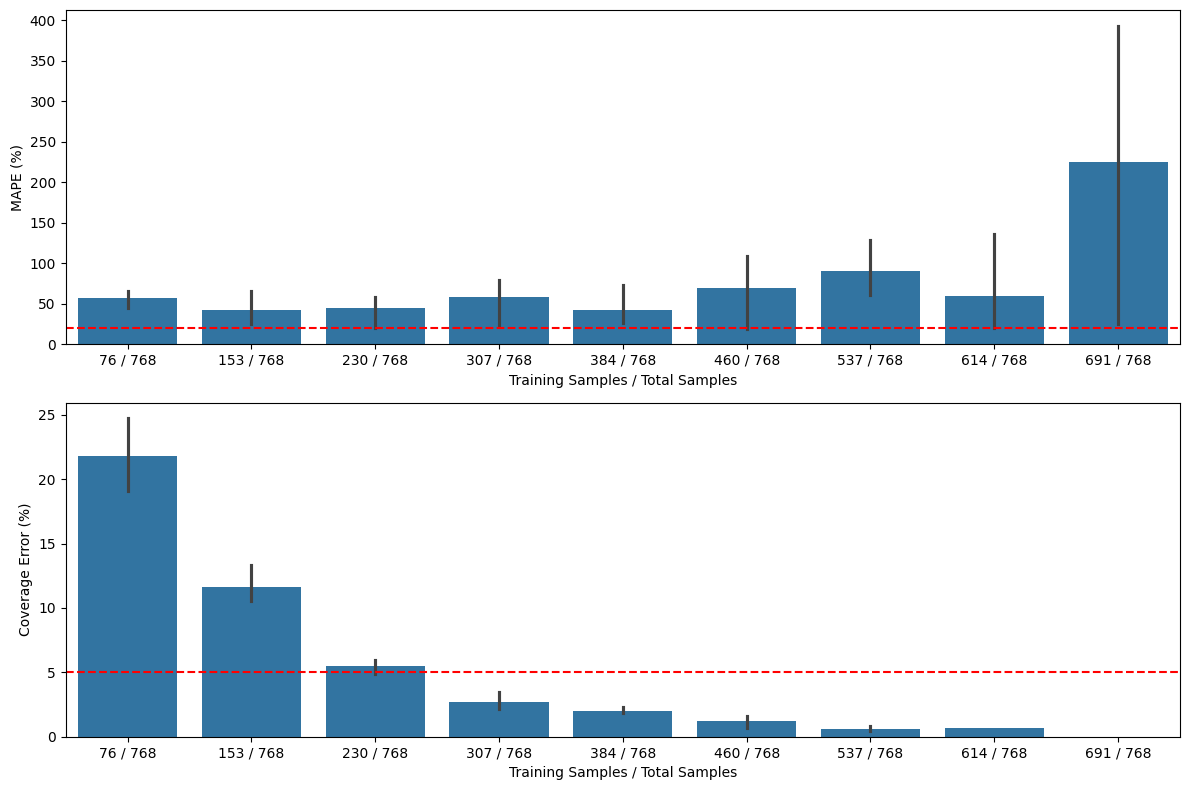


gemmaker fastqc_1 runtime_hr
0.1
0.1
0.1
0.2
0.2
0.2
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.4


In [ ]:
df_results = []

for pipeline, process_name, target in targets_incl:
    print()
    print(pipeline, process_name, target)

    # get performance data for pipeline / process
    df = data_map[pipeline][process_name]
    inputs = config_map[pipeline]['train_inputs'][process_name]

    # remove inputs that have constant value
    inputs = [c for c in inputs if df[c].nunique() > 1]

    # skip if there are no input features
    if len(inputs) == 0:
        print('no input features, skipping')
        continue

    # extract performance dataset
    X, y, columns, _ = create_dataset(df, inputs, target)

    # create model
    model = create_pipeline(create_mlp(X.shape[1], intervals=True))

    # evaluate each train/test split
    train_sizes = np.arange(0.1, 1.0, 0.1)
    scores_map = evaluate_trials(model, X, y, train_sizes=train_sizes, n_trials=3)

    # collect scores
    df_scores = []
    min_train_size_mpe = 1.0
    min_train_size_cov = 1.0

    for train_size in train_sizes:
        # get scores for this split
        scores = scores_map[train_size]

        # update minimum samples
        if np.mean(scores['mpe']) <= 20:
            min_train_size_mpe = min(train_size, min_train_size_mpe)

        if np.mean(scores['cov']) <= 5:
            min_train_size_cov = min(train_size, min_train_size_cov)

        # save metrics
        scores = pd.DataFrame({
            'name': '%d / %d' % (X.shape[0] * train_size, X.shape[0]),
            'mpe': scores['mpe'],
            'cov': scores['cov']
        })
        df_scores.append(scores)

    df_scores = pd.concat(df_scores)

    # save minimum samples
    df_results.append({
        'name': '%s / %s / %s' % (pipeline, process_name, target),
        'model': 'mlp',
        'min_samples_mpe': min_train_size_mpe * X.shape[0],
        'min_samples_cov': min_train_size_cov * X.shape[0],
        'n_samples': X.shape[0],
    })

    # plot results
    plt.subplots(2, 1, figsize=(12, 8))

    plt.subplot(2, 1, 1)
    sns.barplot(x='name', y='mpe', data=df_scores, color='tab:blue')
    xmin, xmax = plt.xlim()
    plt.plot([xmin, xmax], [20, 20], 'r--')
    plt.xlabel('Training Samples / Total Samples')
    plt.ylabel('MAPE (%)')
    plt.xlim(xmin, xmax)

    plt.subplot(2, 1, 2)
    sns.barplot(x='name', y='cov', data=df_scores, color='tab:blue')
    xmin, xmax = plt.xlim()
    plt.plot([xmin, xmax], [5, 5], 'r--')
    plt.xlabel('Training Samples / Total Samples')
    plt.ylabel('Coverage Error (%)')
    plt.xlim(xmin, xmax)

    plt.tight_layout()
    plt.savefig('%s-%s-%s-trainsize.pdf' % (pipeline, process_name, target))
    plt.savefig('%s-%s-%s-trainsize.png' % (pipeline, process_name, target))
    plt.show()

# save results to dataframe
df_results = pd.DataFrame(df_results)
df_results.set_index('name', inplace=True)
df_results.to_csv('01-train-size.csv', sep='\t')

### Visualize Evaluation Summary

In [ ]:
# load resource prediction results
df = pd.read_csv('01-resource-prediction.csv', sep='\t')

for idx, row in df.iterrows():
    df.loc[idx, 'name'] = '%s / %s / %s' % (row.pipeline, row.process, row.target)

fig, axes = plt.subplots(1, 2, figsize=(12, 12), sharey=True)

# plot mean relative error for each prediction target
ax = axes[0]
data = df.copy()
data['20'] = 20
sns.pointplot(y='name', x='20', data=data, color='tab:red', markers='', linestyles='--', ax=ax)

data['mlp'] = data['mlp | mpe']
data['rf'] = data['rf | mpe']
data = data.melt(id_vars=['name'], value_vars=['mlp', 'rf'], var_name='model', value_name='mpe')
sns.barplot(y='name', x='mpe', hue='model', data=data, ax=ax)
ax.set_xlim(0, 100)
ax.set_xlabel('MAPE (%)')
ax.set_ylabel('Name')

# plot coverage error for aech prediction target
ax = axes[1]
data = df.copy()
data['5'] = 5
sns.pointplot(y='name', x='5', data=data, color='tab:red', markers='', linestyles='--', ax=ax)

data['mlp'] = data['mlp | cov']
data['rf'] = data['rf | cov']
data = data.melt(id_vars=['name'], value_vars=['mlp', 'rf'], var_name='model', value_name='cov')
sns.barplot(y='name', x='cov', hue='model', data=data, ax=ax)
ax.set_xlim(0, 100)
ax.set_xlabel('Coverage Error (%)')
ax.set_ylabel('Name')

plt.tight_layout()
plt.savefig('01-resource-prediction.pdf')
plt.savefig('01-resource-prediction.png')
plt.show()

In [ ]:
# load training size results
df = pd.read_csv('01-train-size.csv', sep='\t')

fig, axes = plt.subplots(1, 2, figsize=(12, 12), sharey=True)

# plot minimum samples required (mpe) for each target
ax = axes[0]
sns.pointplot(y='name', x='n_samples', data=df, color='tab:red', markers='x', linestyles='', ax=ax)
sns.barplot(y='name', x='min_samples_mpe', hue='model', data=df, zorder=-1, ax=ax)
ax.set_xlabel('Minimum Samples (MAPE)')
ax.set_ylabel('Name')

# plot minimum samples required (cov) for each target
ax = axes[1]
sns.pointplot(y='name', x='n_samples', data=df, color='tab:red', markers='x', linestyles='', ax=ax)
sns.barplot(y='name', x='min_samples_cov', hue='model', data=df, zorder=-1, ax=ax)
ax.set_xlabel('Minimum Samples (Coverage Error)')
ax.set_ylabel('Name')

plt.tight_layout()
plt.savefig('01-train-size.pdf')
plt.savefig('01-train-size.png')
plt.show()

### Evaluate MLP (with Training History)

In [ ]:
for pipeline, process_name, target in targets_incl:
    print()
    print(pipeline, process_name, target)

    # get performance data for pipeline / process
    df = data_map[pipeline][process_name]
    inputs = config_map[pipeline]['train_inputs'][process_name]

    # remove inputs that have constant value
    inputs = [c for c in inputs if df[c].nunique() > 1]

    # skip if there are no input features
    if len(inputs) == 0:
        print('no input features, skipping')
        continue

    # extract performance dataset
    X, y, columns, _ = create_dataset(df, inputs, target)

    # create train/test split
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

    # normalize data
    scaler = sklearn.preprocessing.MaxAbsScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # train model
    model = create_mlp(X.shape[1], intervals=True)
    history = model.fit(X_train, y_train)

    # evaluate model
    y_bar, y_std = check_std(model.predict(X_test))
    y_lower, y_upper = predict_intervals(y_bar, y_std)

    mae = sklearn.metrics.mean_absolute_error(y_test, y_bar)
    mpe = mean_absolute_percentage_error(y_test, y_bar)
    cov = coverage_error(y_test, y_lower, y_upper)

    print()
    print('mae: %0.3f %s' % (mae, UNITS[target]))
    print('mpe: %0.3f %%' % (mpe))
    print('cov: %0.3f %%' % (cov))

    # generate predictions for entire dataset
    model = create_pipeline(create_mlp(X.shape[1], intervals=True))
    _, y_bar, y_std = evaluate_cv(model, X, y)
    y_lower, y_upper = predict_intervals(y_bar, y_std)

    target_pred = '%s | mlp' % (target)
    df[target_pred] = y_bar

    plt.subplots(1, 2, figsize=(8, 4))

    # plot training history
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training History')
    plt.ylabel('MAE (%s)' % (UNITS[target]))
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')

    # plot expected vs predicted target values
    cov = coverage_error(y, y_lower, y_upper)
    yerr = [
        y_bar - y_lower,
        y_upper - y_bar
    ]

    plt.subplot(1, 2, 2)
    plt.errorbar(
        x=target,
        y=target_pred,
        yerr=yerr,
        data=df,
        ecolor='tab:blue', c='tab:blue', ls='', marker='o', mec='w')
    vmax = max(df[target].max(), df[target_pred].max())
    plt.plot([0, vmax], [0, vmax], 'k--', zorder=0)
    plt.title('cov = %0.3f %%' % (cov))
    plt.xlabel(target)
    plt.ylabel(target_pred)

    plt.tight_layout()
    plt.show()

### Create Specialized Visualizations

In [ ]:
plot_configs = {
    'download_runs': {
        'x': 'n_spots',
        'hue': 'n_remote_run_ids',
        'row': None
    },
    'fastq_dump': {
        'x': 'sra_bytes',
        'hue': None,
        'row': None
    },
    'hemelb': {
        'x': 'n_sites',
        'hue': 'np',
        'row': 'hardware_type'
    },
    'similarity_chunk': {
        'x': 'n_rows',
        'hue': 'chunks',
        'row': 'hardware_type'
    },
    'similarity_merge': {
        'x': 'n_rows',
        'hue': 'n_cols',
        'row': None
    },
    'similarity_mpi': {
        'x': 'n_rows',
        'hue': 'np',
        'row': 'hardware_type'
    },
    'corrpower': {
        'x': 'n_rows',
        'hue': 'n_cols',
        'row': None
    }
}

for pipeline, process_name, target in targets_incl:
    print()
    print(pipeline, process_name, target)

    # get performance data for pipeline / process
    df = data_map[pipeline][process_name]
    inputs = config_map[pipeline]['train_inputs'][process_name]

    # remove inputs that have constant value
    inputs = [c for c in inputs if df[c].nunique() > 1]

    # skip if there are no input features
    if len(inputs) == 0:
        print('no input features, skipping')
        continue

    # skip if there is no plots config
    if process_name not in plot_configs:
        print('no plots config, skipping')
        continue

    # plot target data by itself
    config = plot_configs[process_name]
    x   = config['x']
    hue = config['hue']
    row = config['row']

    if row != None:
        df.sort_values(by=row, inplace=True, kind='mergesort')

    if df[x].dtype.kind in 'biuOSUV':
        plot_func = sns.stripplot
    else:
        plot_func = sns.scatterplot

    g = sns.FacetGrid(
        df,
        row=row,
        sharex=True,
        sharey='row',
        height=3,
        aspect=2,
        margin_titles=True
    )
    g.map_dataframe(
        plot_func,
        x=x,
        y=target,
        hue=hue,
        palette='viridis',
        dodge=True
    )
    g.set_axis_labels(x, target)
    g.add_legend(title=hue)
    plt.savefig('%s-%s-%s.pdf' % (pipeline, process_name, target))
    plt.savefig('%s-%s-%s.png' % (pipeline, process_name, target))
    plt.show()

    continue

    # extract performance dataset
    X, y, columns, _ = create_dataset(df, inputs, target)

    # train model
    model = create_pipeline(create_mlp(X.shape[1]))
    model.fit(X, y)

    # create dataframe of model predictions
    df_true = df
    df_pred = df.copy()
    df_pred[target] = model.predict(X)

    # create merged dataframe
    df_true['data_type'] = 'true'
    df_pred['data_type'] = 'pred'
    data = pd.concat([df_true, df_pred])

    # create facet grid of data and model distributions
    config = plot_configs[process_name]
    x   = config['x']
    hue = config['hue']
    row = config['row']

    if row != None:
        data.sort_values(by=row, inplace=True, kind='mergesort')

    g = sns.FacetGrid(
        data,
        row=row,
        col='data_type',
        sharex=True,
        sharey='row',
        height=3,
        aspect=2,
        margin_titles=True
    )
    g.map_dataframe(
        sns.stripplot,
        x=x,
        y=target,
        hue=hue,
        palette='viridis'
    )
    g.set_axis_labels(x, target)
    g.add_legend(title=hue)
    plt.show()